In [1]:
# import sys
# print(sys.executable)
# print(sys.version)

import os
os.environ['PROJ_LIB'] = '/home/jlee/.conda/envs/mmc_sgp/share/proj'

import wrf
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import xarray as xr
from numba import njit

# wrf_runs_dir = '/projects/mmc/jlee/sgp/wrf-mmc/wrf-runs/'
wrf_runs_dir = '/scratch/jlee/mmc/'
nb_dir = !pwd
data_dir_df = pd.read_csv(nb_dir[0]+'/data-dir-j3leswrf.csv', index_col=0)

runs_list = list(data_dir_df.index)[:-1]

XLAT


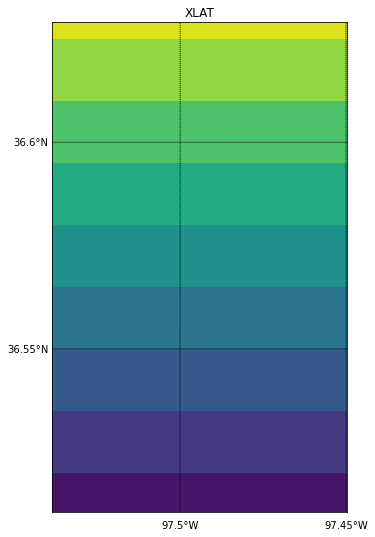

XLONG


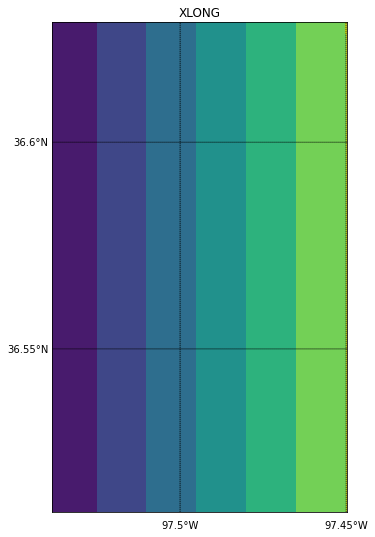

LU_INDEX


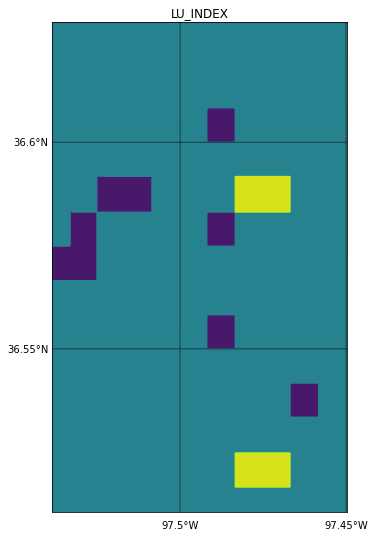

VAR_SSO


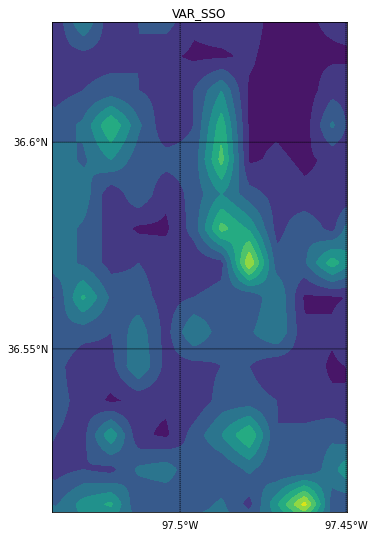

LAP_HGT


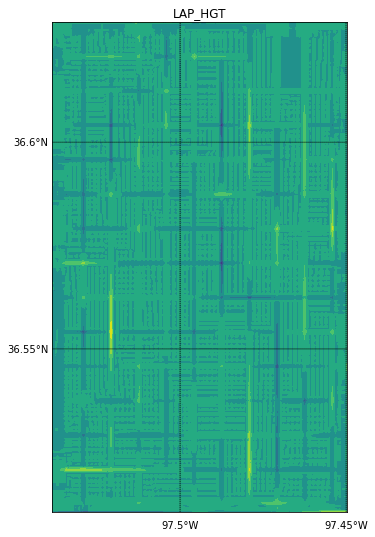

MU_1


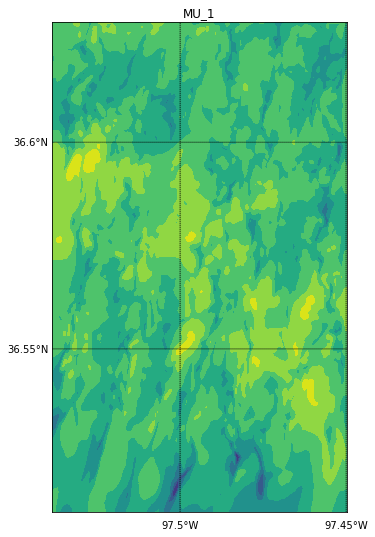

MU_2


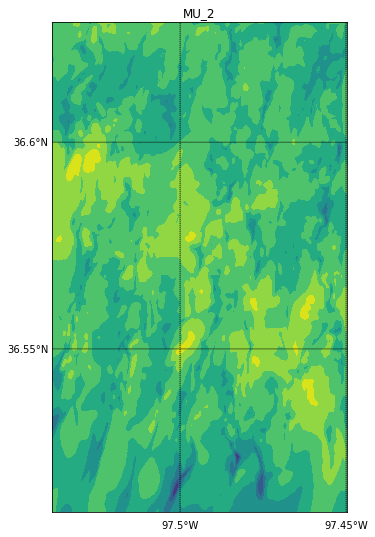

MUB


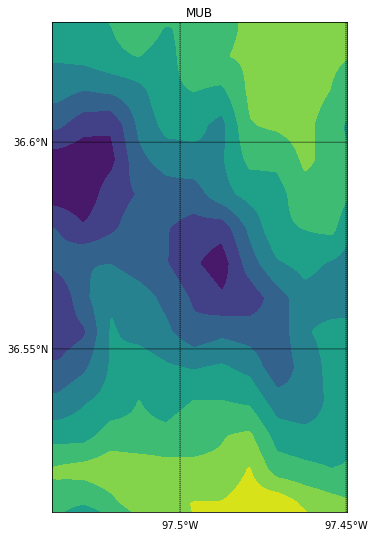

NEST_POS


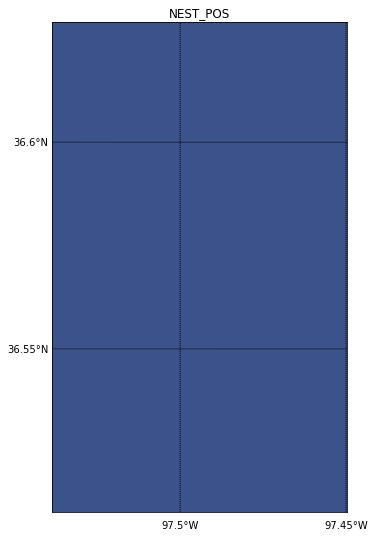

NEST_MASK


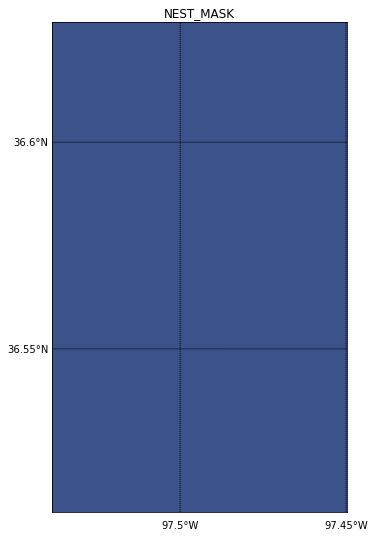

HT_COARSE


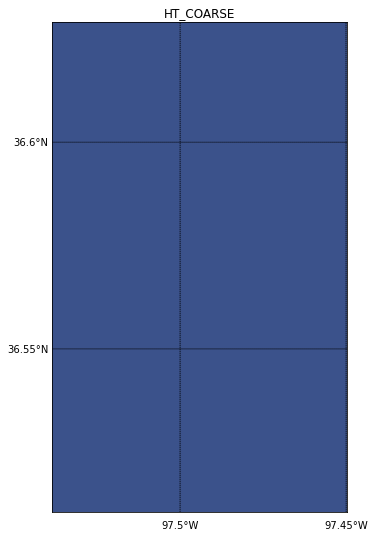

Q2


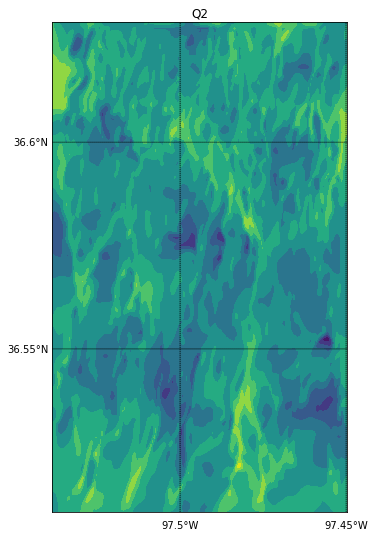

T2


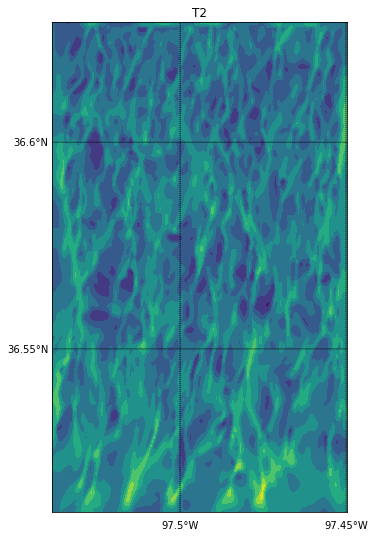

TH2


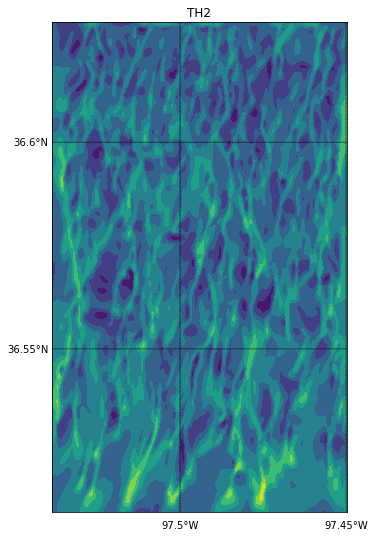

PSFC


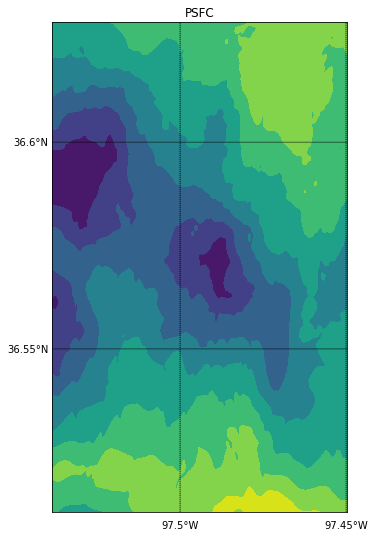

U10


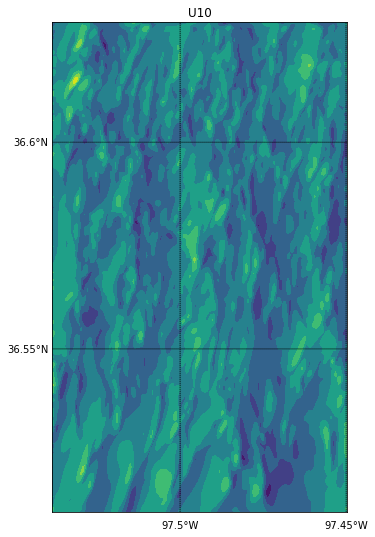

V10


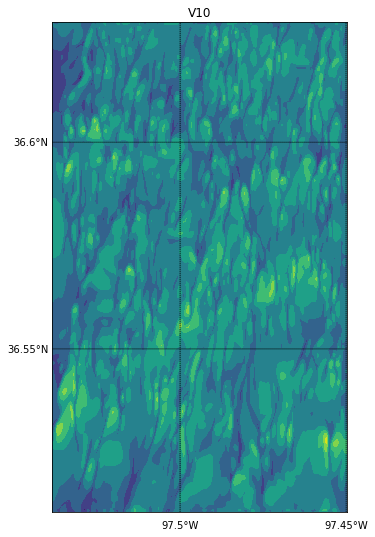

URATX


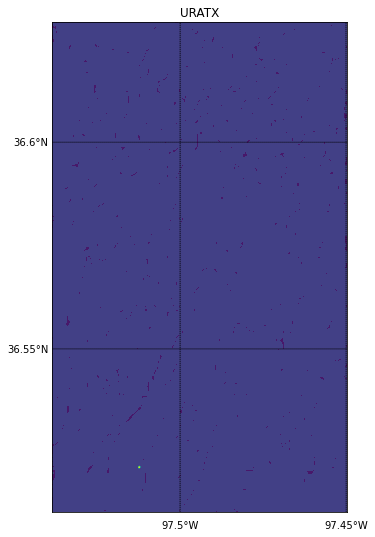

VRATX


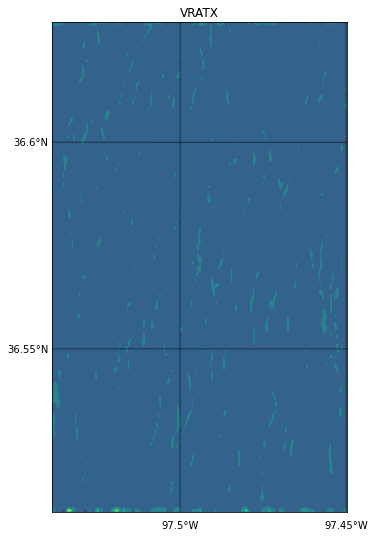

TRATX


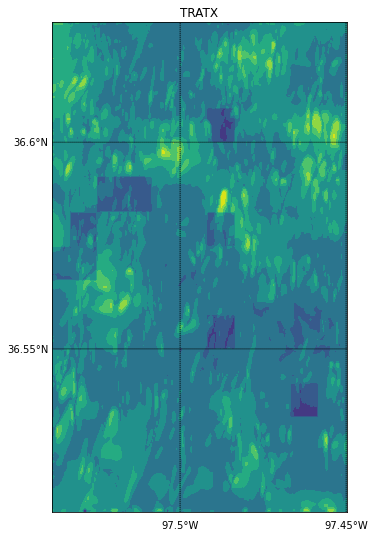

AREA2D


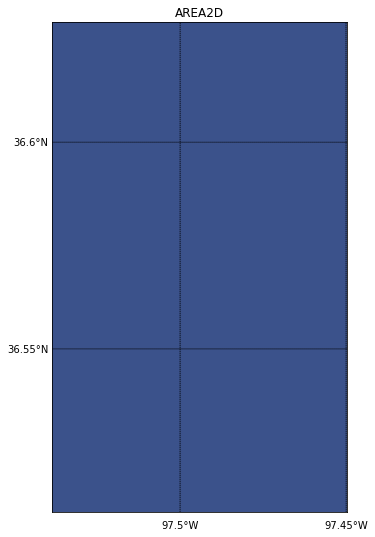

DX2D


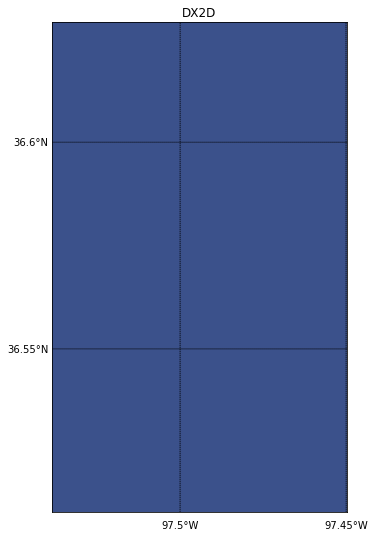

QNWFA2D


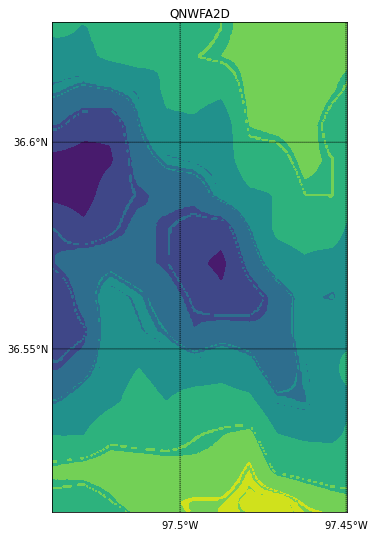

QNIFA2D


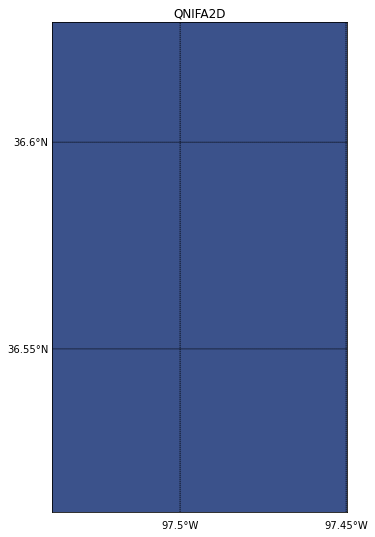

TOPOSLPX


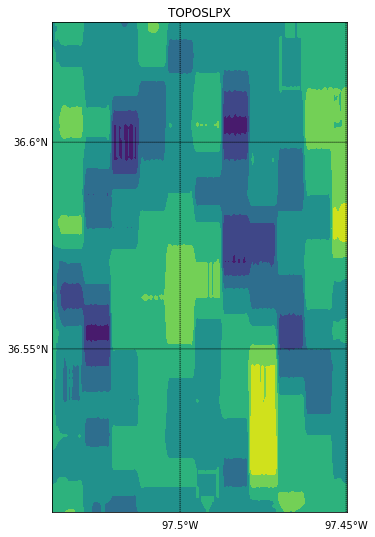

TOPOSLPY


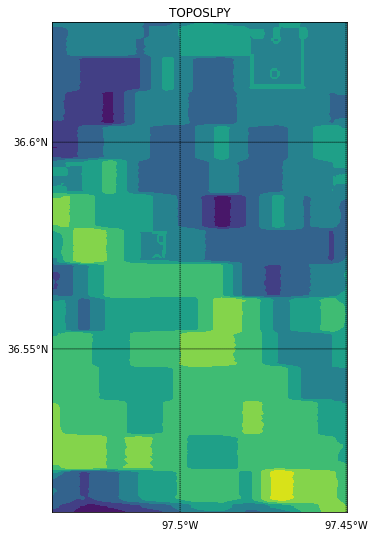

SLOPE


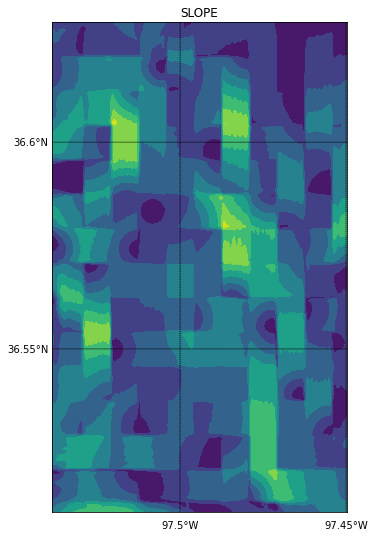

SLP_AZI


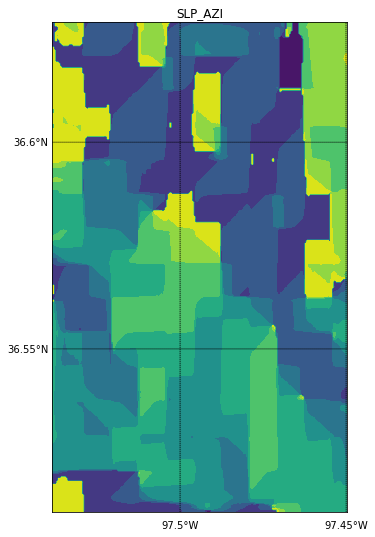

SHDMAX


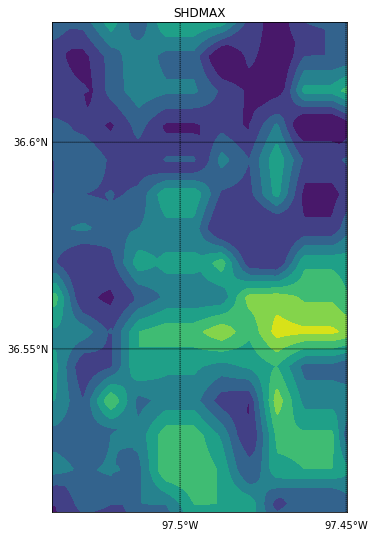

SHDMIN


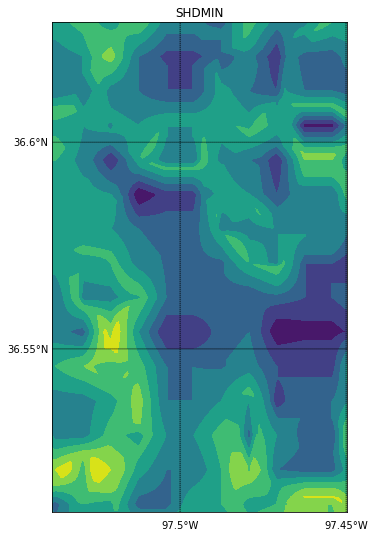

SNOALB


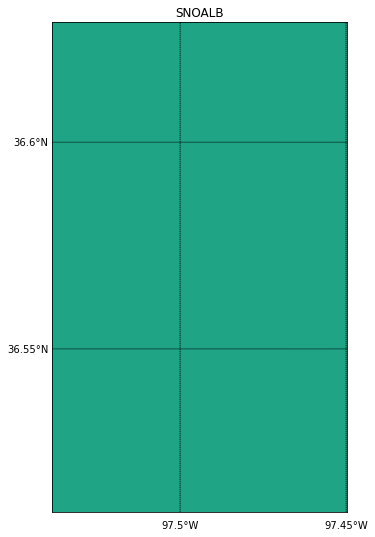

SEAICE


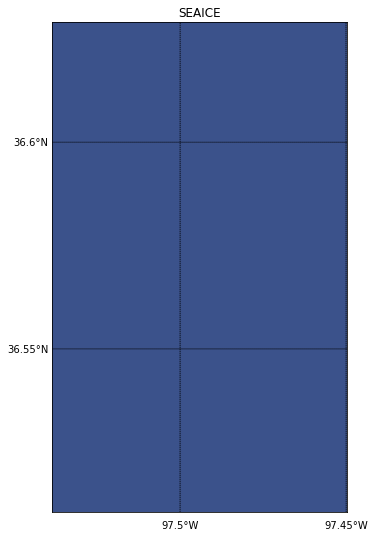

XICEM


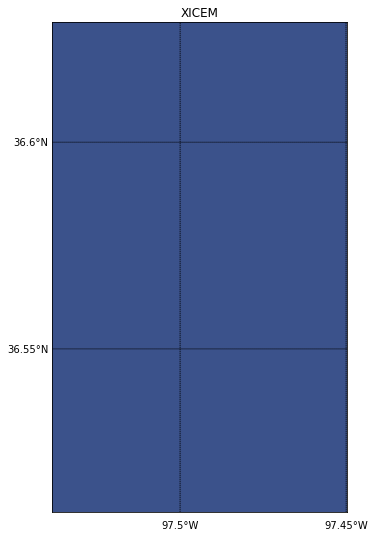

SMSTAV


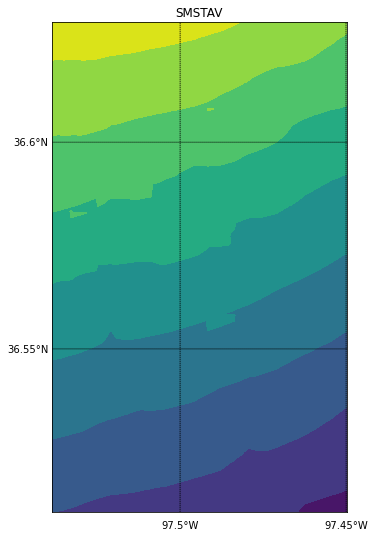

SMSTOT


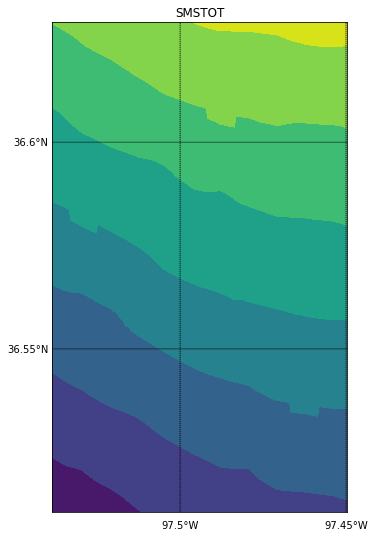

SFCHEADRT


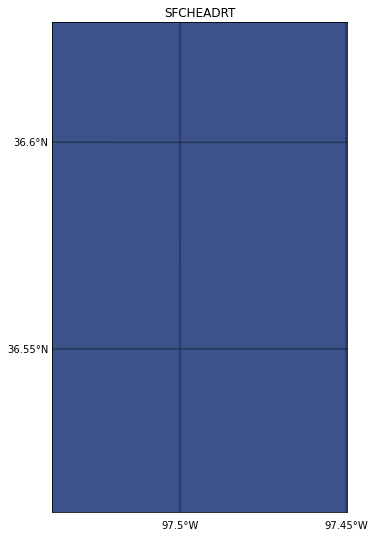

INFXSRT


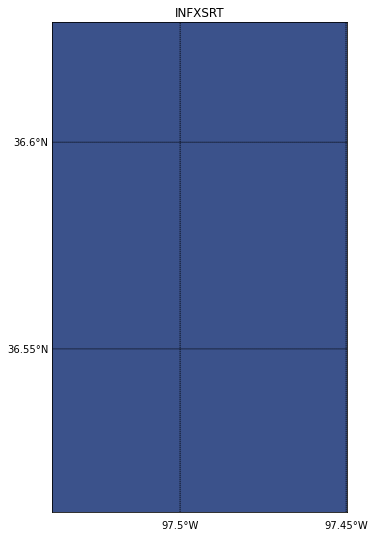

SFROFF


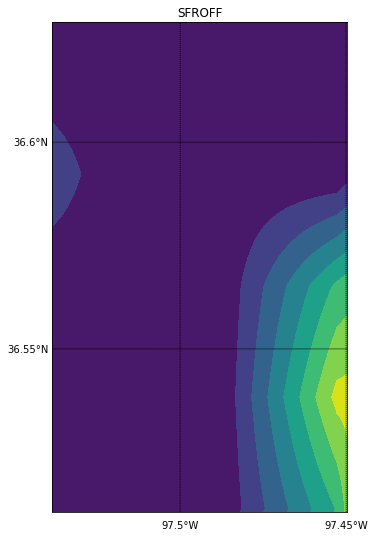

UDROFF


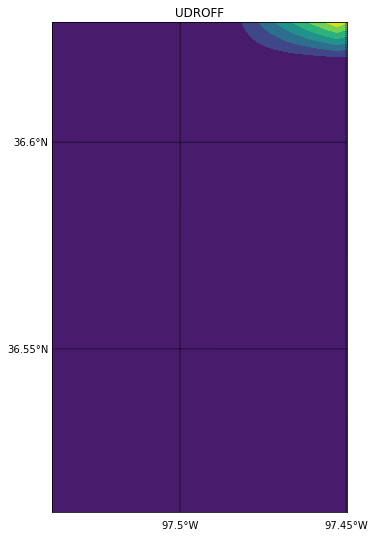

IVGTYP


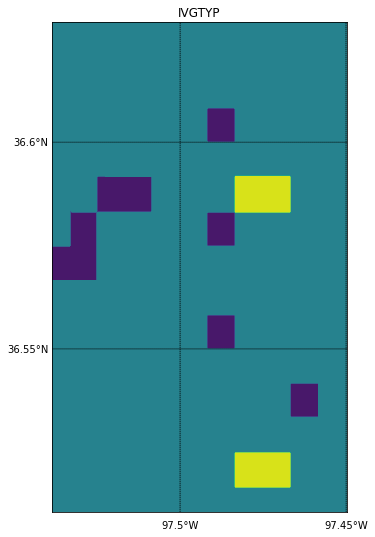

ISLTYP


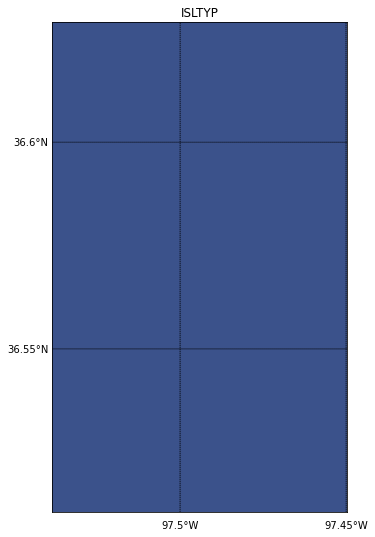

VEGFRA


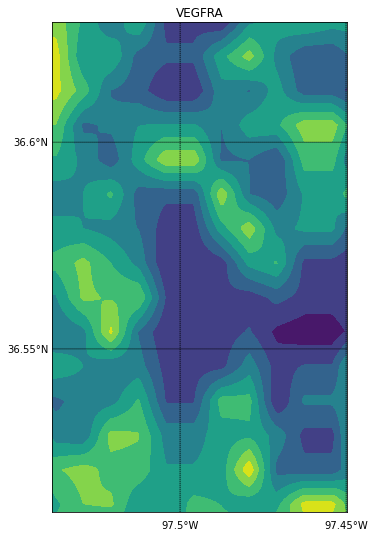

SFCEVP


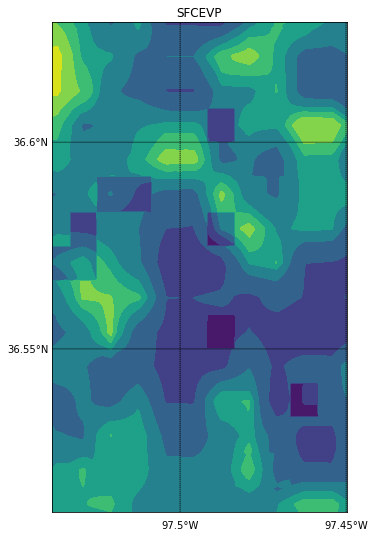

GRDFLX


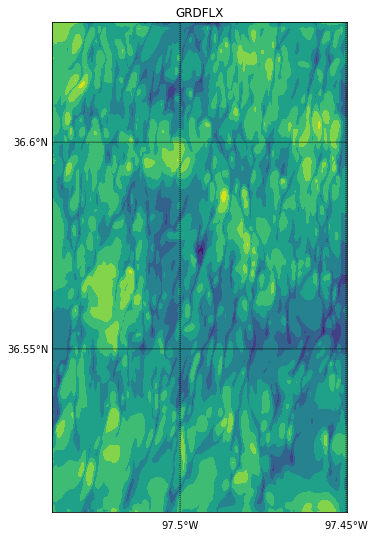

ACGRDFLX


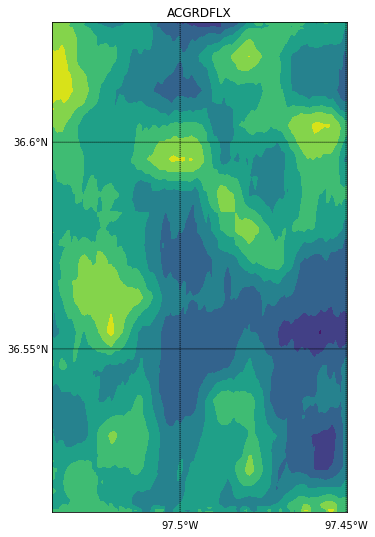

SFCEXC


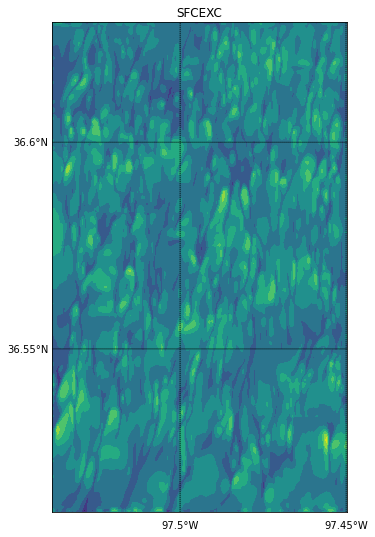

ACSNOW


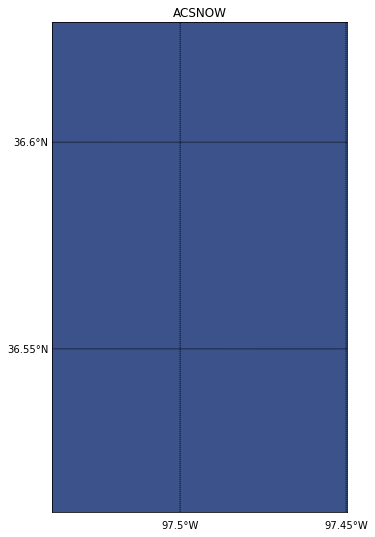

ACSNOM


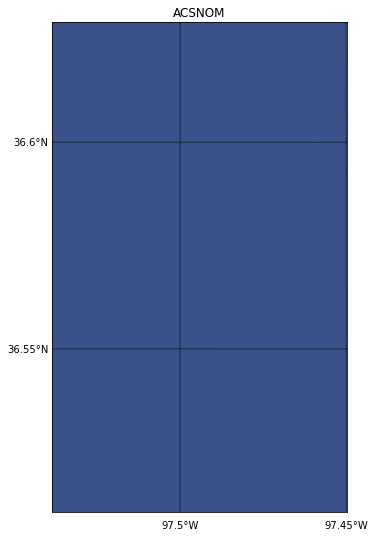

SNOW


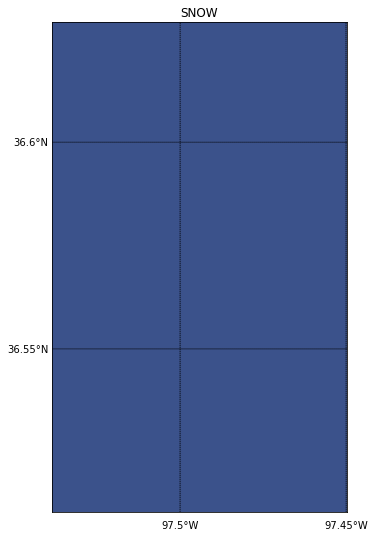

SNOWH


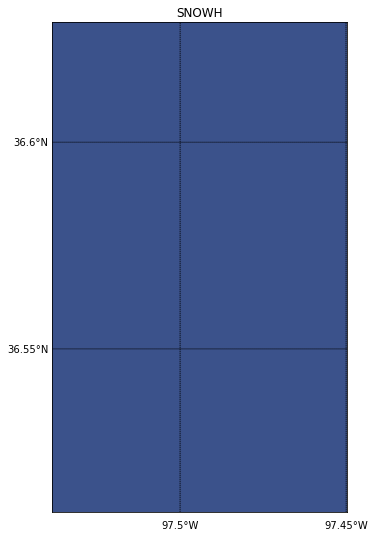

CANWAT


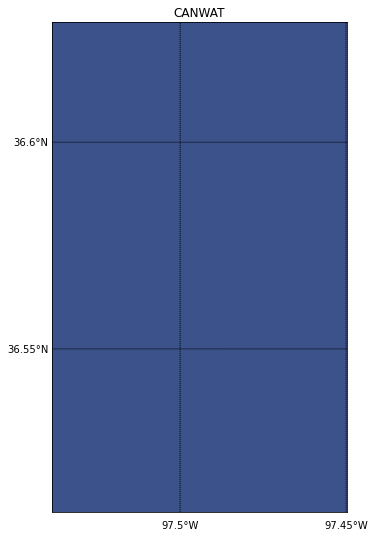

SSTSK


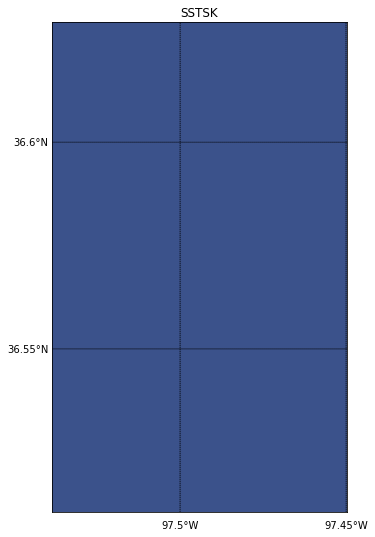

LAKE_DEPTH


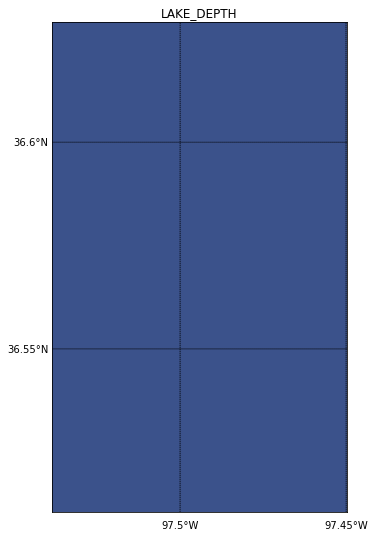

WATER_DEPTH


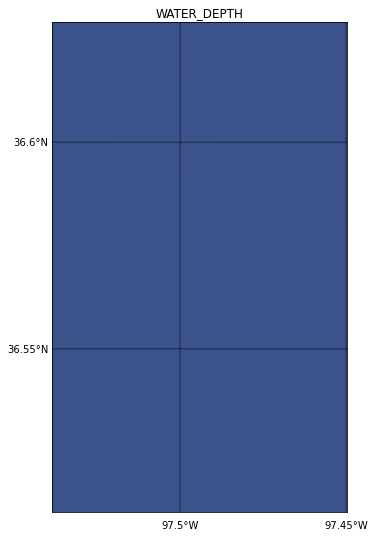

DTW


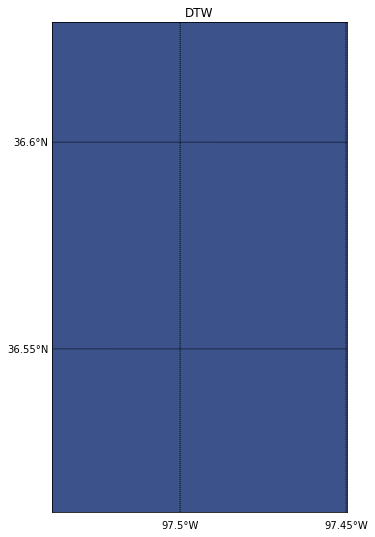

UOCE


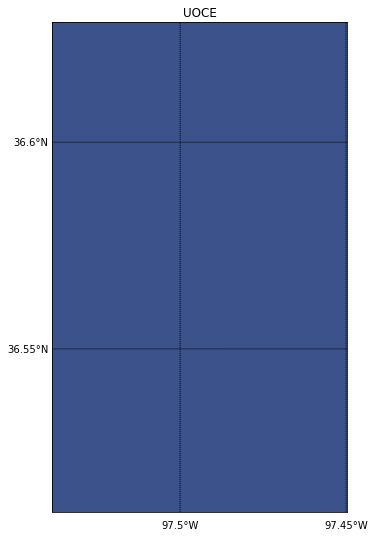

VOCE


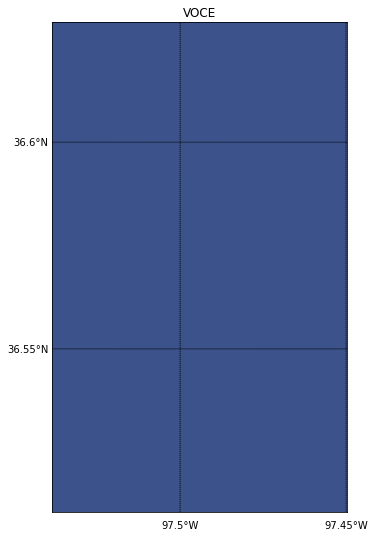

TR_URB


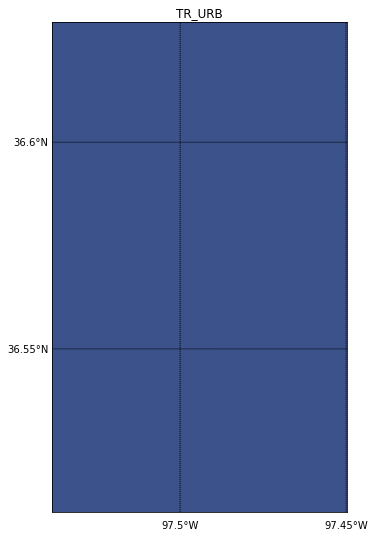

TB_URB


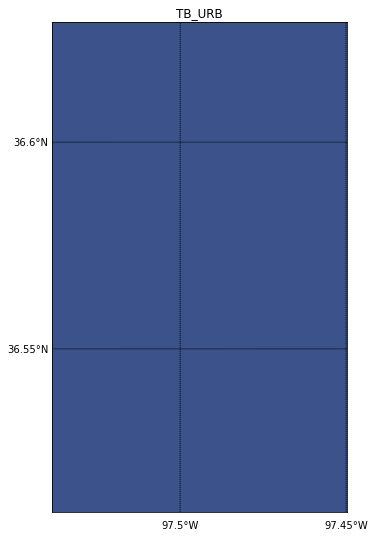

TG_URB


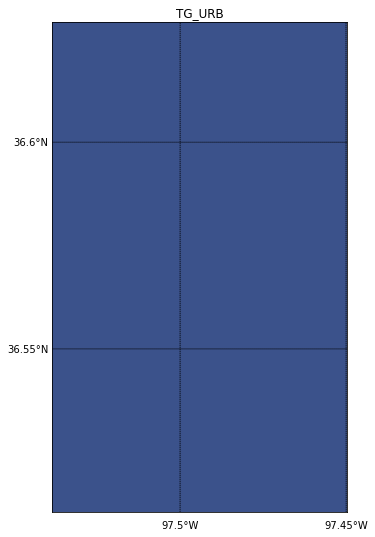

TC_URB


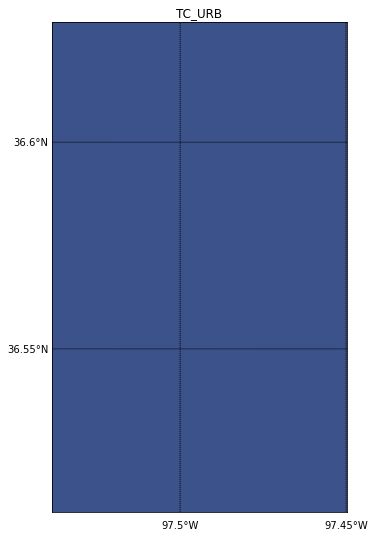

QC_URB


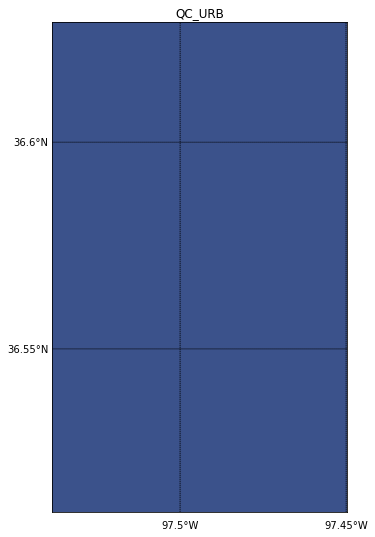

UC_URB


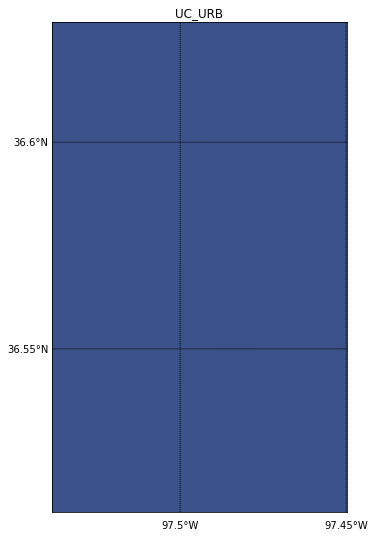

XXXR_URB


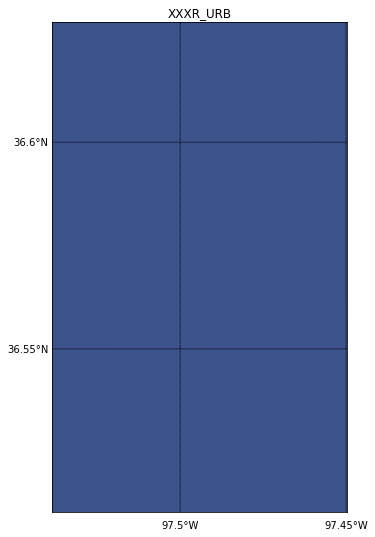

XXXB_URB


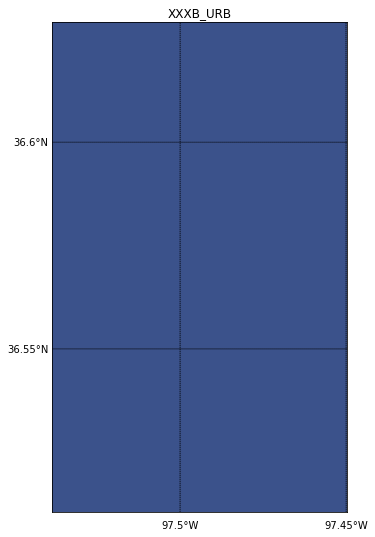

XXXG_URB


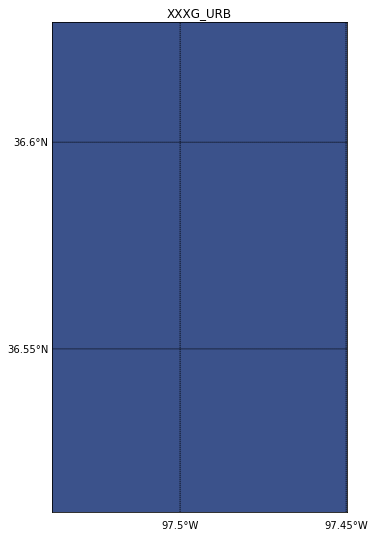

XXXC_URB


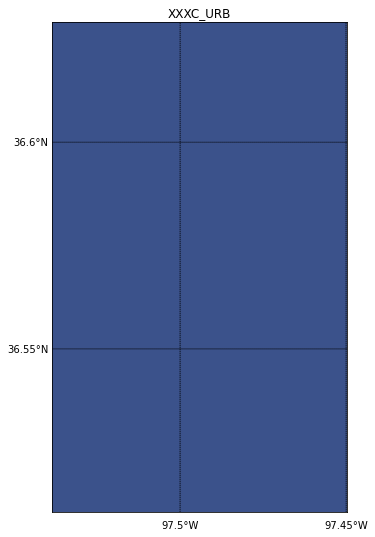

SH_URB


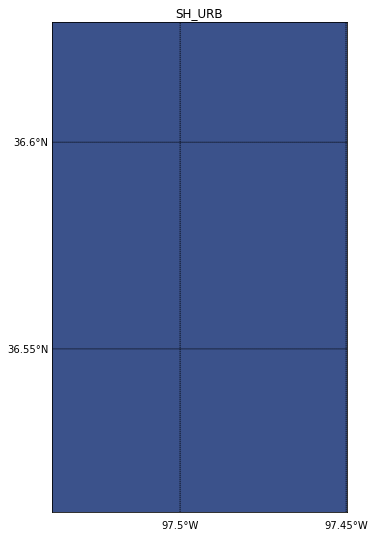

LH_URB


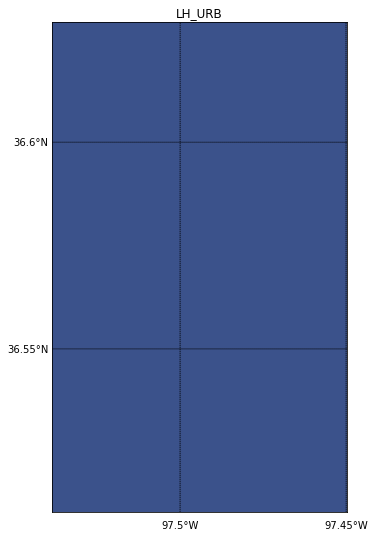

G_URB


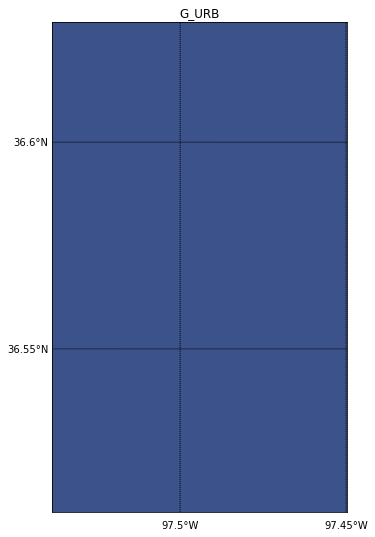

RN_URB


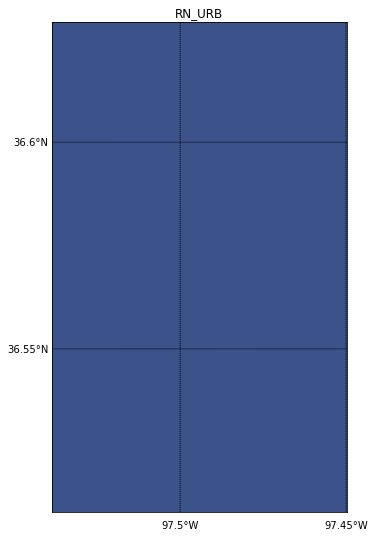

TS_URB


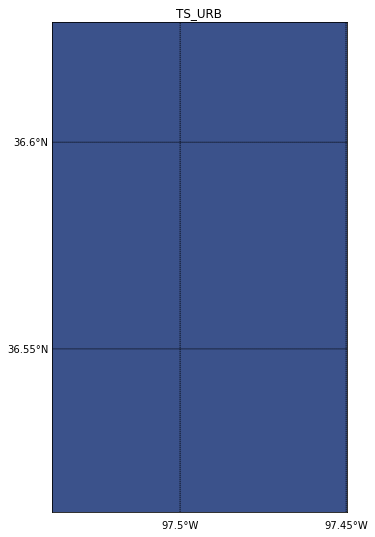

FRC_URB2D


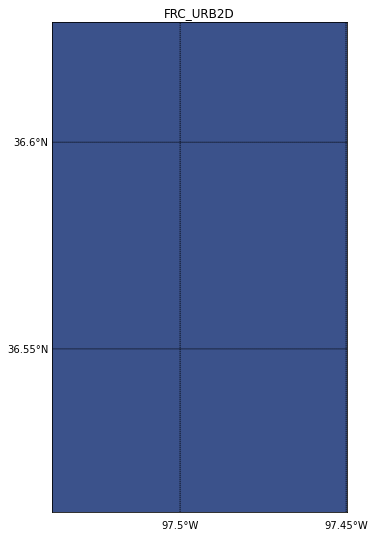

UTYPE_URB


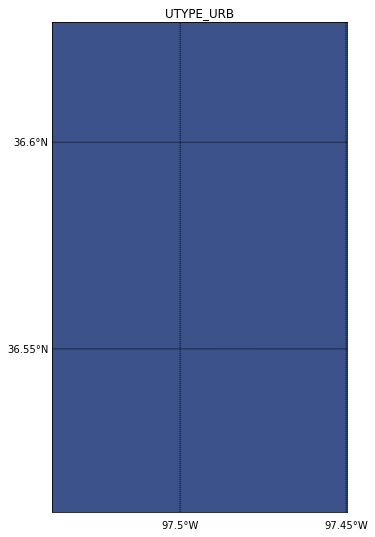

CMR_SFCDIF


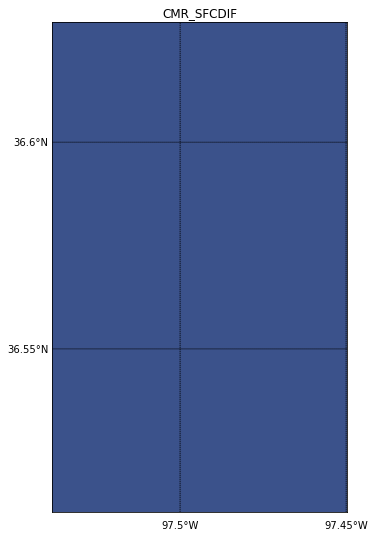

CHR_SFCDIF


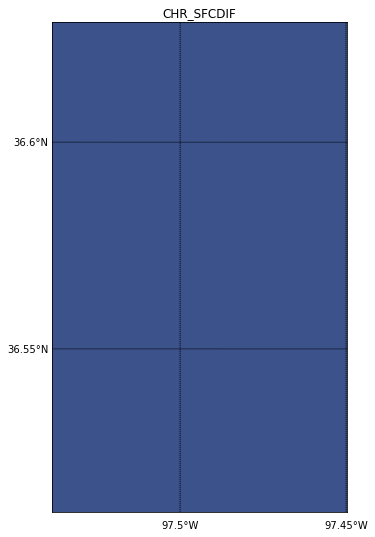

CMC_SFCDIF


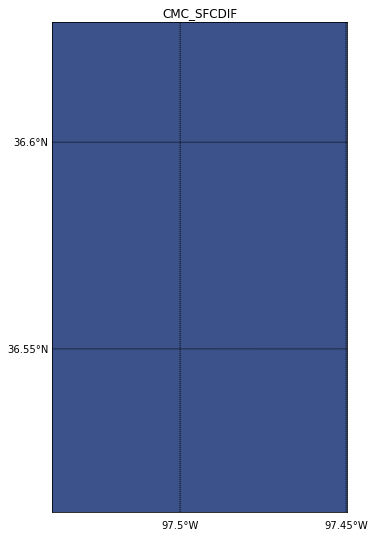

CHC_SFCDIF


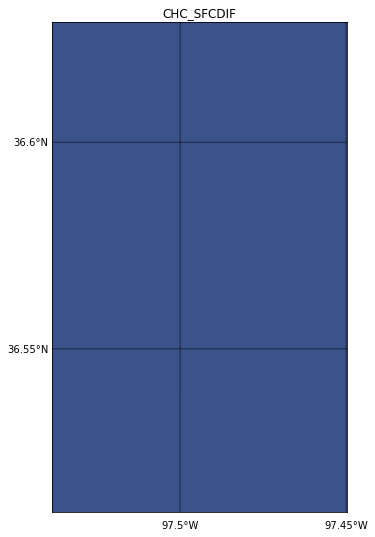

COSZEN


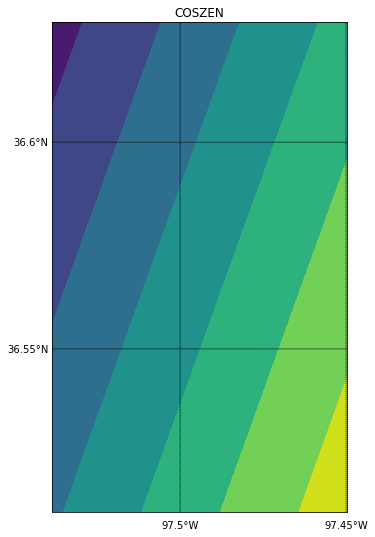

HRANG


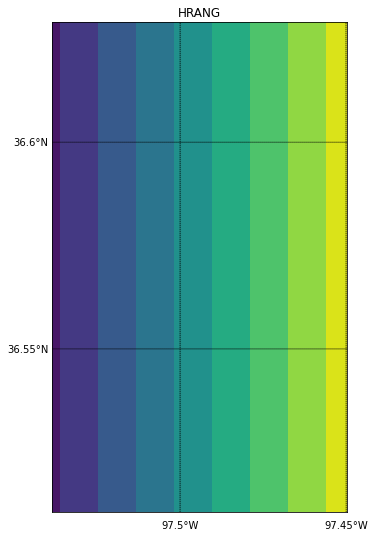

SWVISDIR


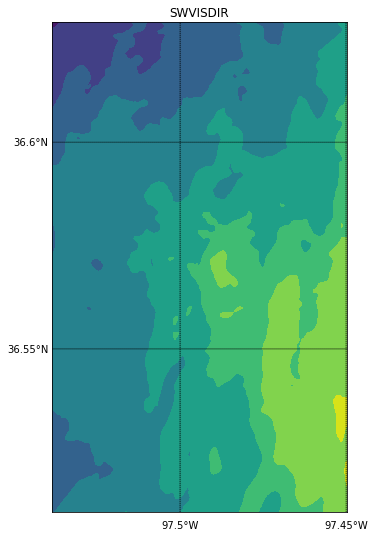

SWVISDIF


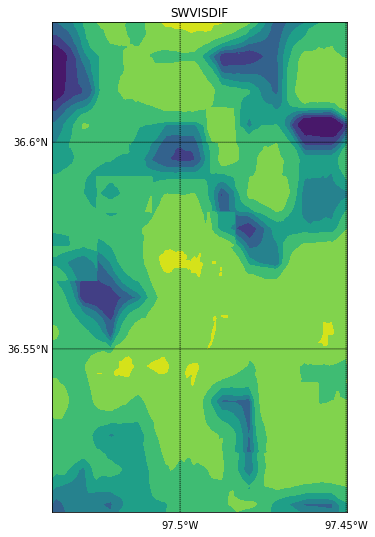

SWNIRDIR


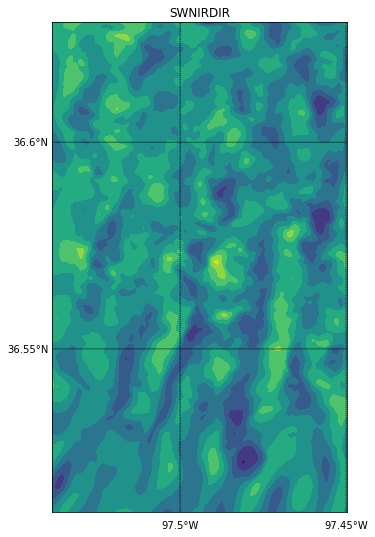

SWNIRDIF


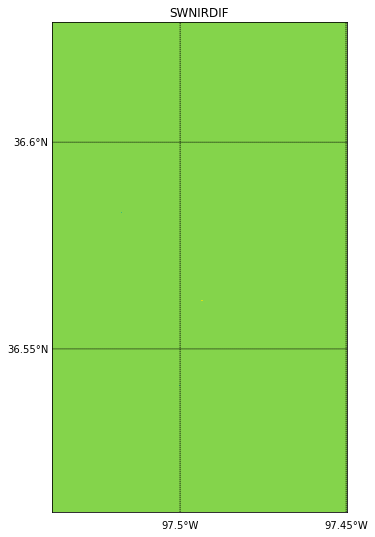

ALSWVISDIR


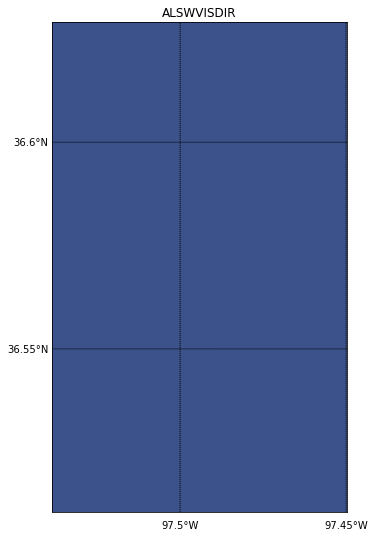

ALSWVISDIF


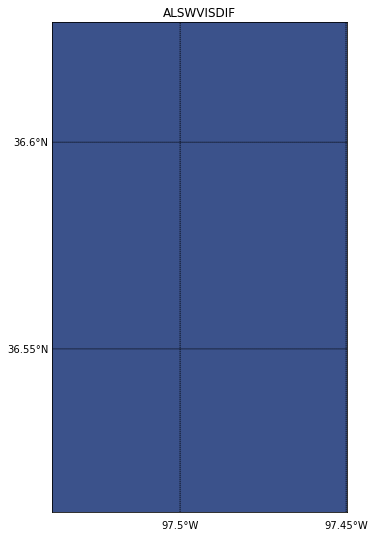

ALSWNIRDIR


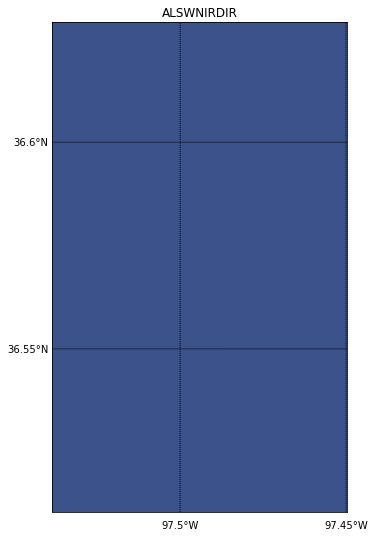

ALSWNIRDIF


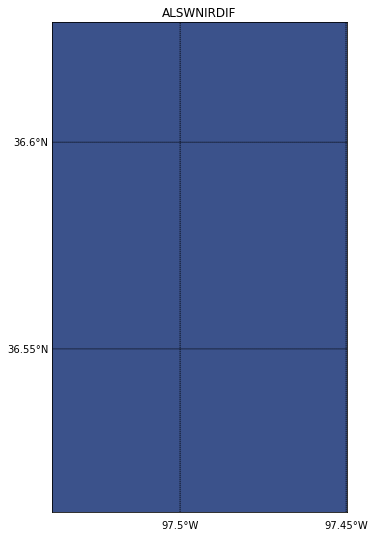

RA


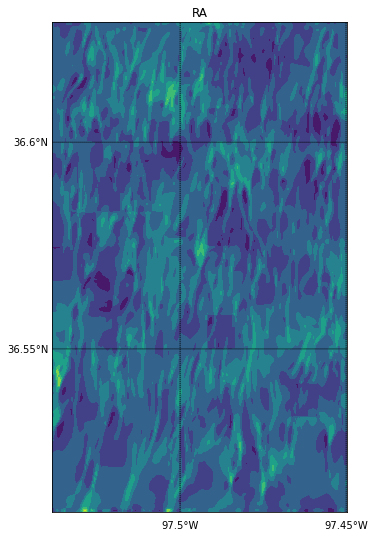

RS


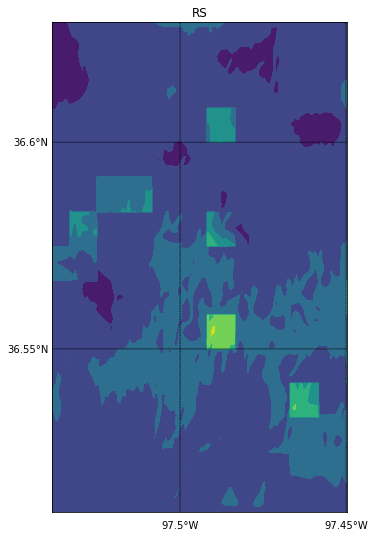

LAI


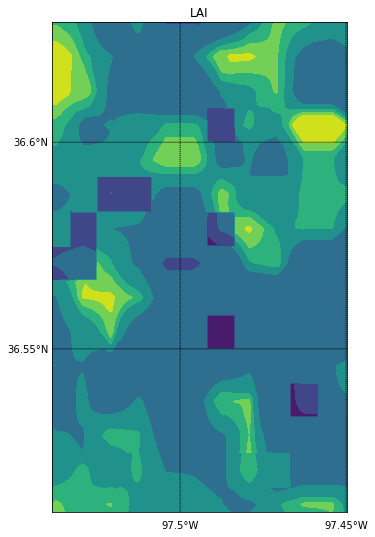

CT


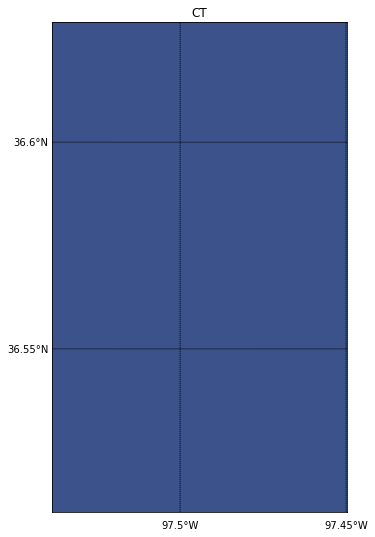

THZ0


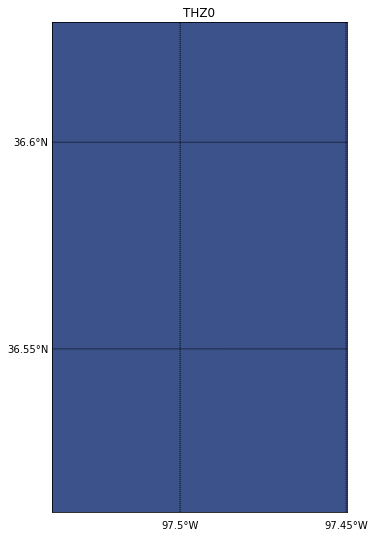

Z0


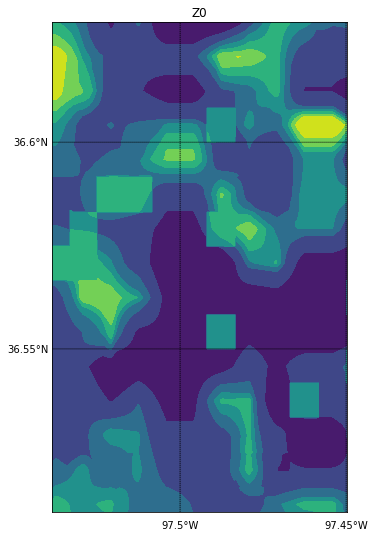

QZ0


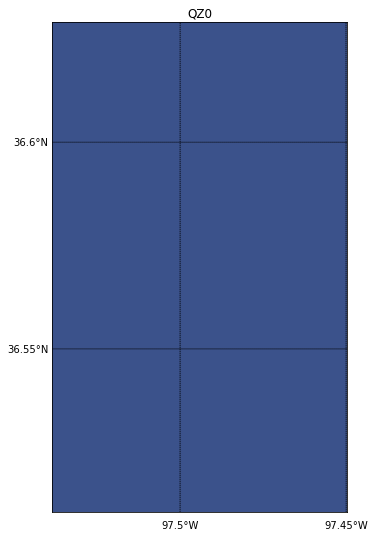

UZ0


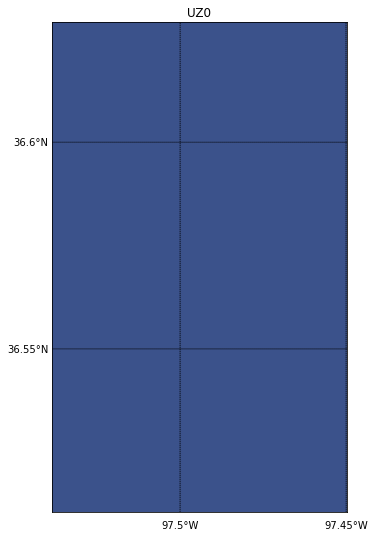

VZ0


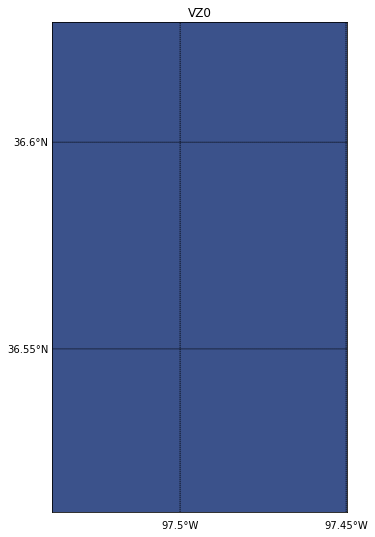

QSFC


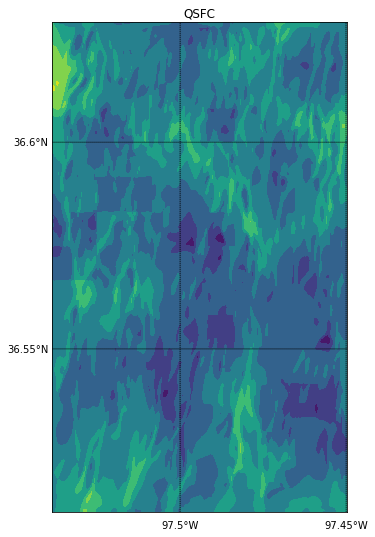

AKHS


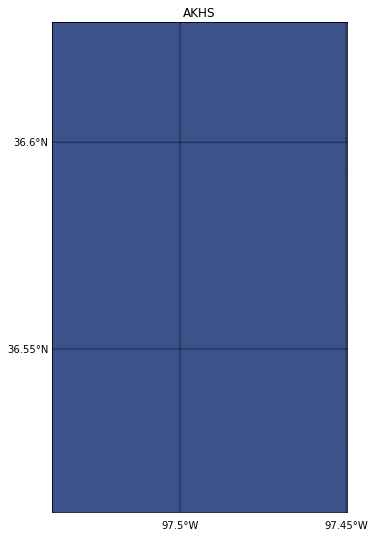

AKMS


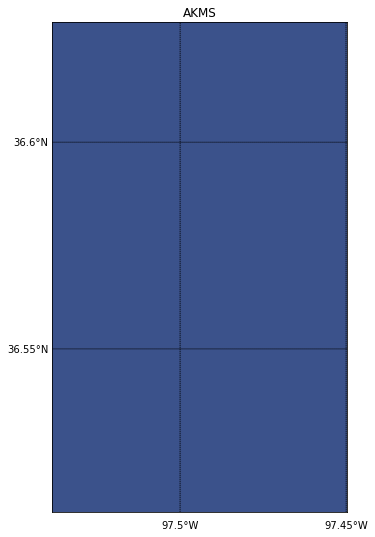

KPBL


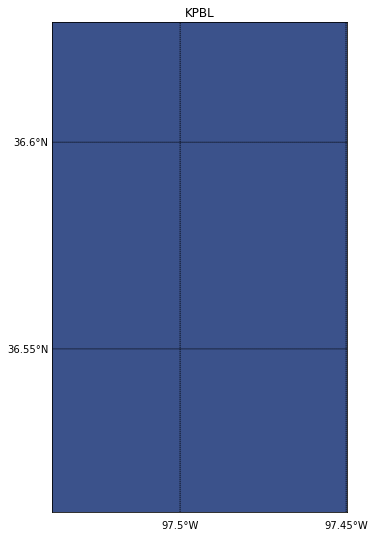

AKPBL


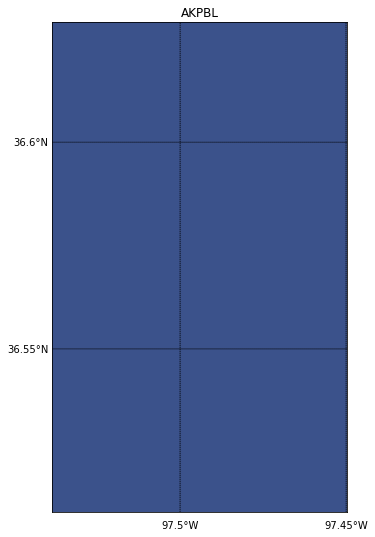

TSHLTR


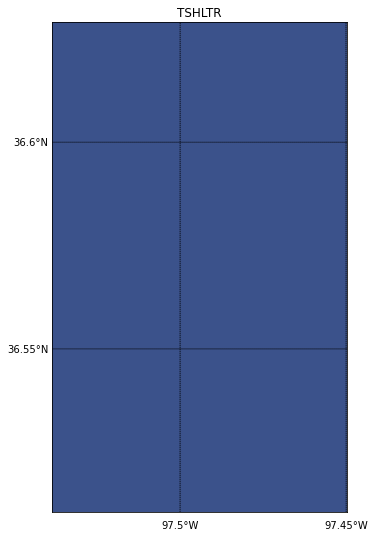

QSHLTR


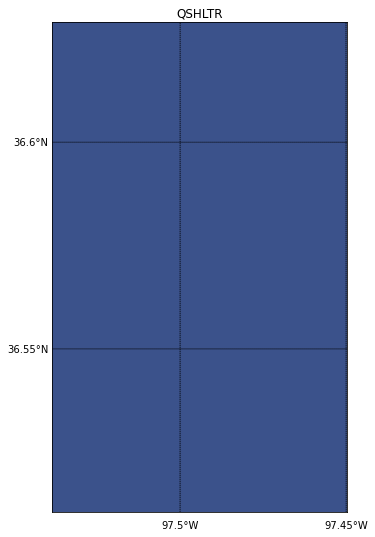

PSHLTR


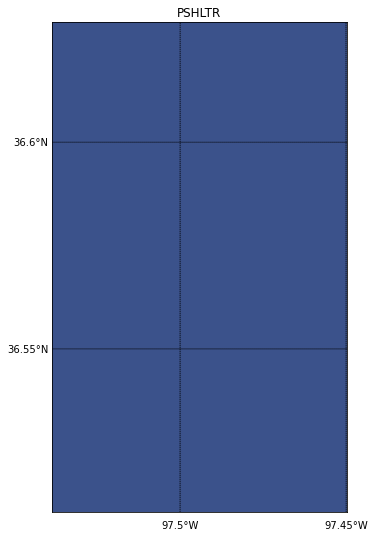

TH10


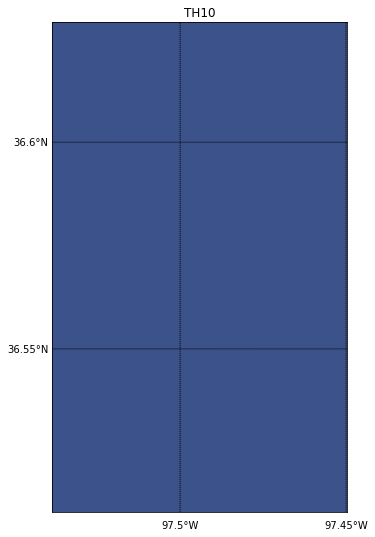

Q10


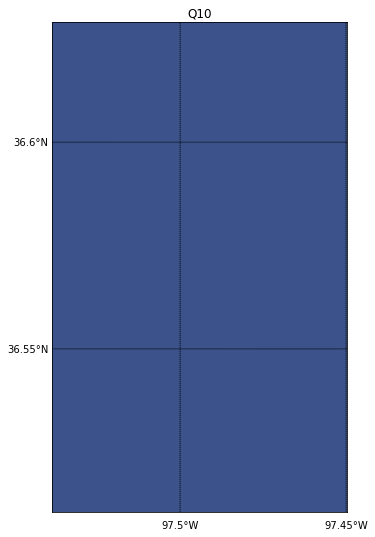

VAR


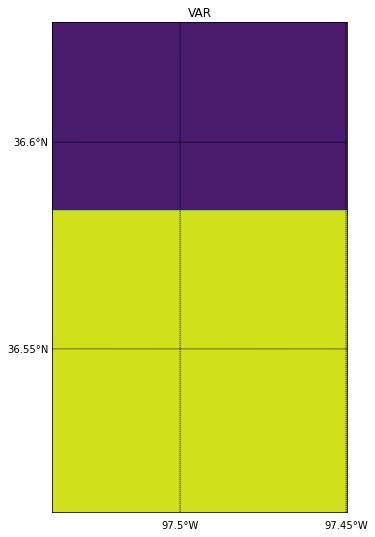

CTOPO


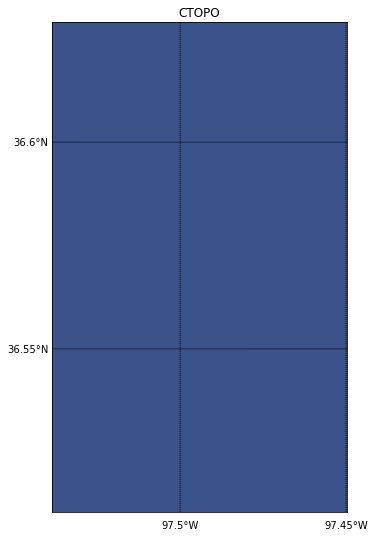

CTOPO2


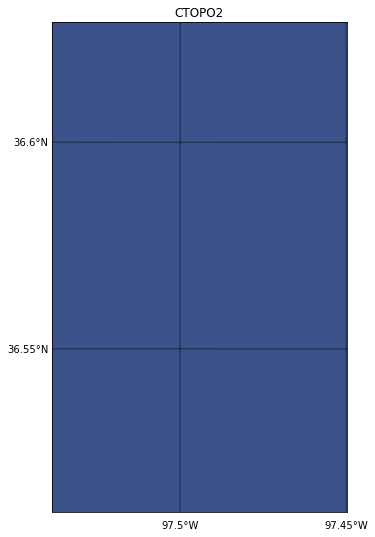

HTOP


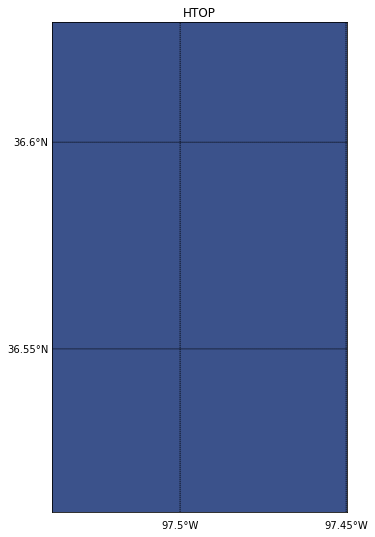

HBOT


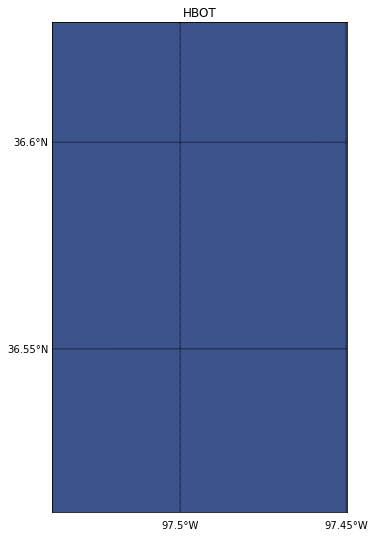

HTOPR


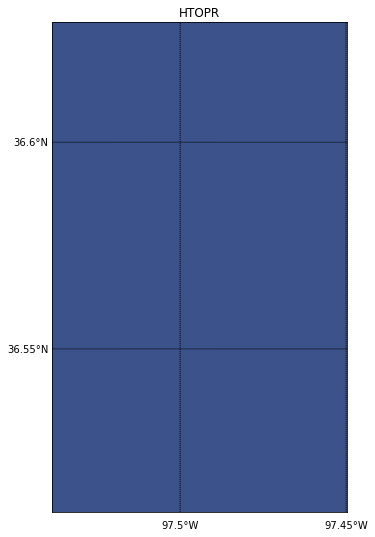

HBOTR


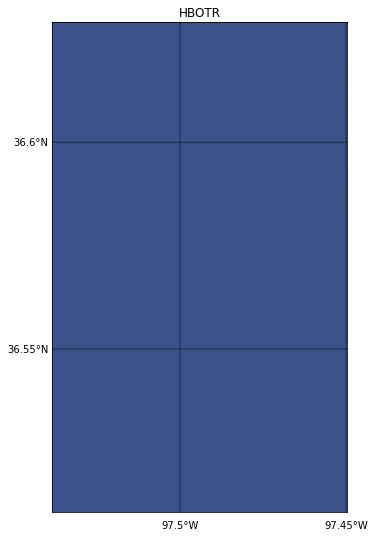

CUTOP


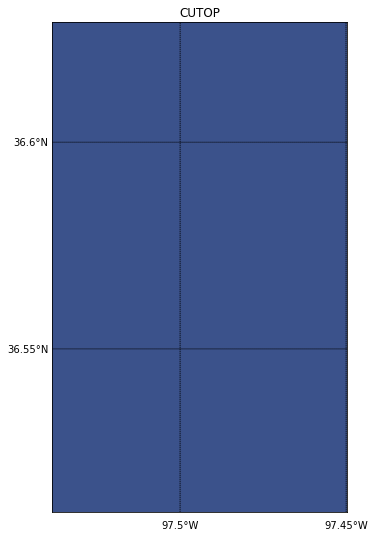

CUBOT


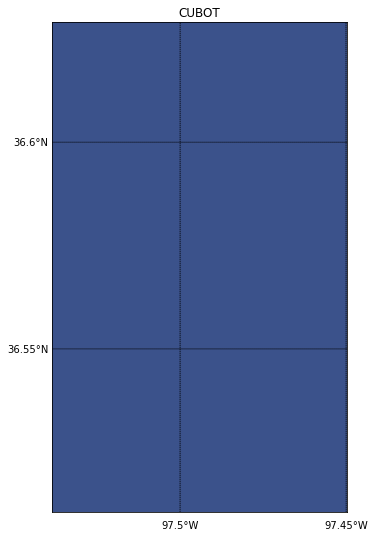

CUPPT


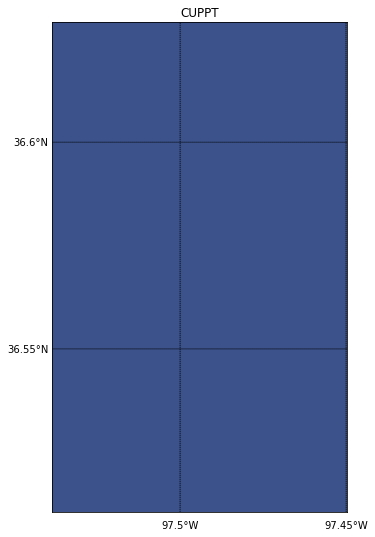

AODTOT


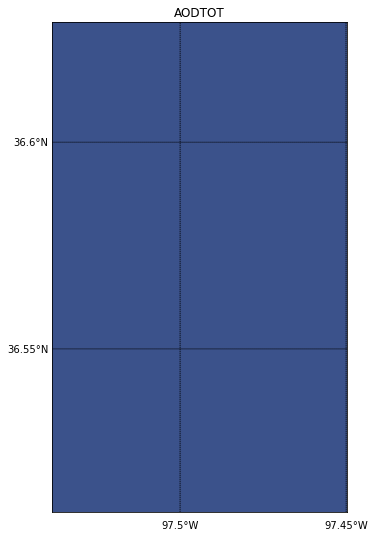

CUPFLAG


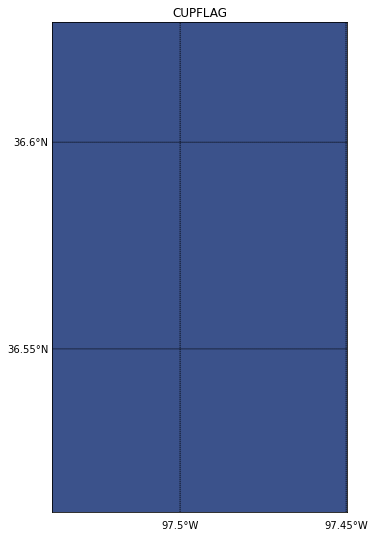

SLOPESFC


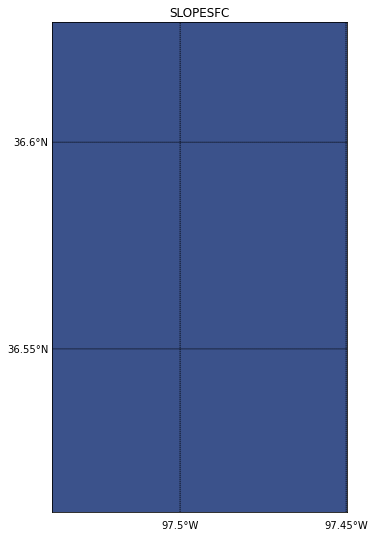

SLOPEEZ


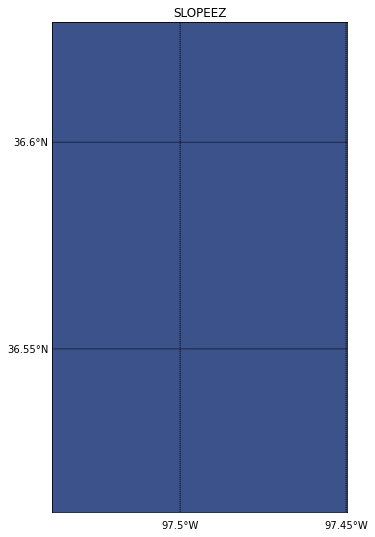

SIGMASFC


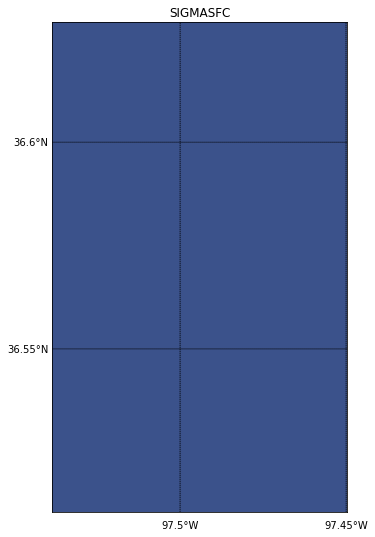

SIGMAEZ


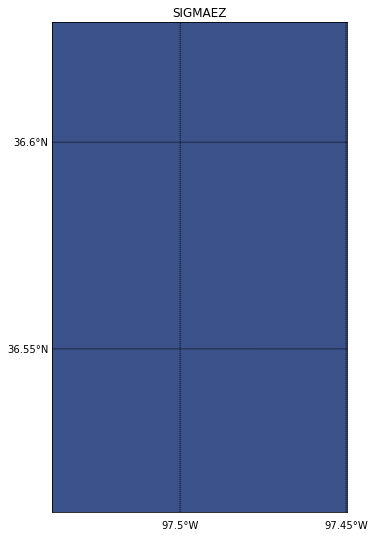

SHALL


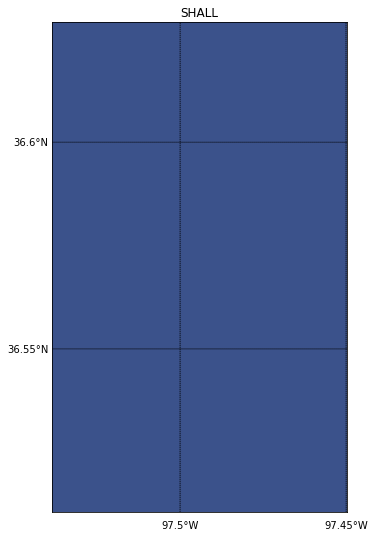

TAUCLOUD


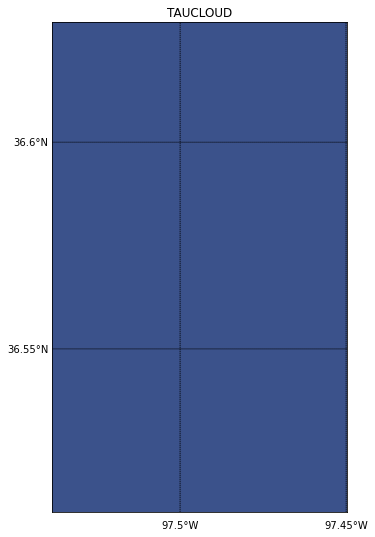

TACTIVE


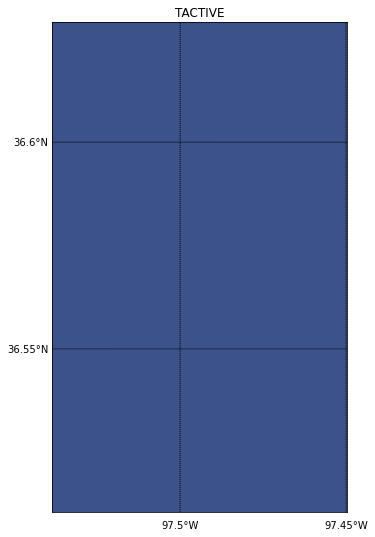

TCLOUD_CUP


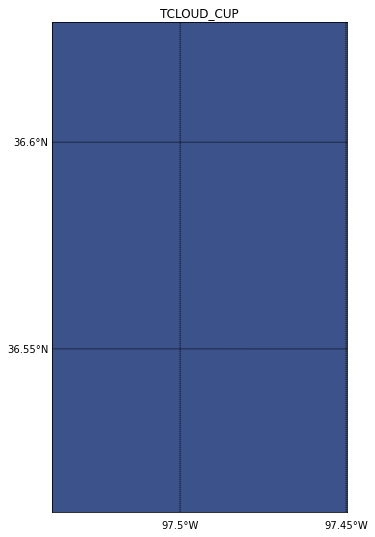

WCLOUDBASE


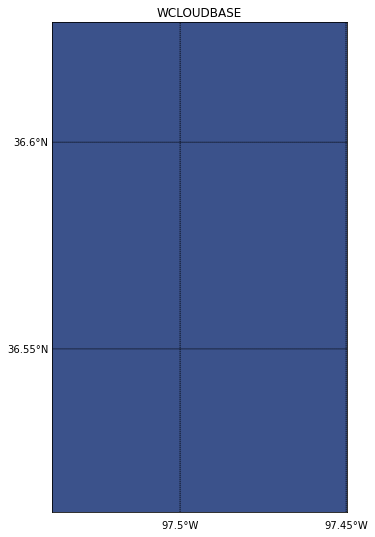

ACTIVEFRAC


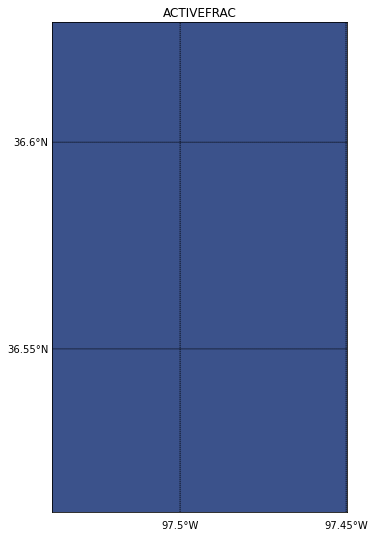

WACT_CUP


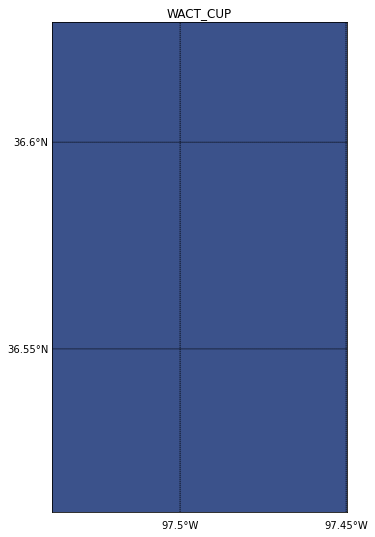

WULCL_CUP


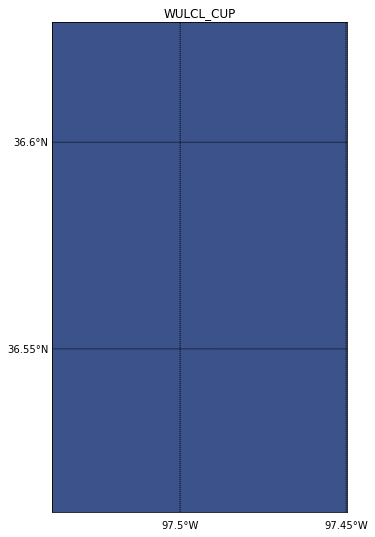

TSTAR


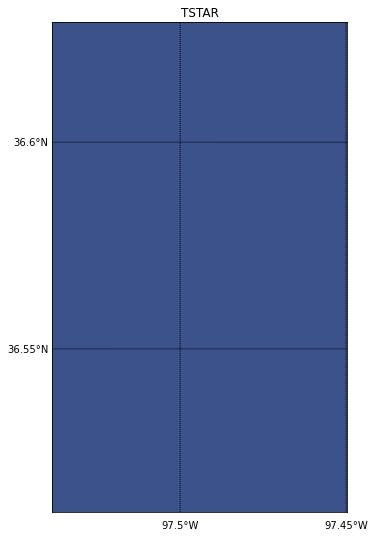

LNINT


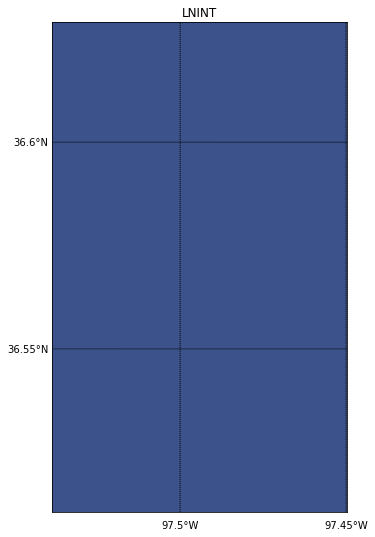

MAPFAC_M


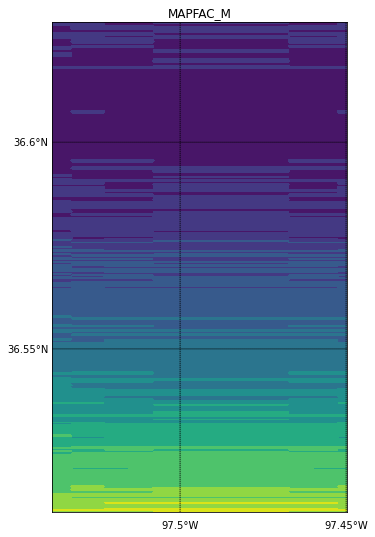

MAPFAC_MX


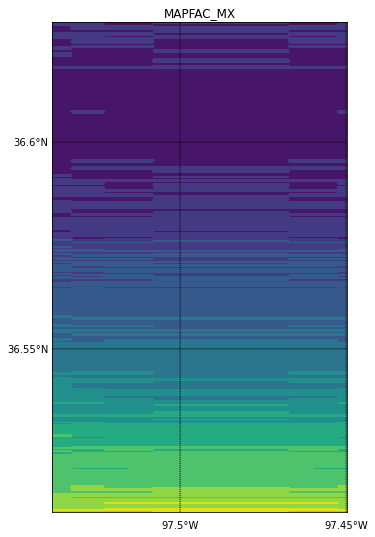

MAPFAC_MY


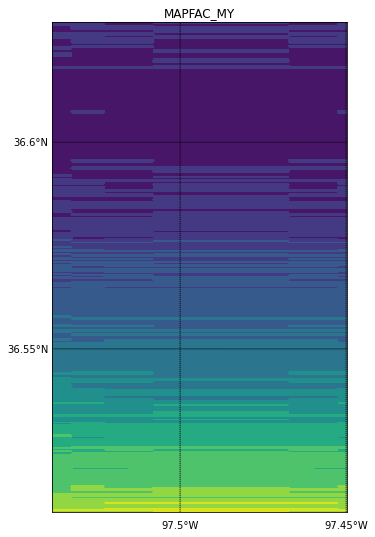

F


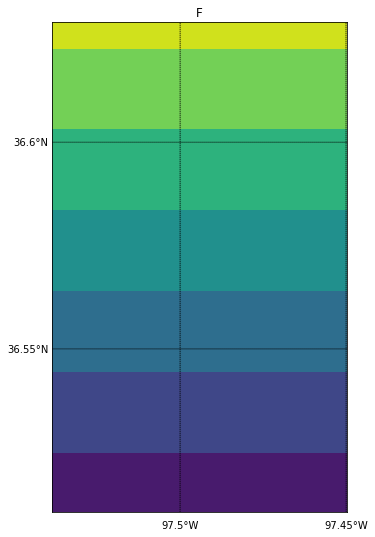

E


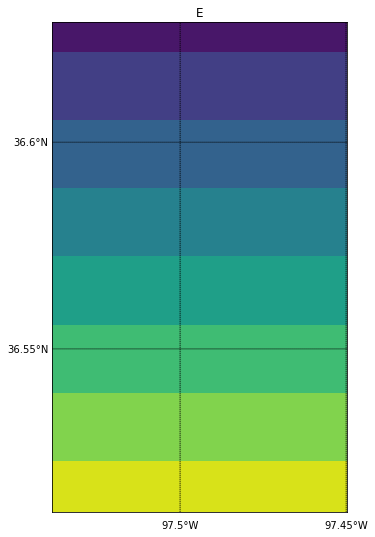

SINALPHA


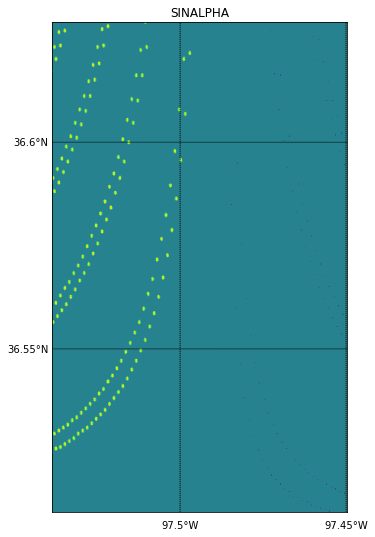

COSALPHA


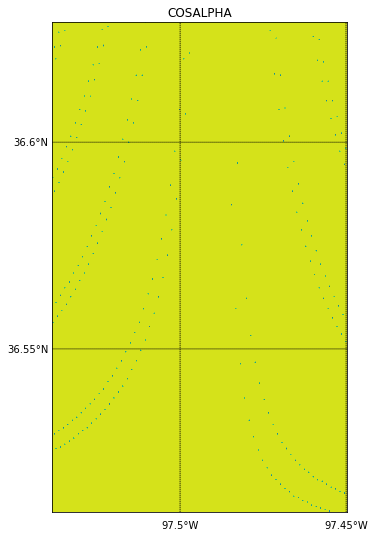

HGT


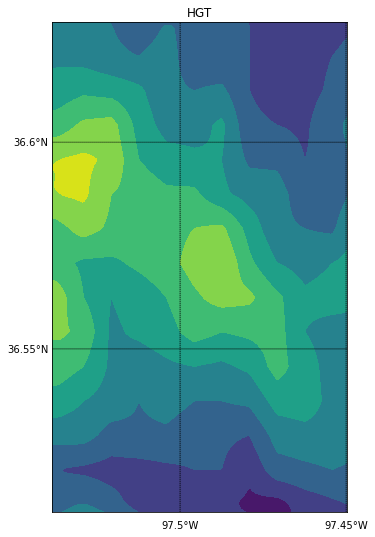

HGT_SHAD


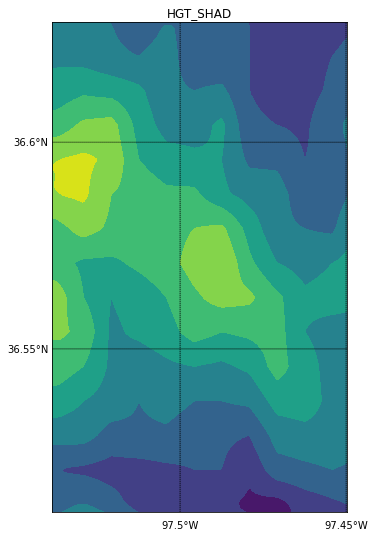

TSK


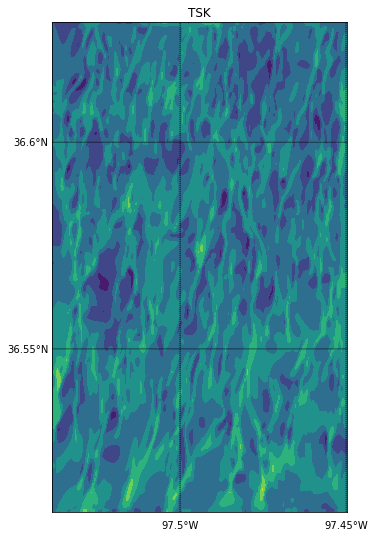

TSK_SAVE


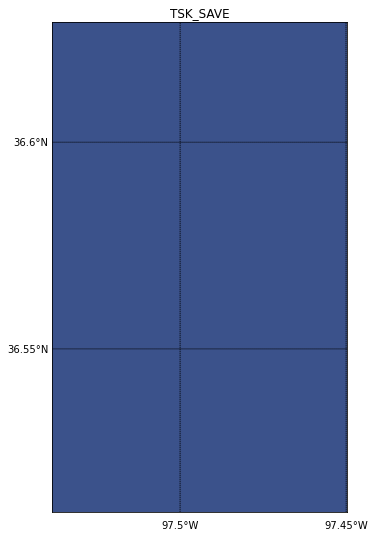

RAINC


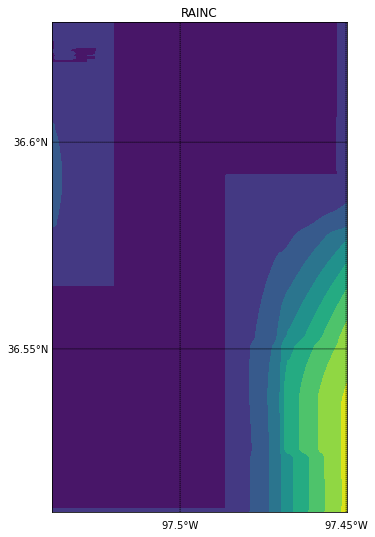

RAINSH


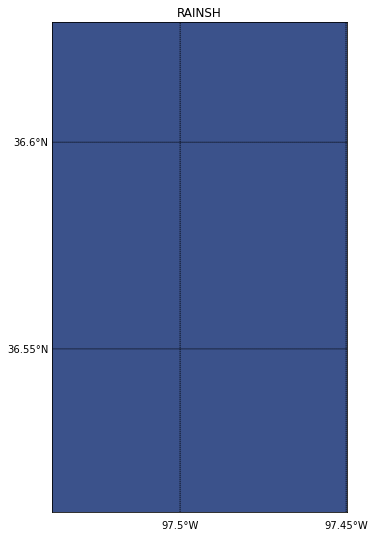

RAINNC


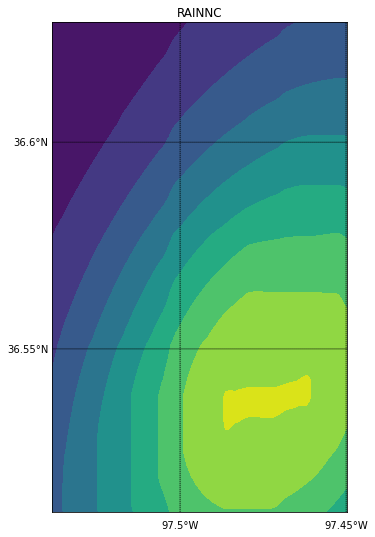

PRATEC


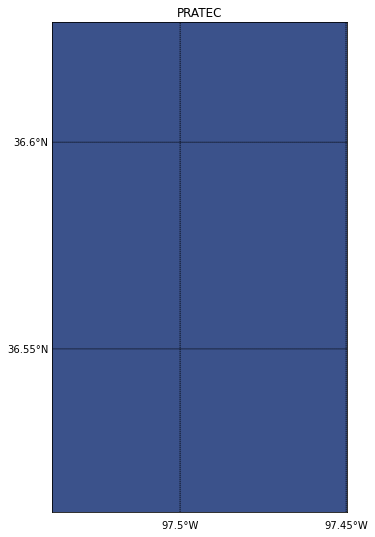

PRATESH


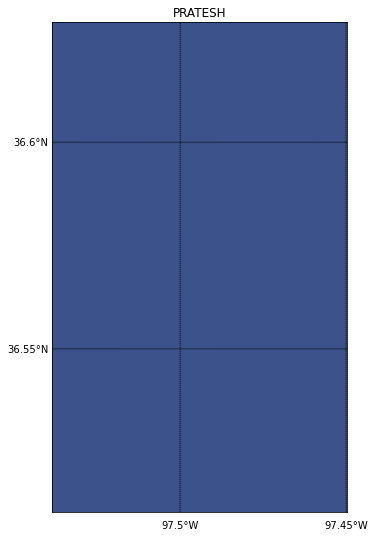

RAINCV


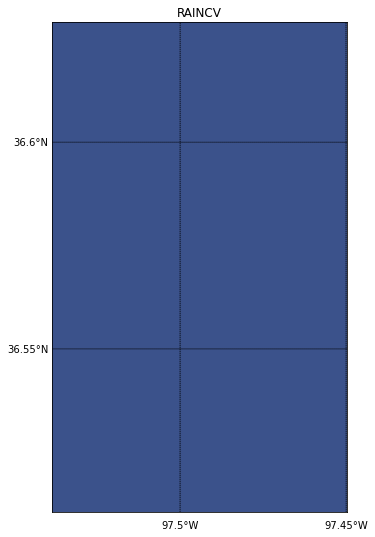

RAINSHV


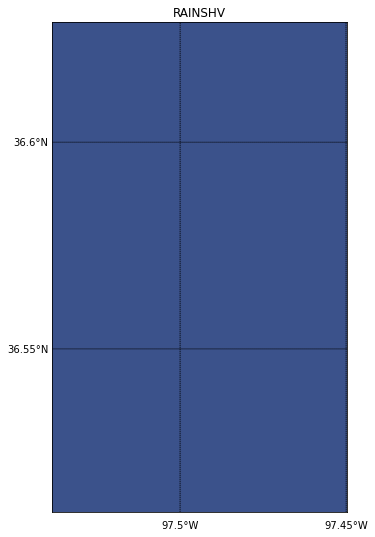

RAINNCV


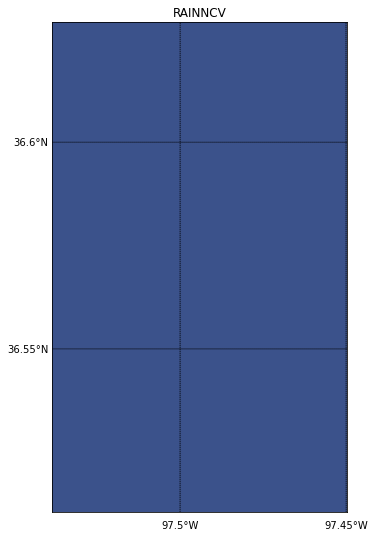

RAINBL


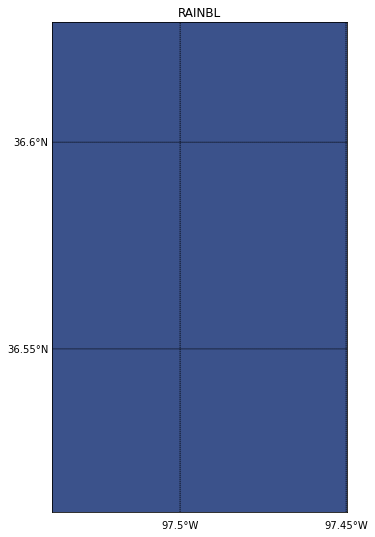

SNOWNC


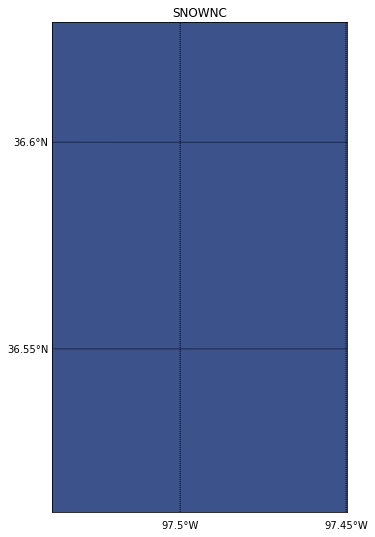

GRAUPELNC


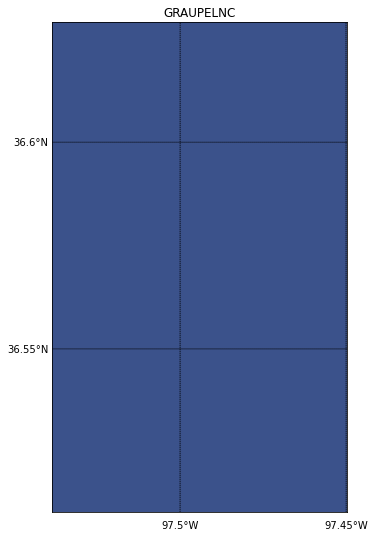

HAILNC


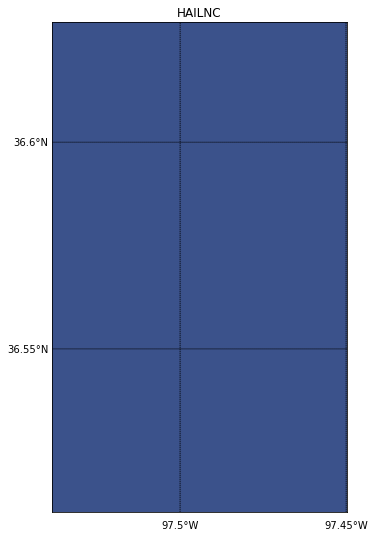

SNOWNCV


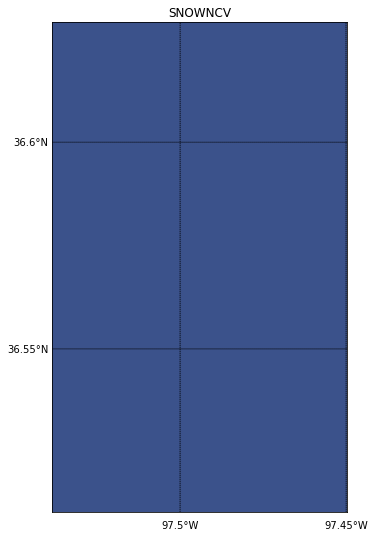

GRAUPELNCV


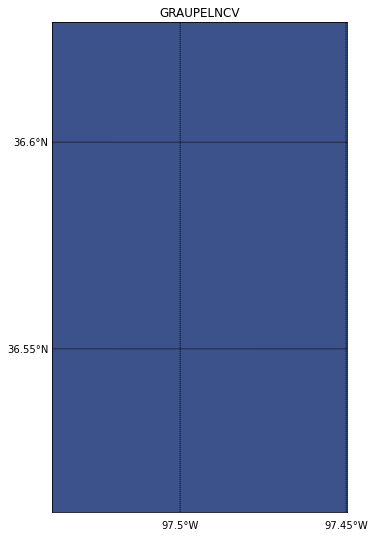

HAILNCV


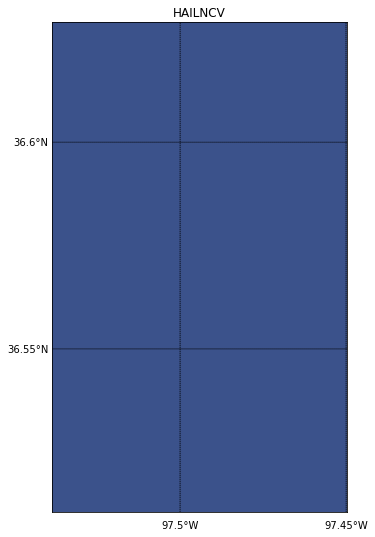

NCA


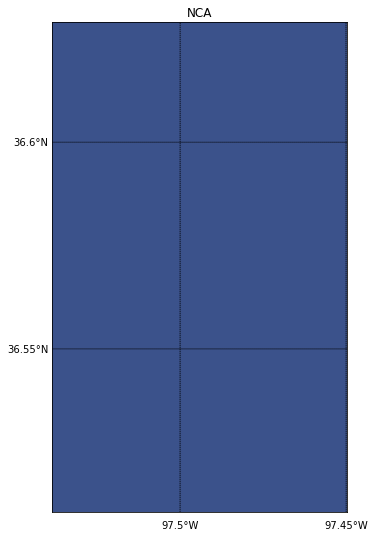

MASS_FLUX


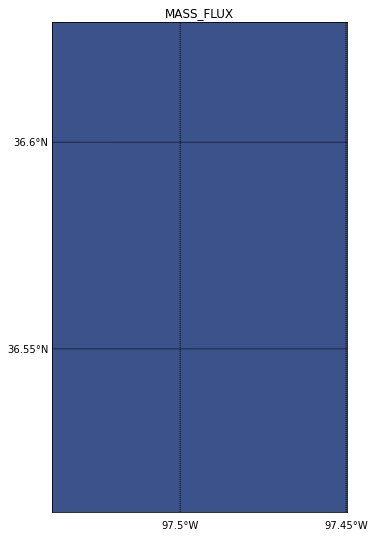

APR_GR


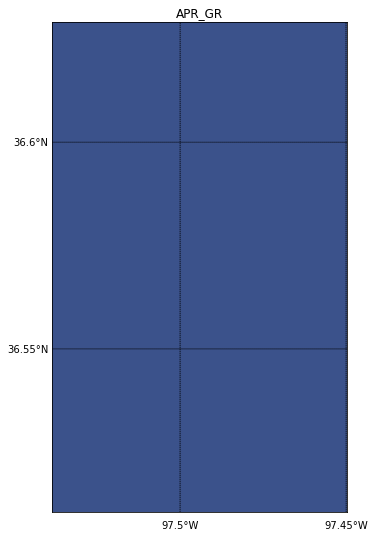

APR_W


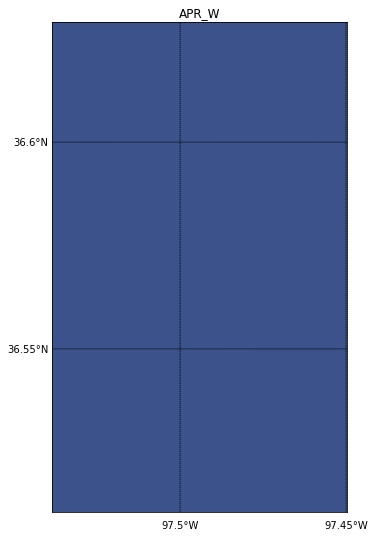

APR_MC


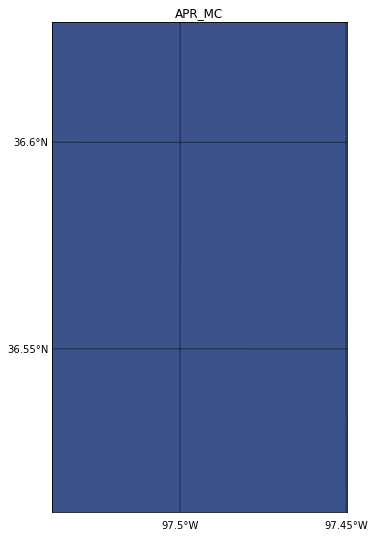

APR_ST


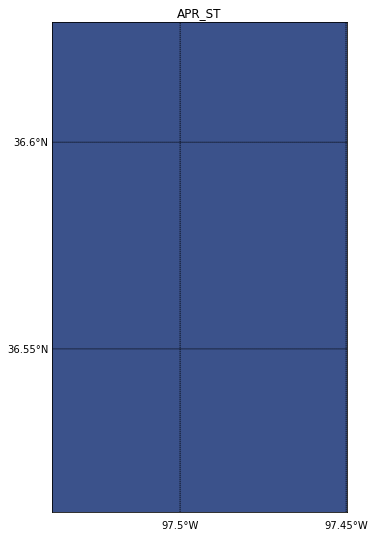

APR_AS


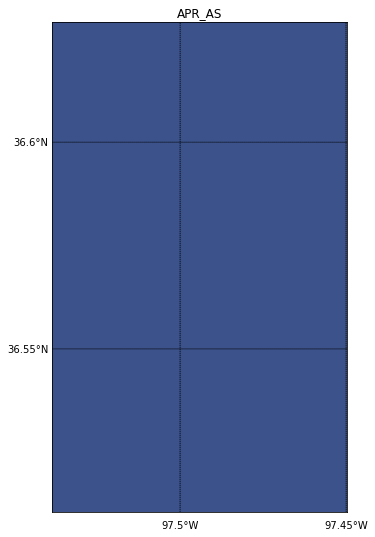

APR_CAPMA


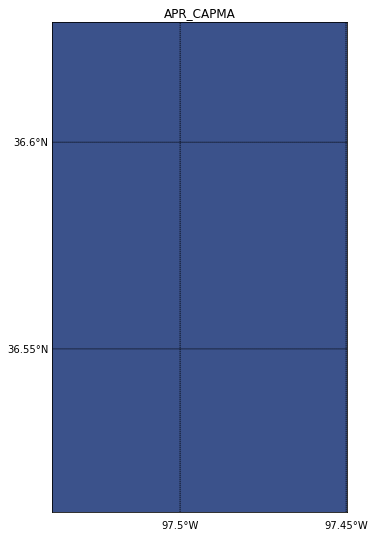

APR_CAPME


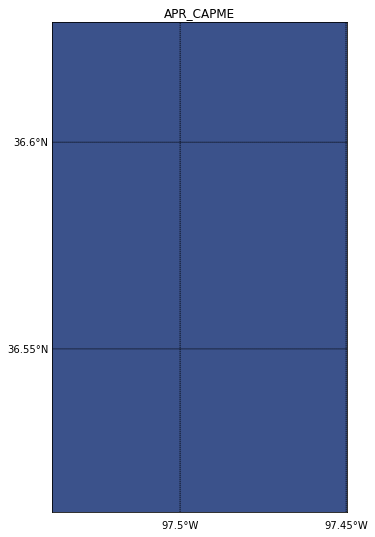

APR_CAPMI


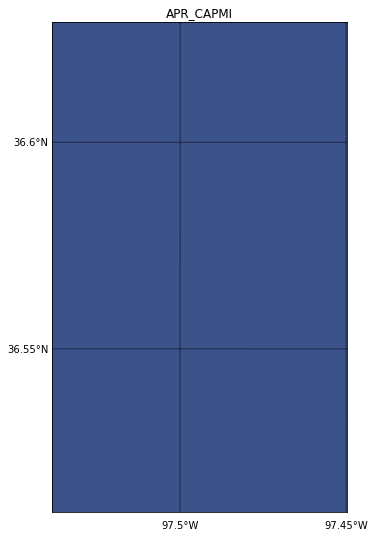

RAINCV_A


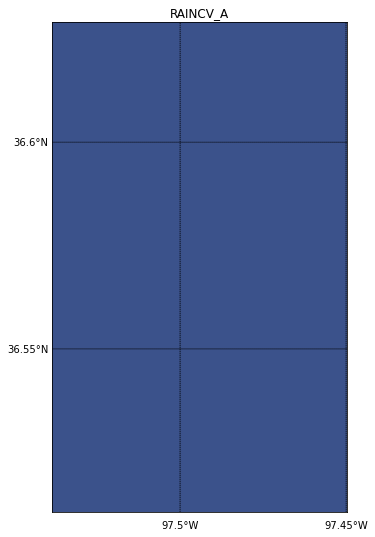

RAINCV_B


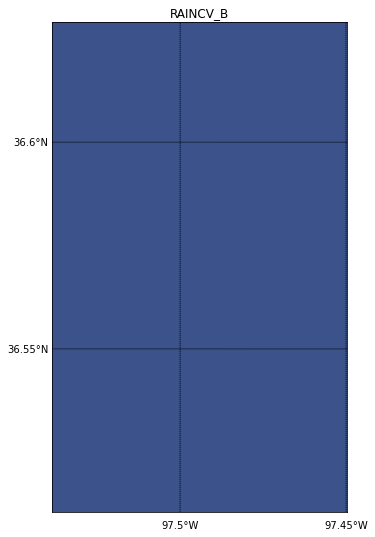

SWDOWN


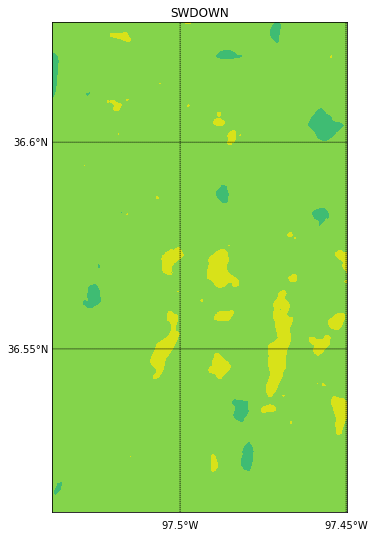

SWDOWN2


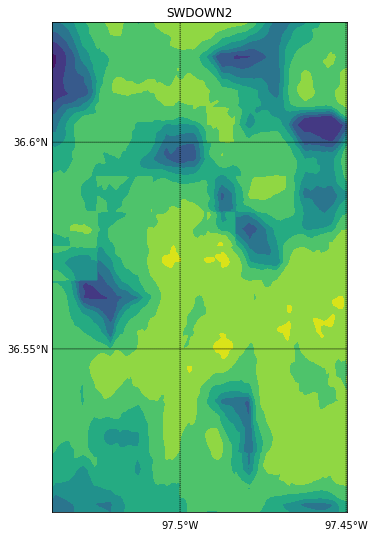

SWDOWNC2


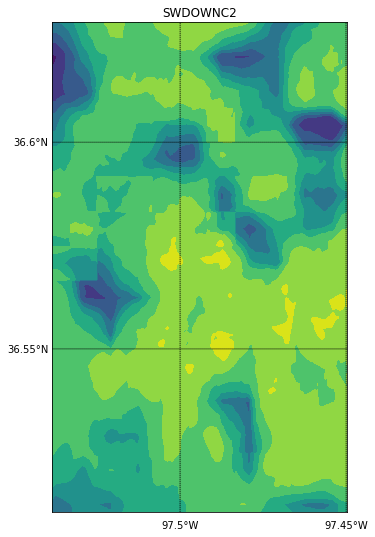

GSW


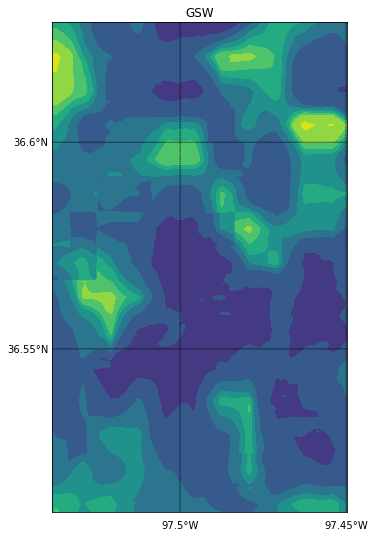

GLW


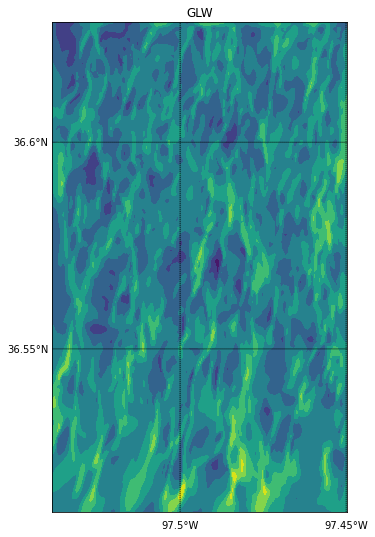

SWNORM


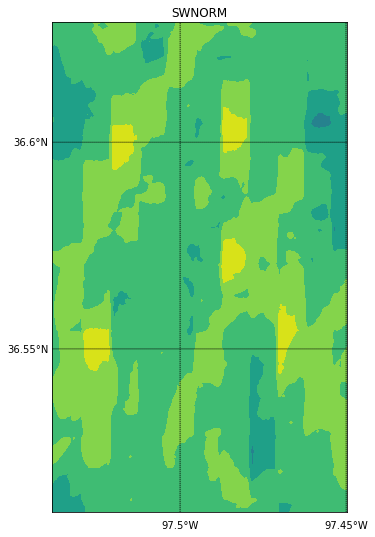

DIFFUSE_FRAC


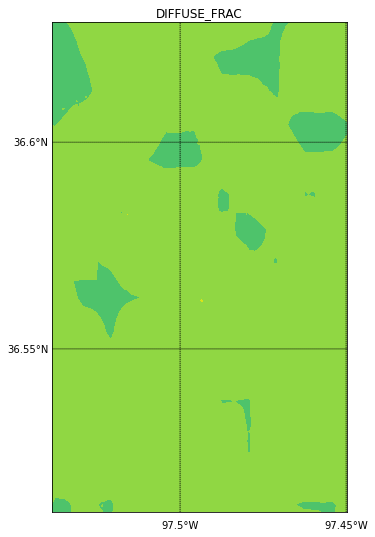

SWDDIR


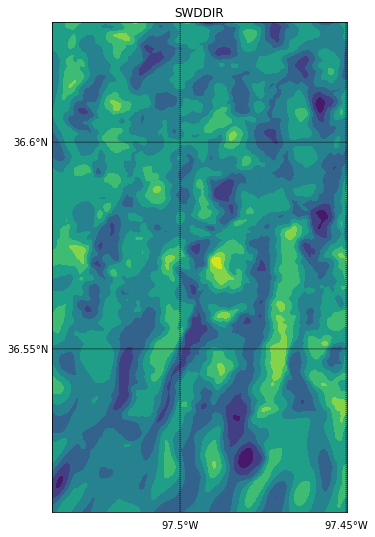

SWDDIR2


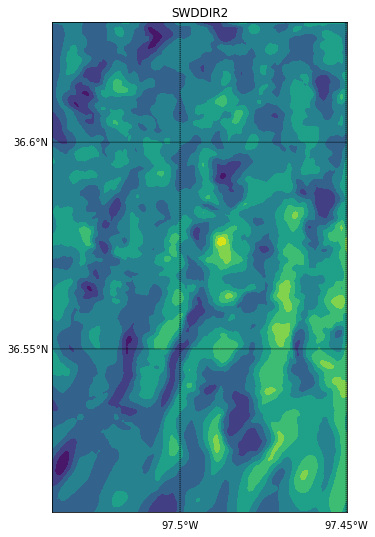

SWDDIRC


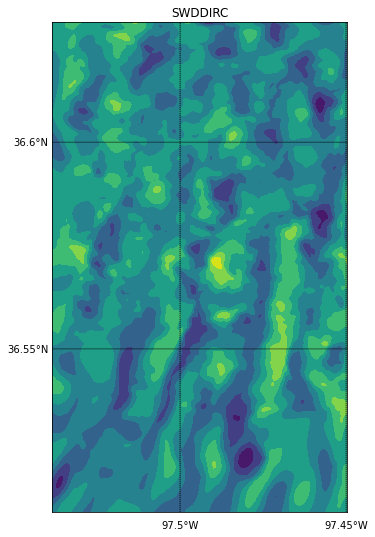

SWDDNI


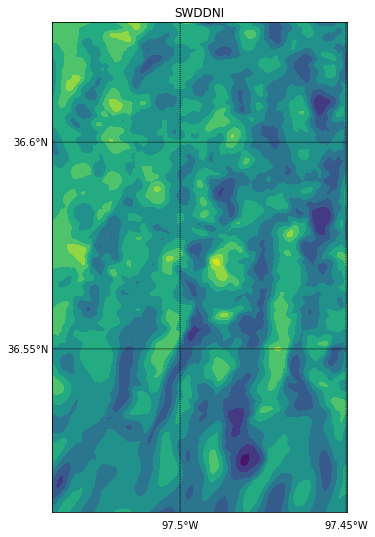

SWDDNI2


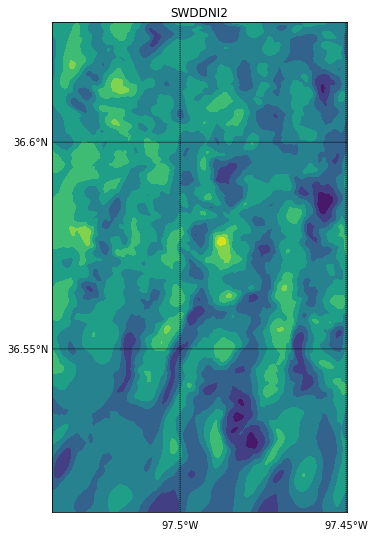

SWDDNIC


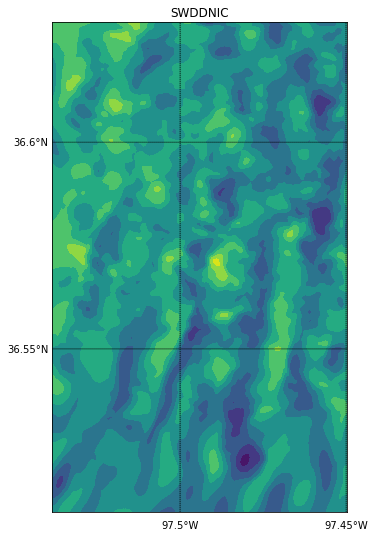

SWDDNIC2


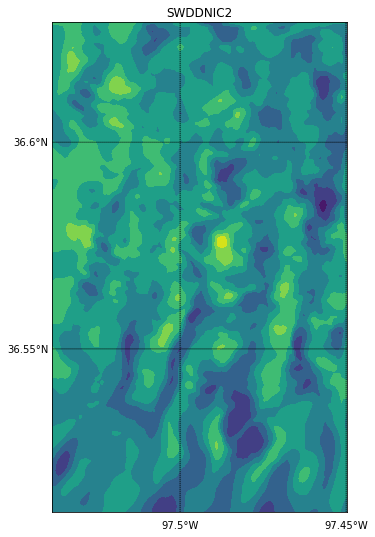

SWDDIF


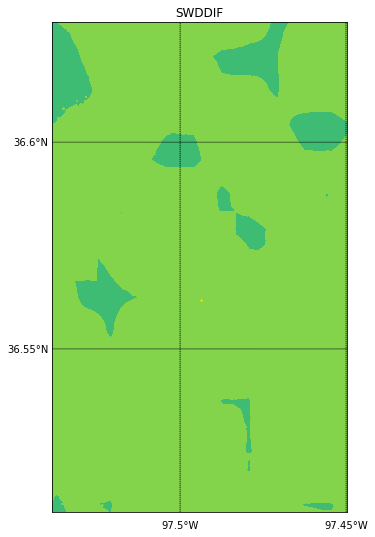

SWDDIF2


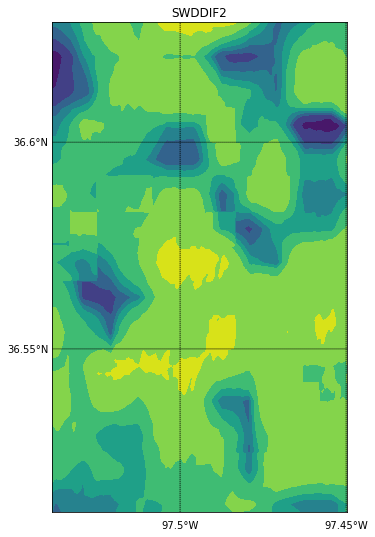

GX


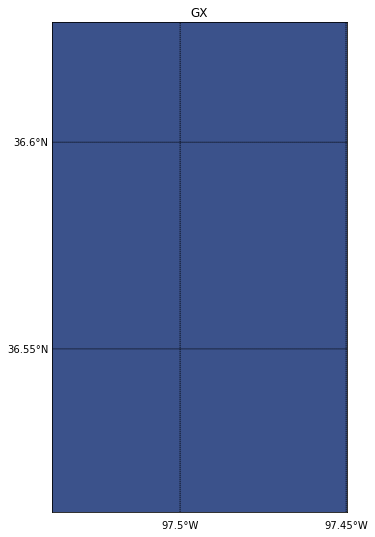

BX


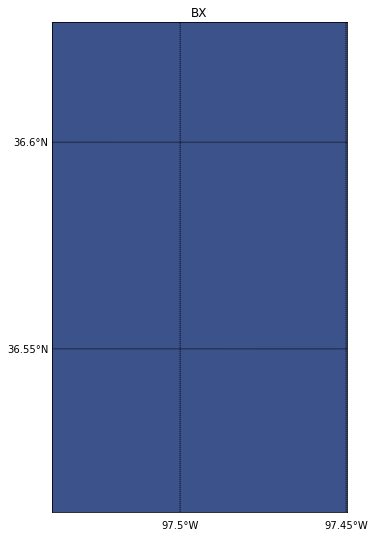

GG


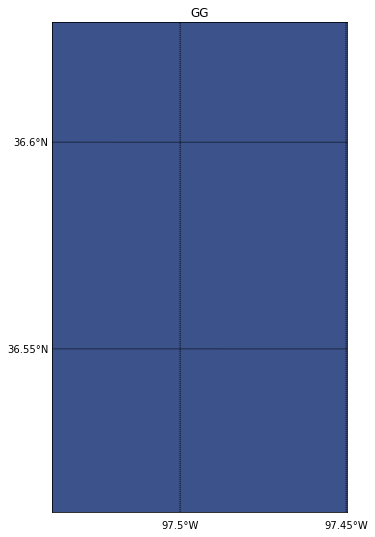

BB


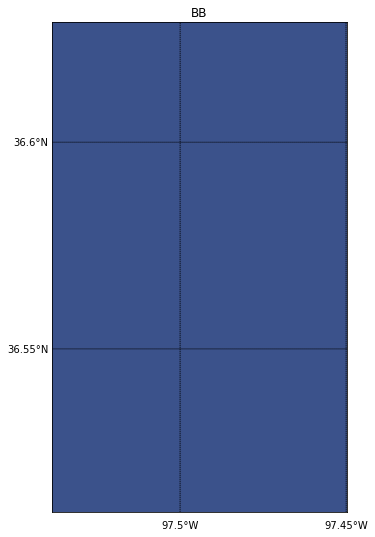

COSZEN_REF


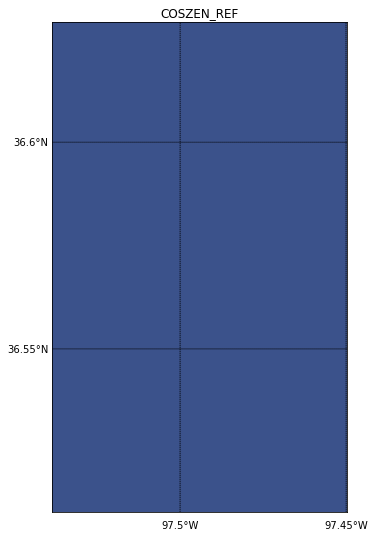

SWDOWN_REF


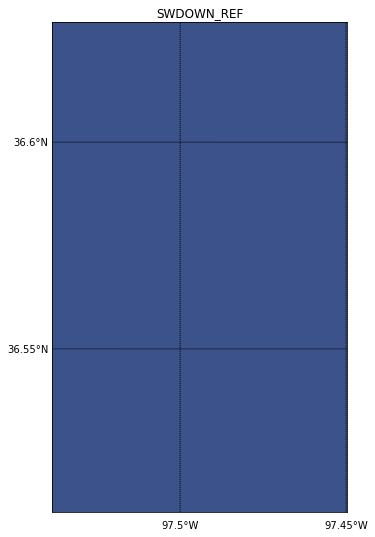

SWDDIR_REF


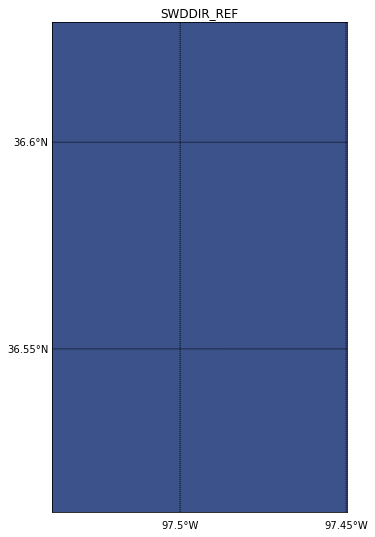

AOD5502D


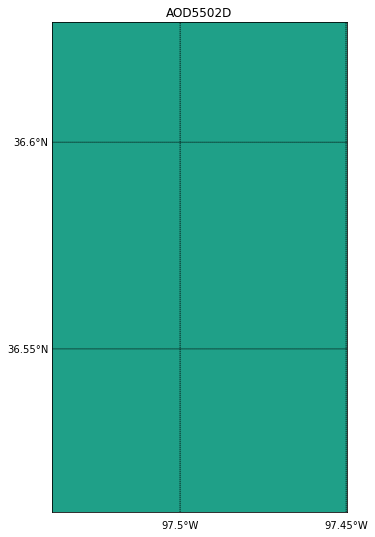

ANGEXP2D


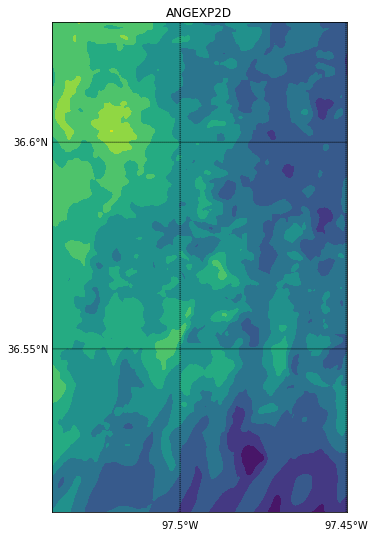

AERSSA2D


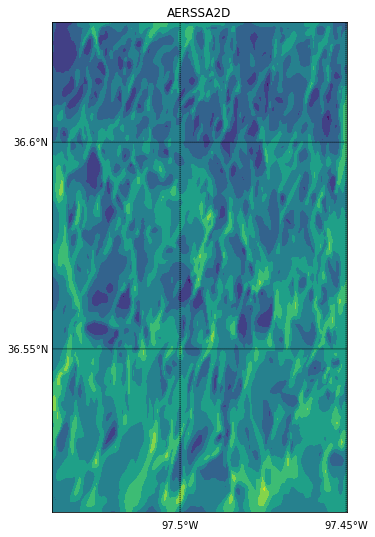

AERASY2D


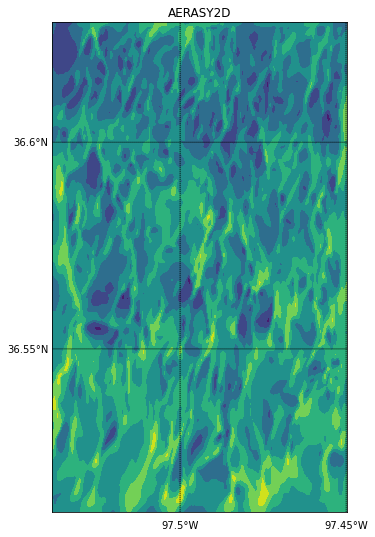

TAOD5502D


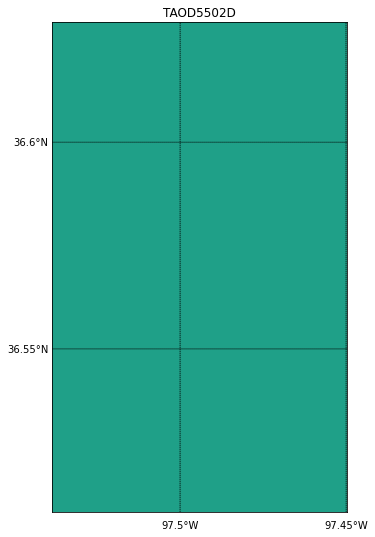

ACSWUPT


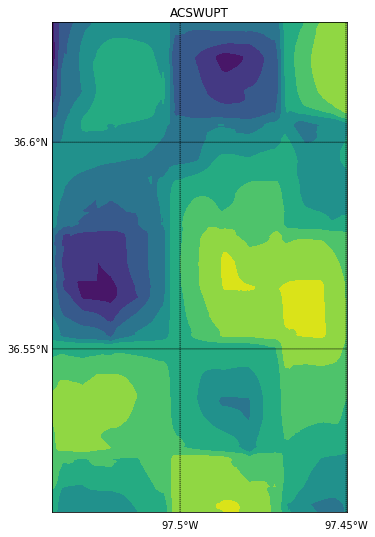

ACSWUPTC


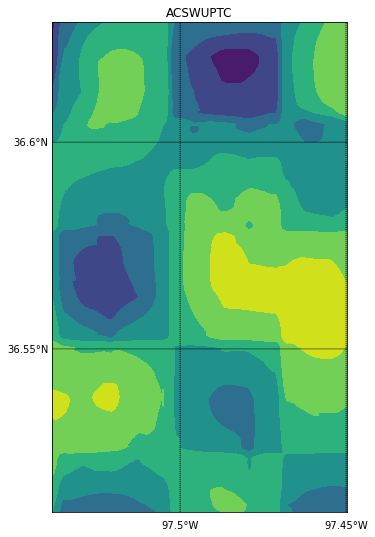

ACSWDNT


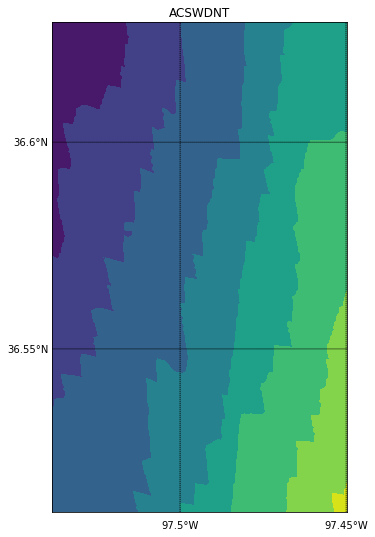

ACSWDNTC


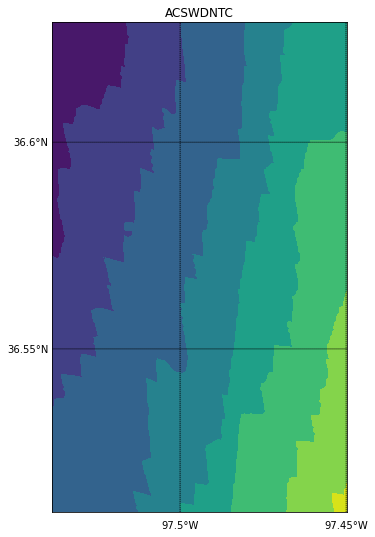

ACSWUPB


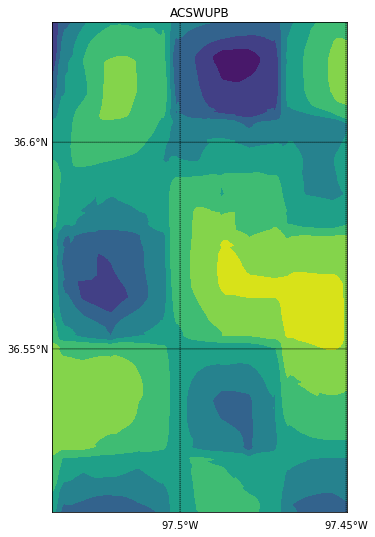

ACSWUPBC


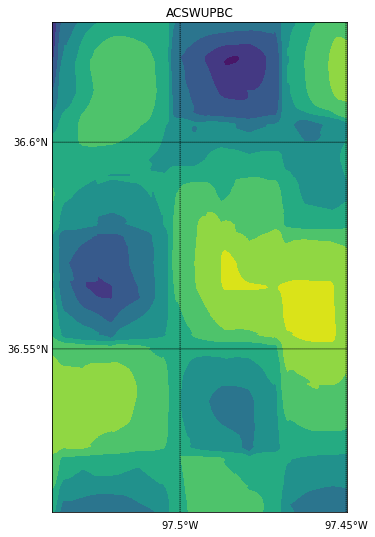

ACSWDNB


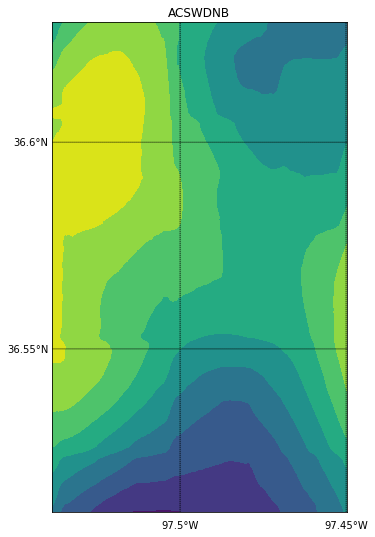

ACSWDNBC


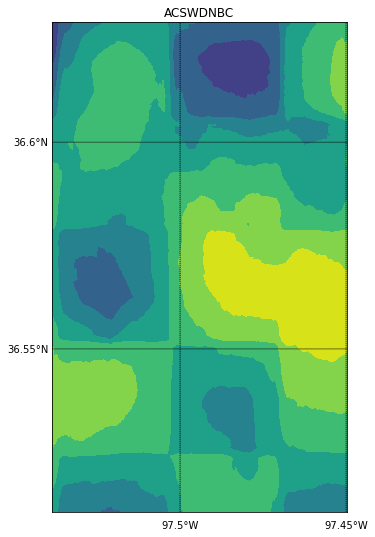

ACLWUPT


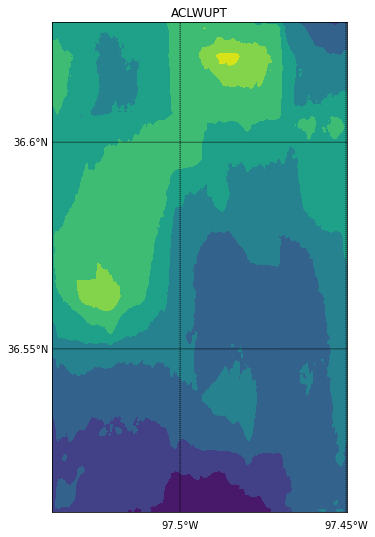

ACLWUPTC


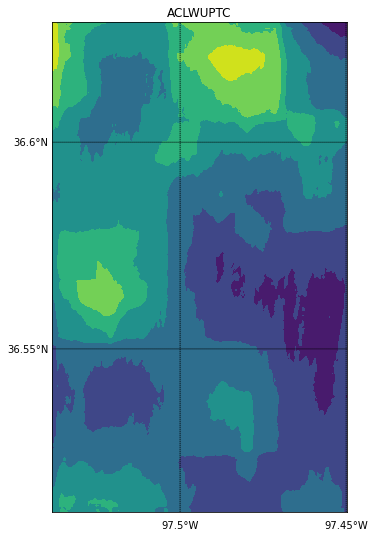

ACLWDNT


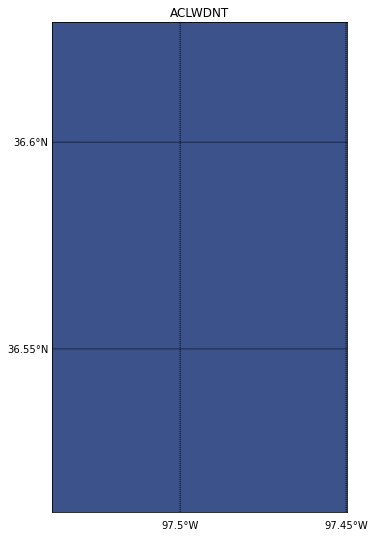

ACLWDNTC


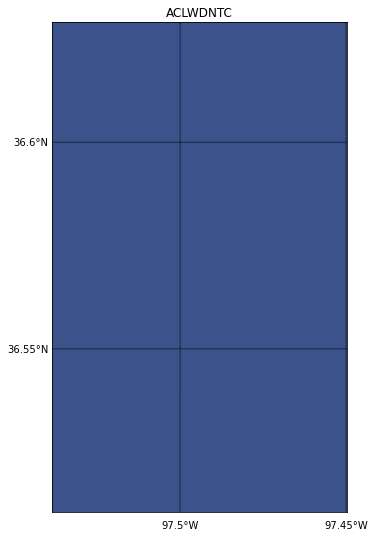

ACLWUPB


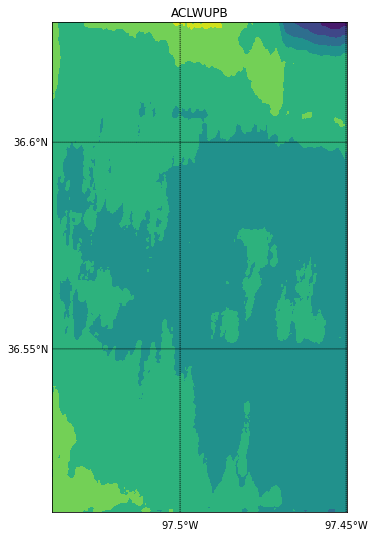

ACLWUPBC


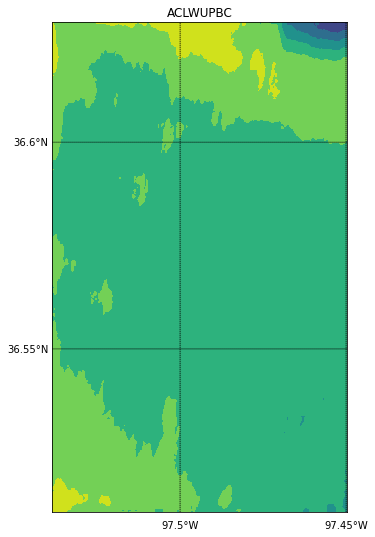

ACLWDNB


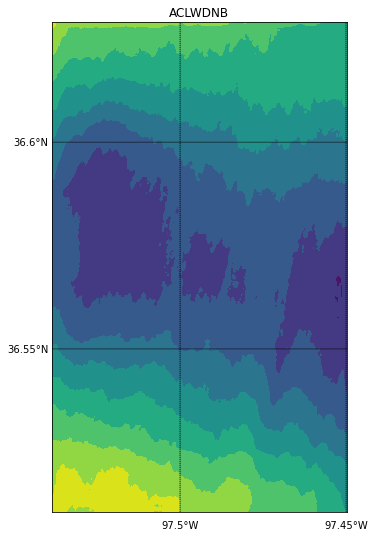

ACLWDNBC


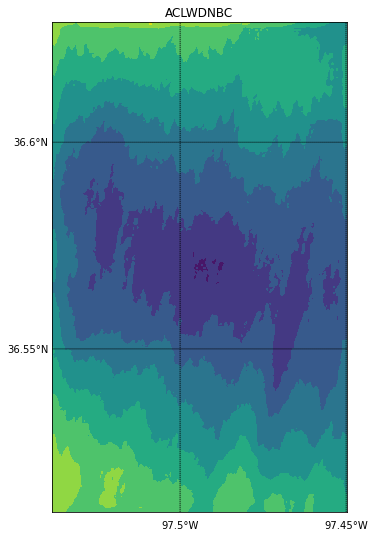

SWUPT


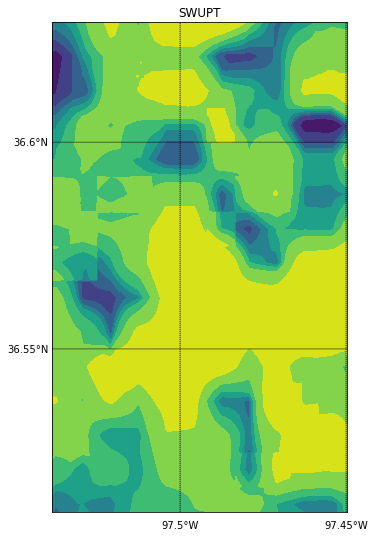

SWUPTC


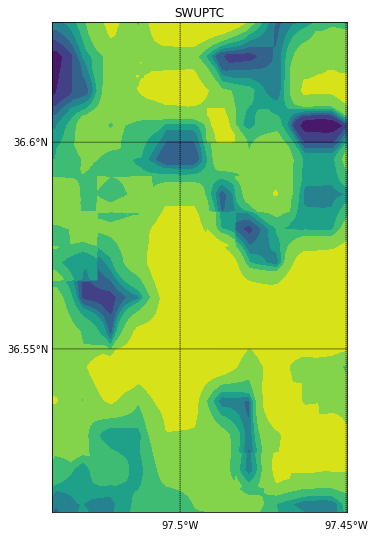

SWDNT


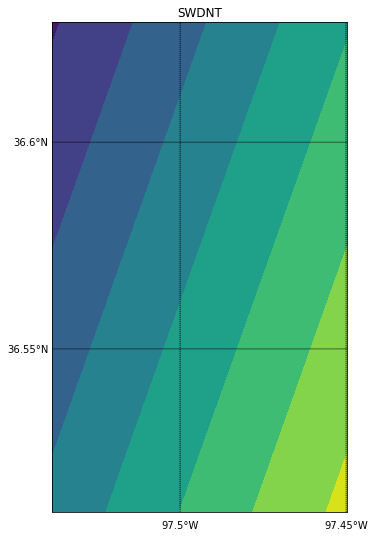

SWDNTC


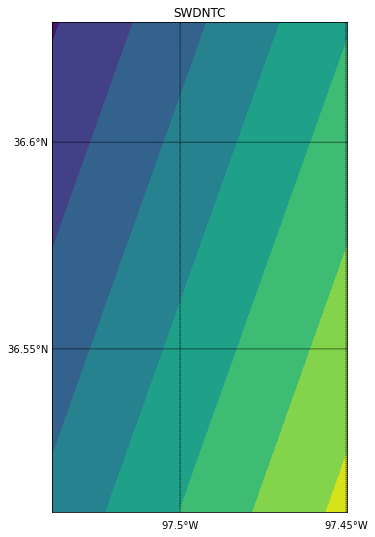

SWUPB


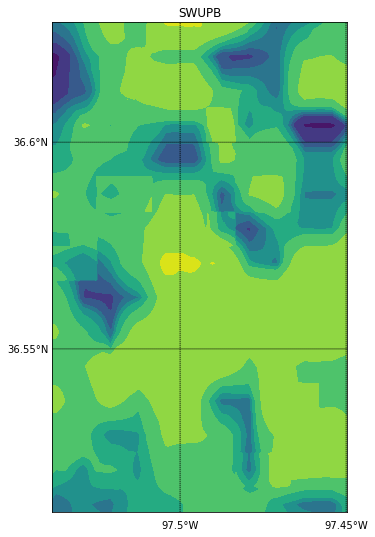

SWUPBC


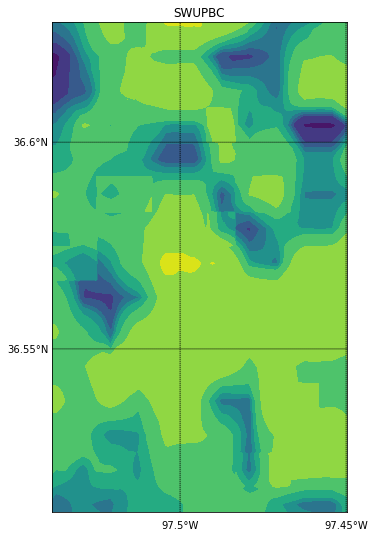

SWDNB


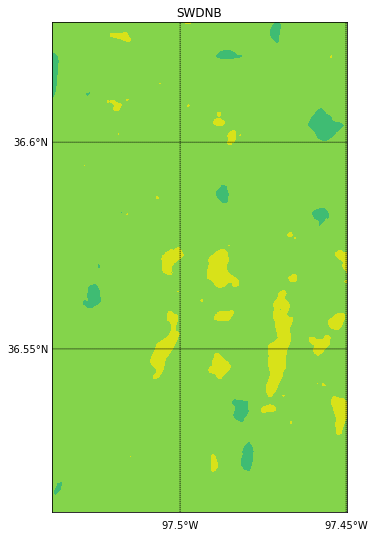

SWDNBC


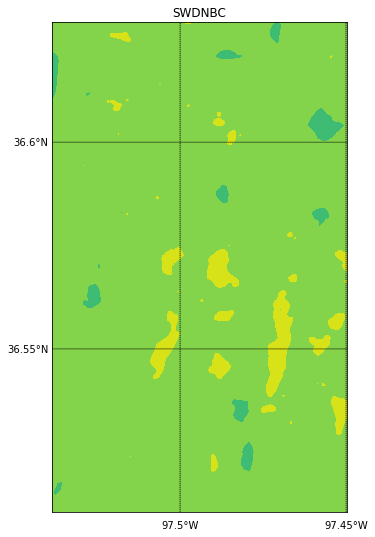

LWUPT


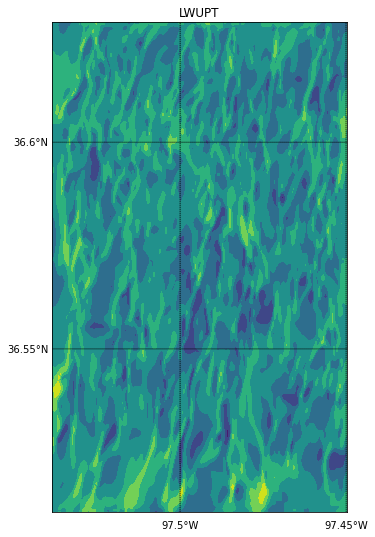

LWUPTC


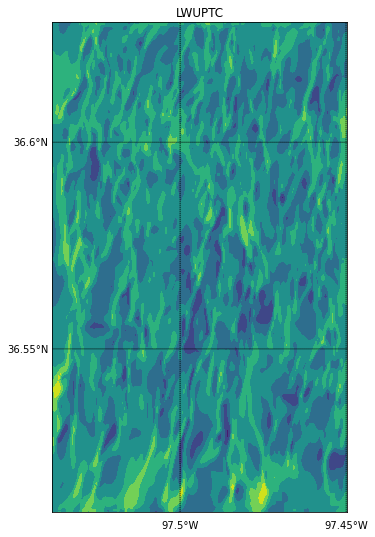

LWDNT


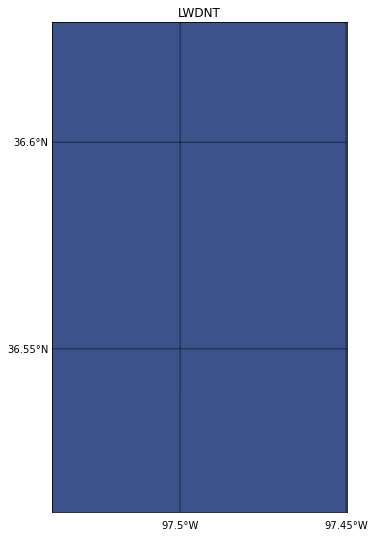

LWDNTC


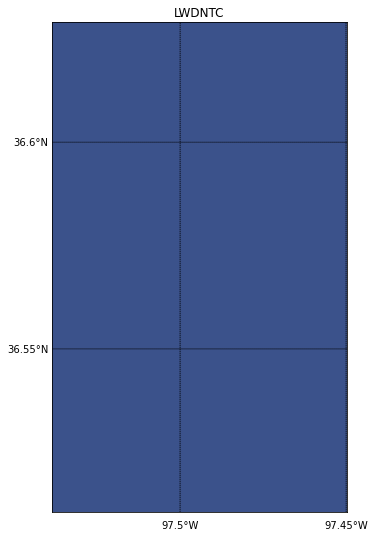

LWUPB


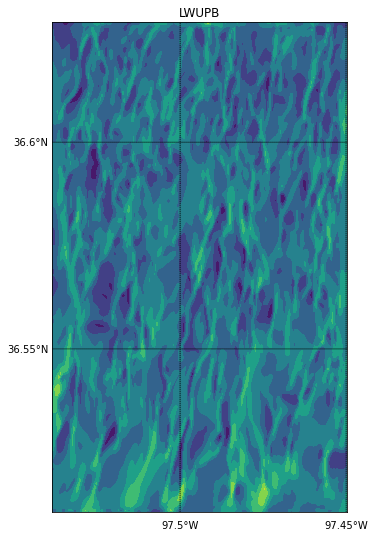

LWUPBC


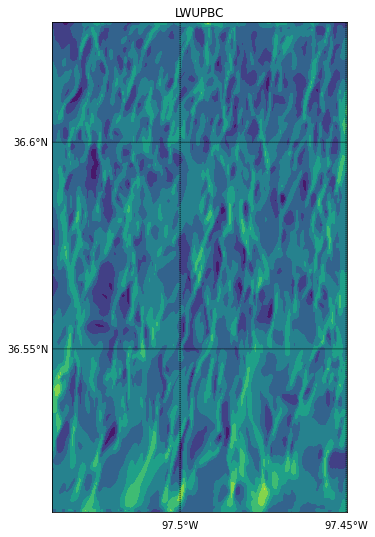

LWDNB


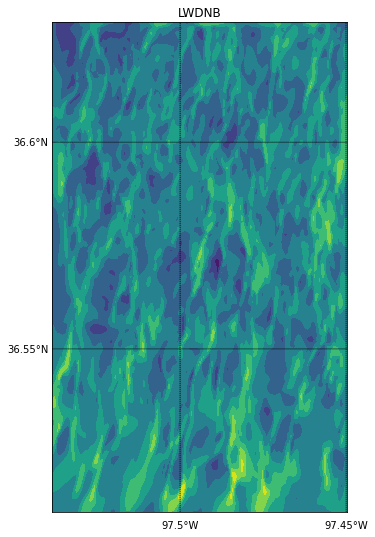

LWDNBC


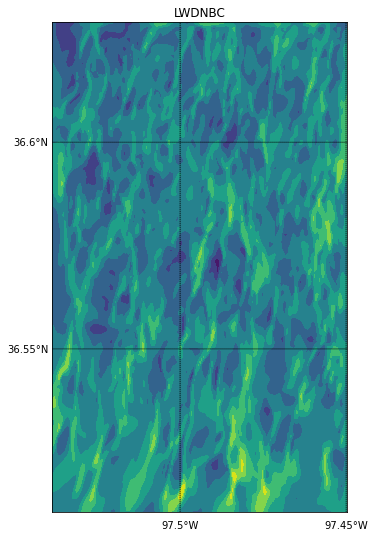

SWCF


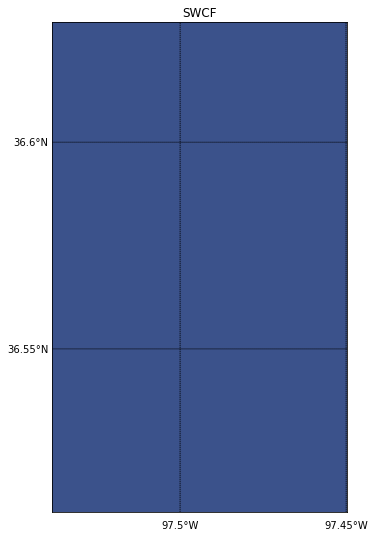

LWCF


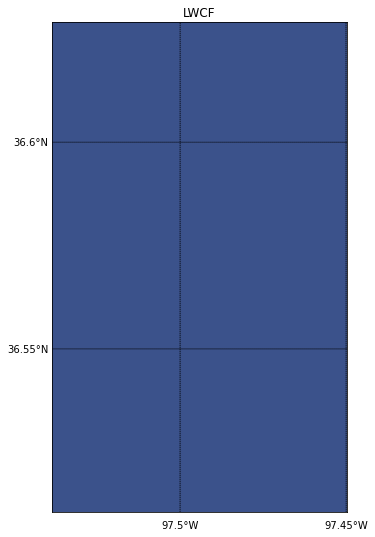

OLR


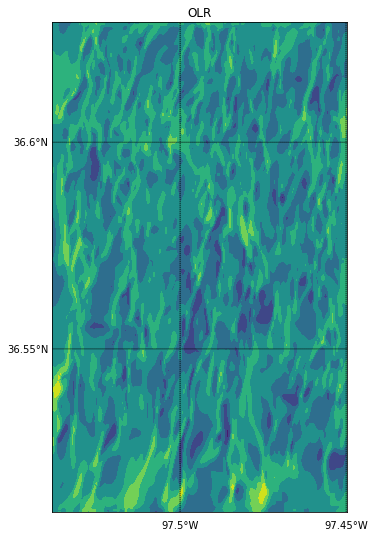

ALBEDO


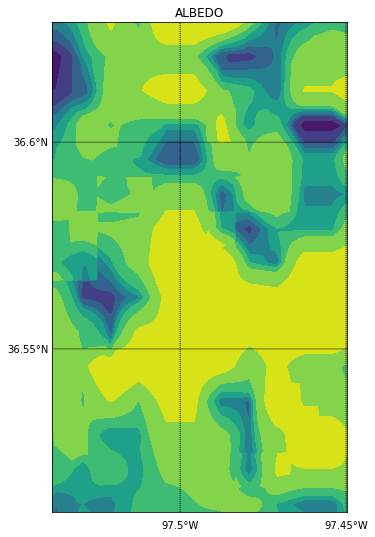

CLAT


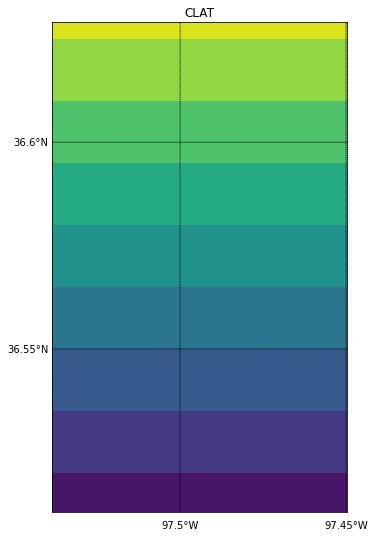

ALBBCK


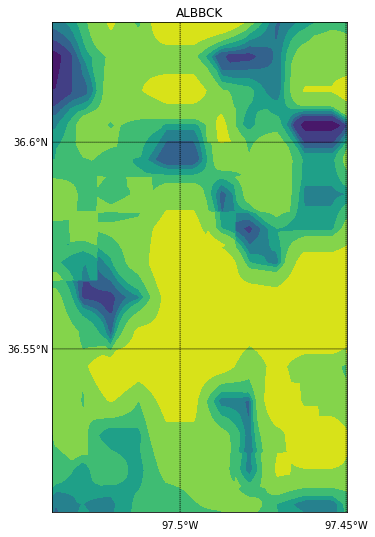

EMBCK


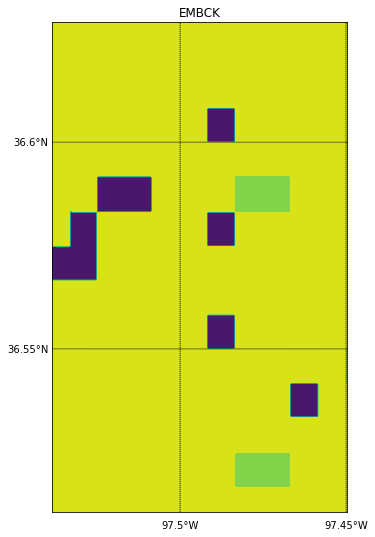

EMISS


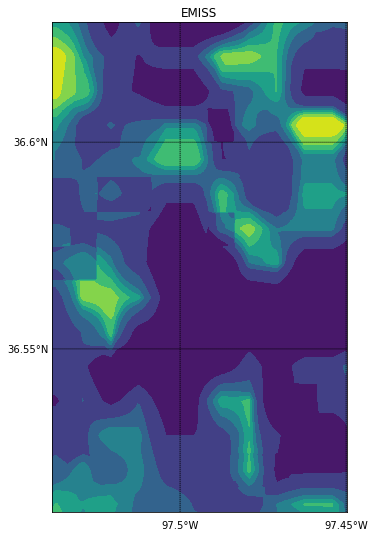

SNOTIME


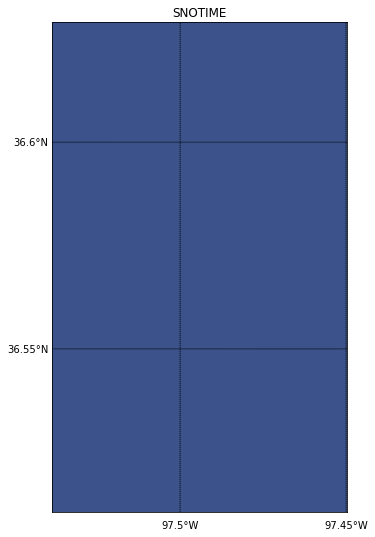

CLDEFI


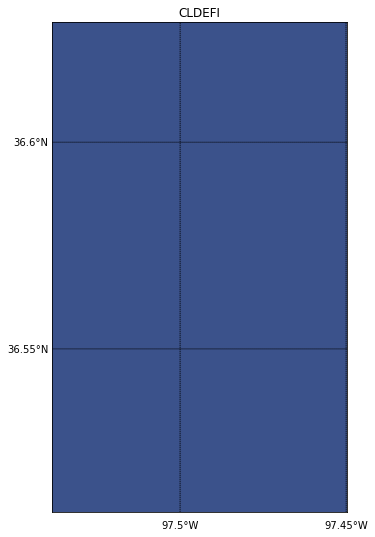

TMN


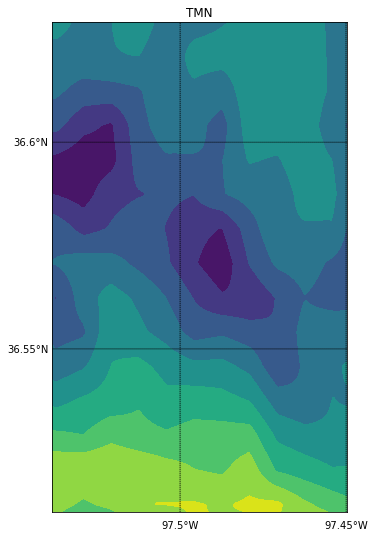

TYR


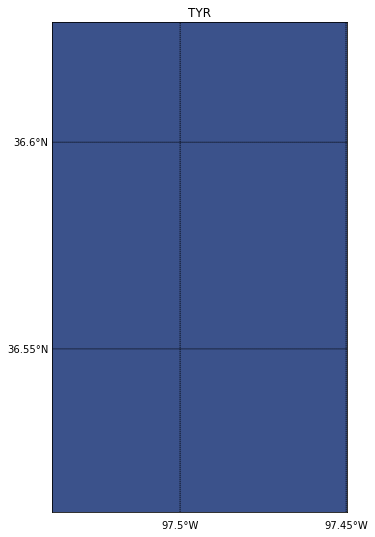

TYRA


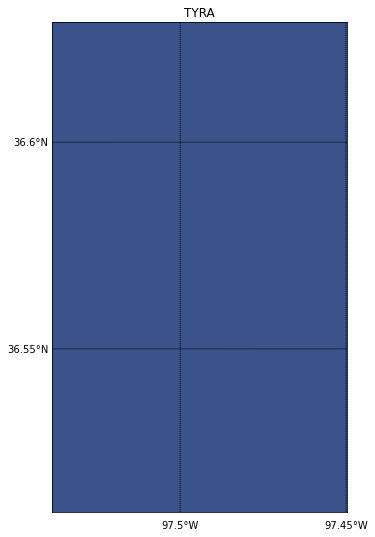

TDLY


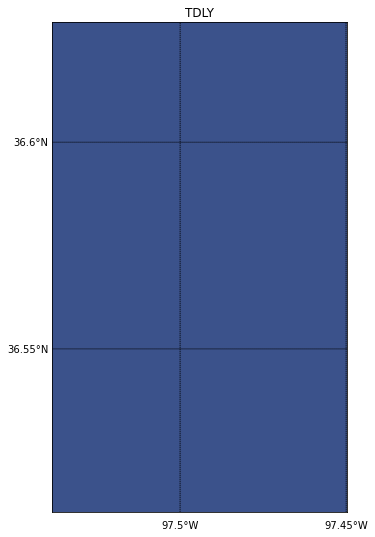

XLAND


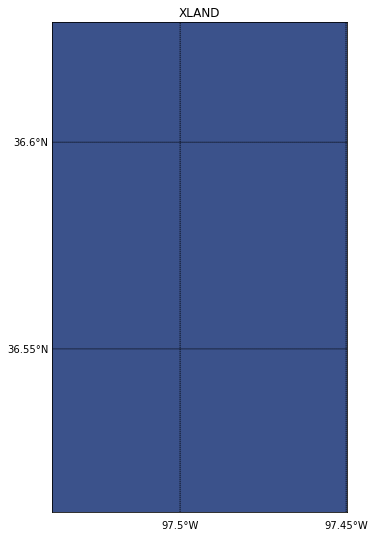

CPLMASK


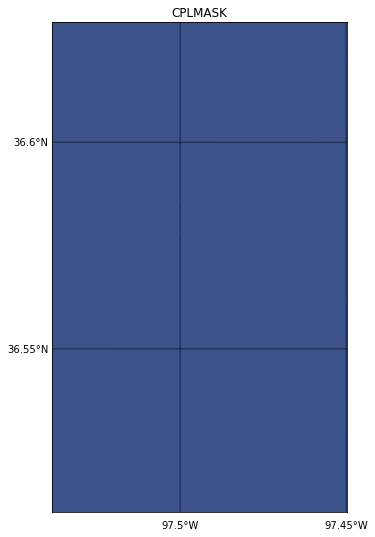

ZNT


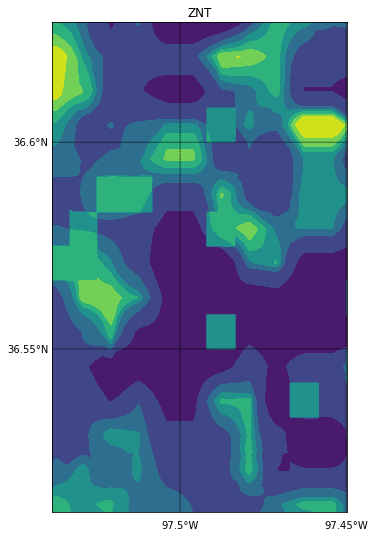

CK


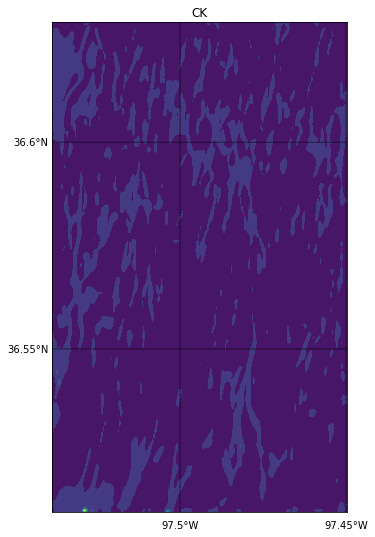

CKA


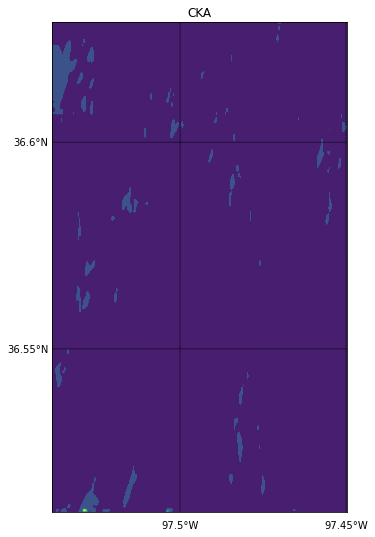

CD


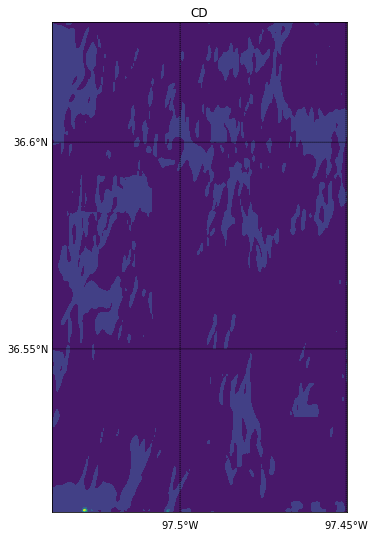

CDA


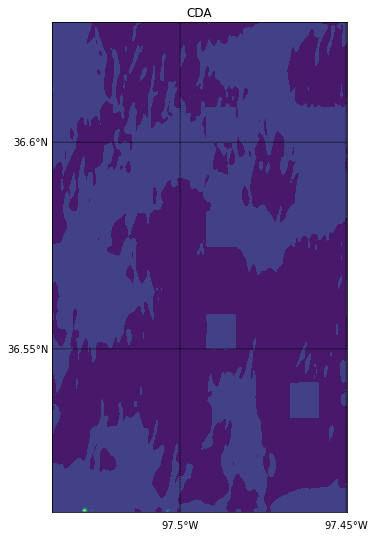

UST


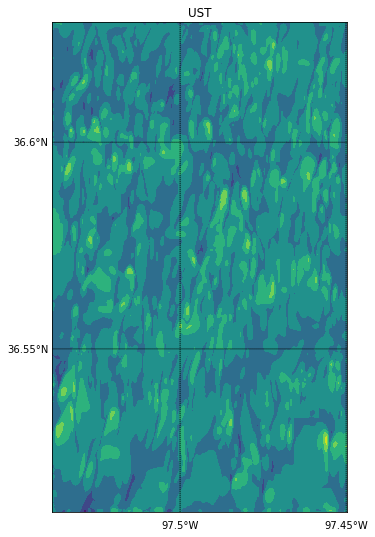

USTM


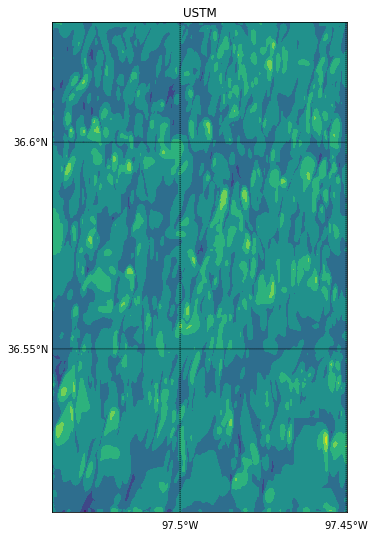

RMOL


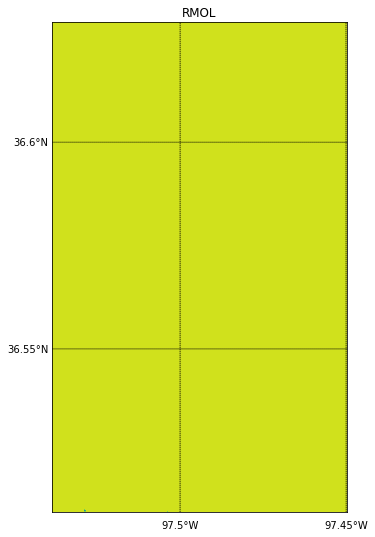

MOL


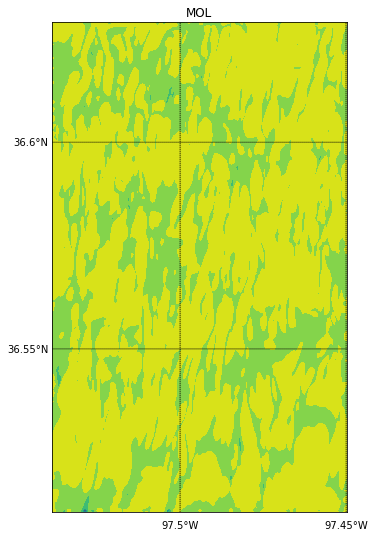

PBLH


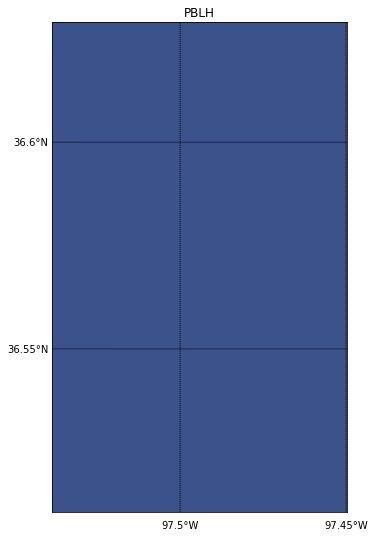

CAPG


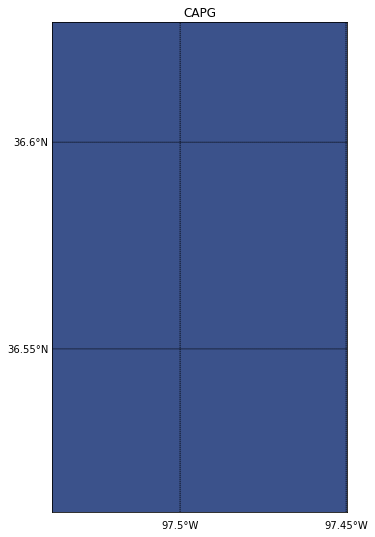

THC


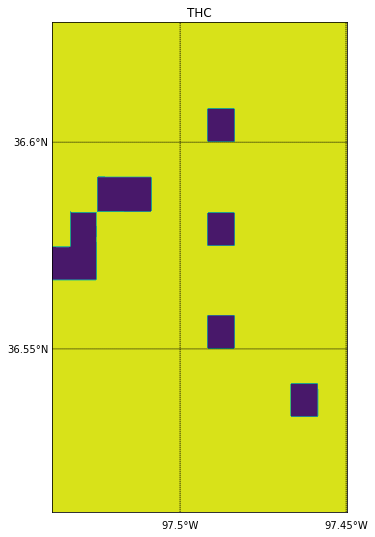

HFX


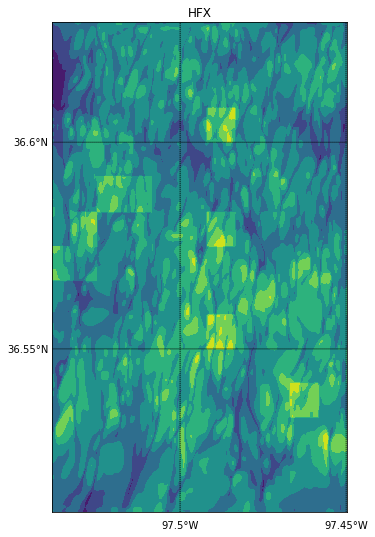

QFX


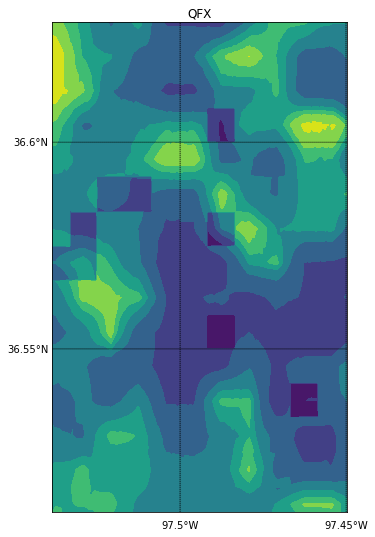

LH


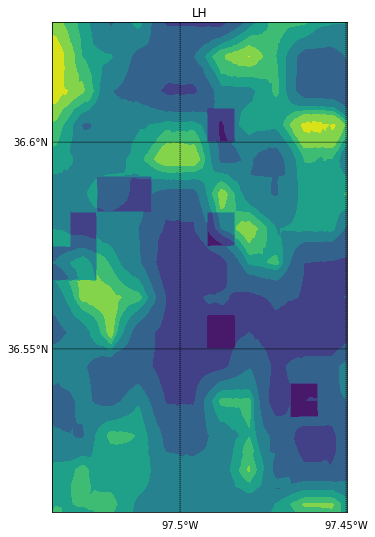

ACHFX


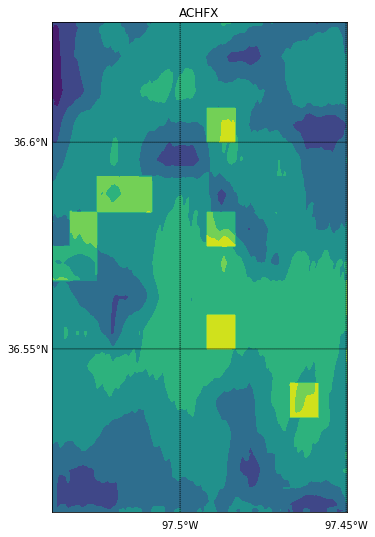

ACLHF


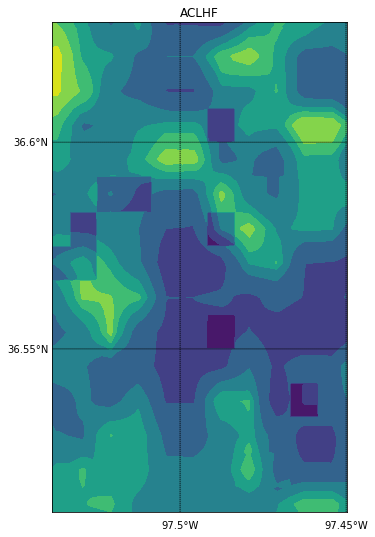

FLHC


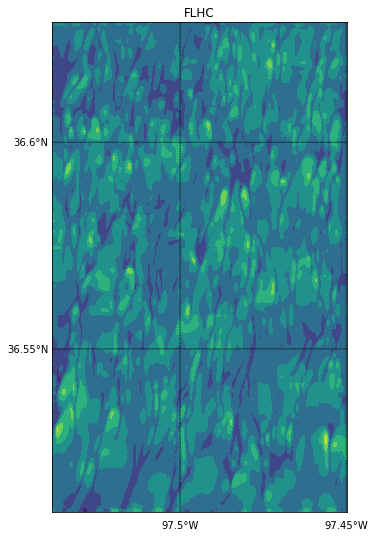

FLQC


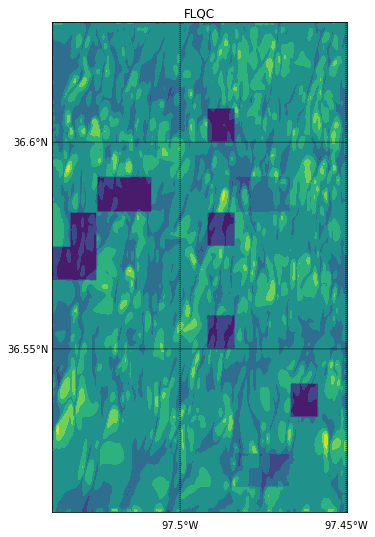

QSG


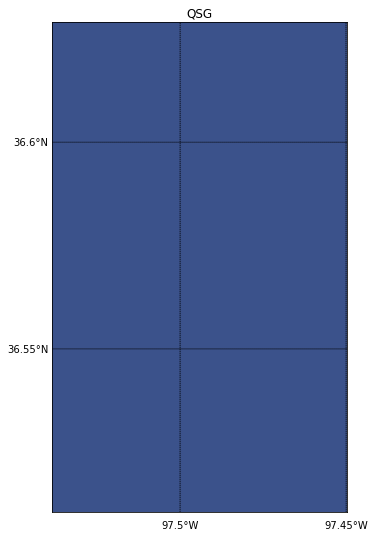

QVG


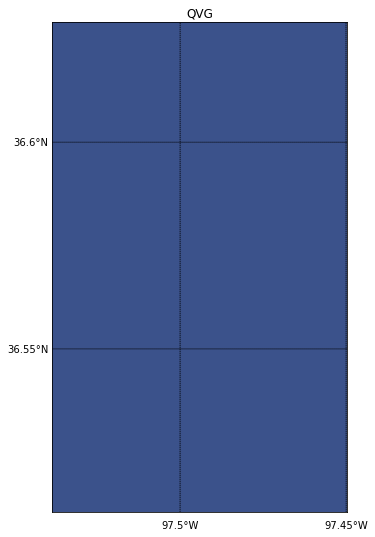

QCG


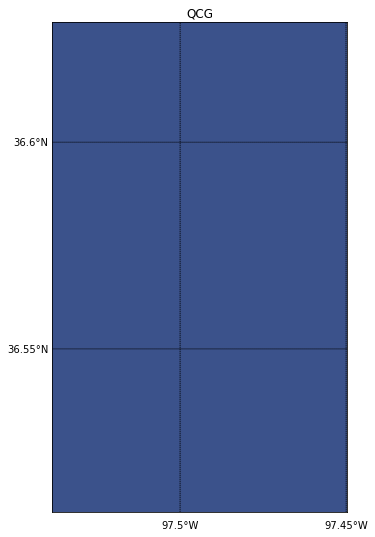

DEW


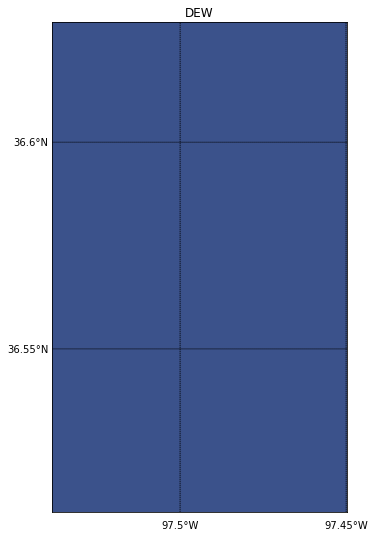

TSNAV


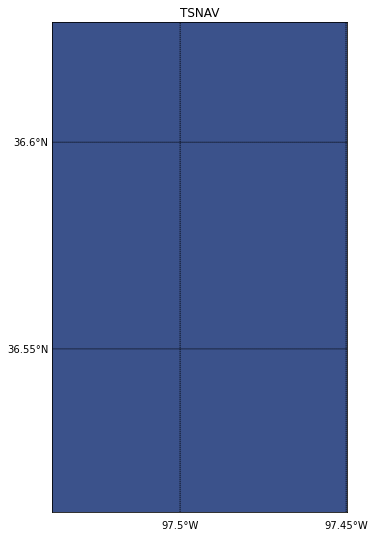

REGIME


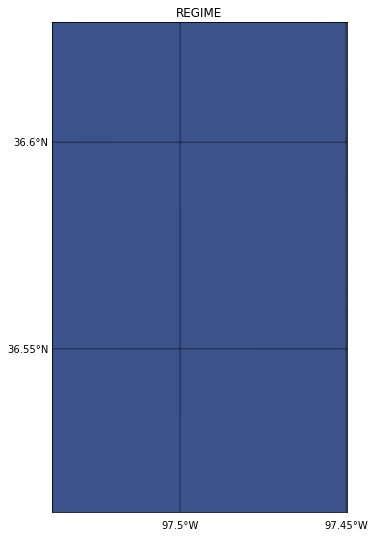

SNOWC


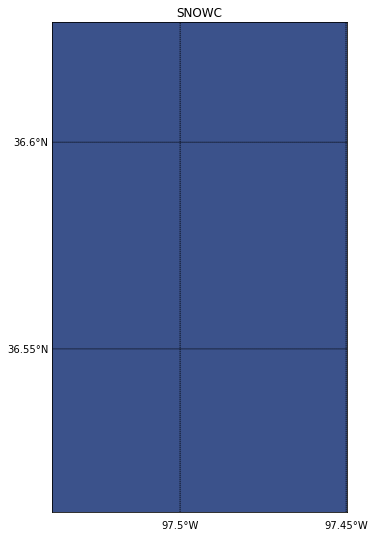

MAVAIL


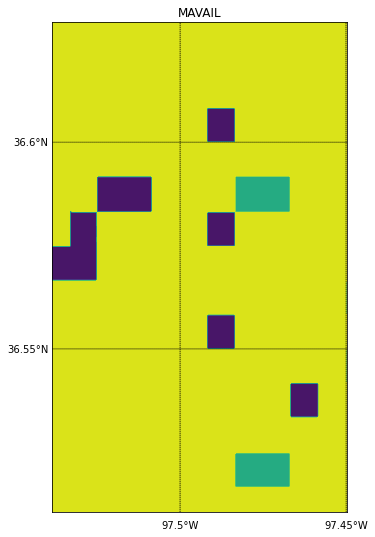

TKESFCF


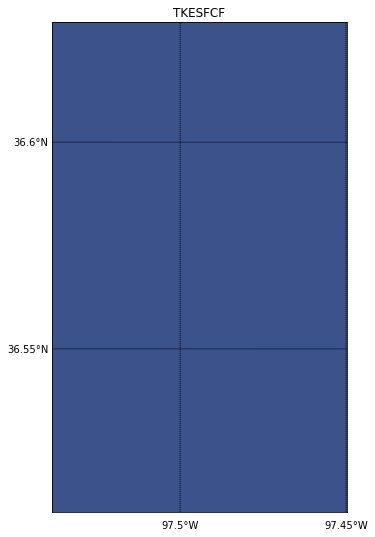

SR


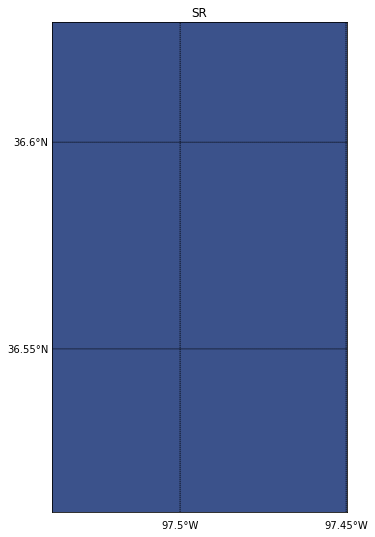

POTEVP


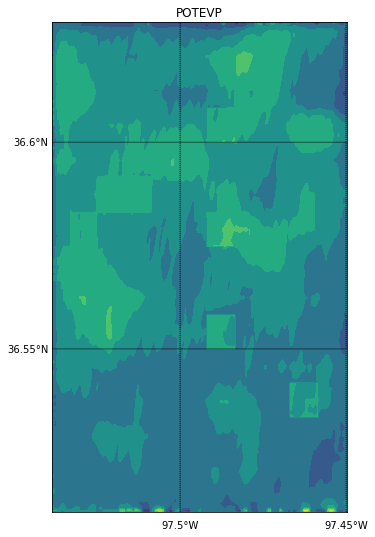

SNOPCX


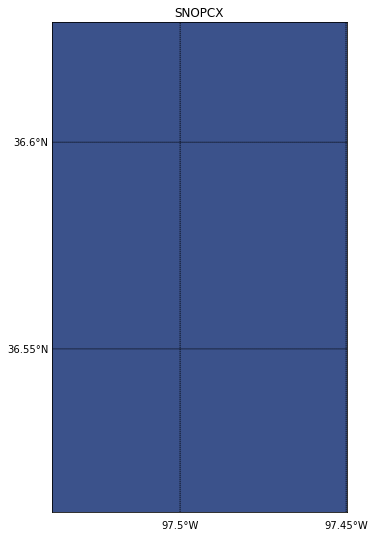

SOILTB


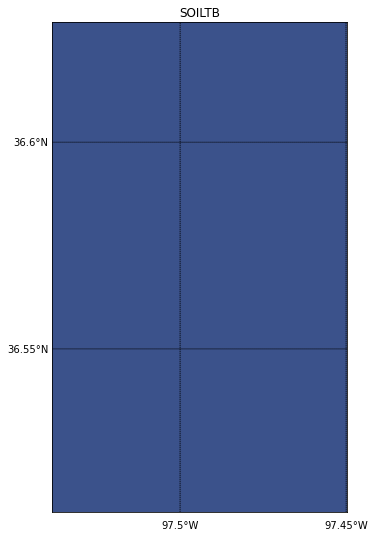

SN_NDG_NEW


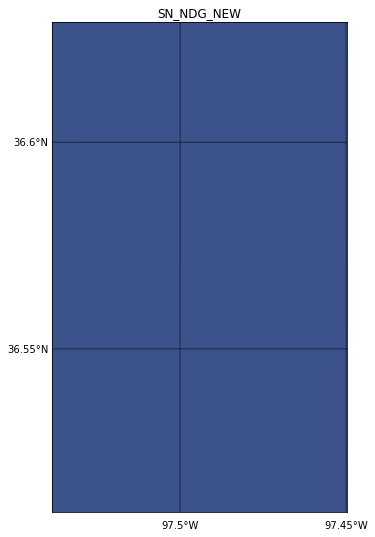

SN_NDG_OLD


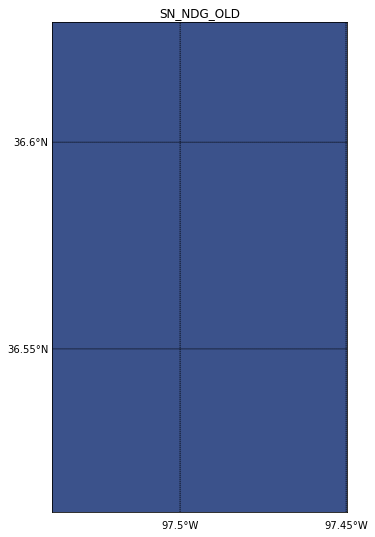

UH


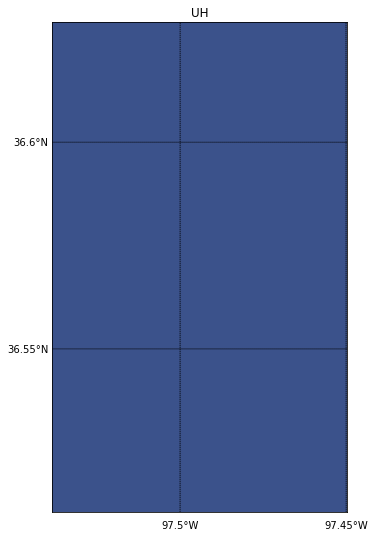

HAILCAST_WUP_MASK


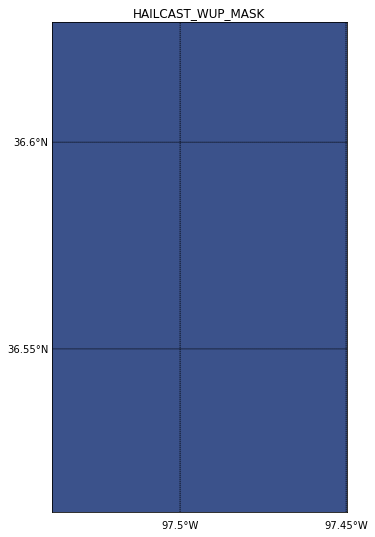

HAILCAST_WDUR


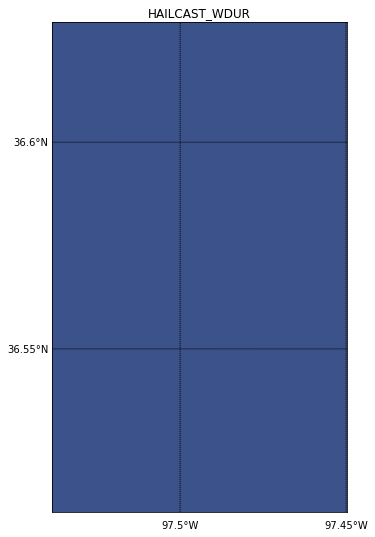

ICCG_IN_NUM


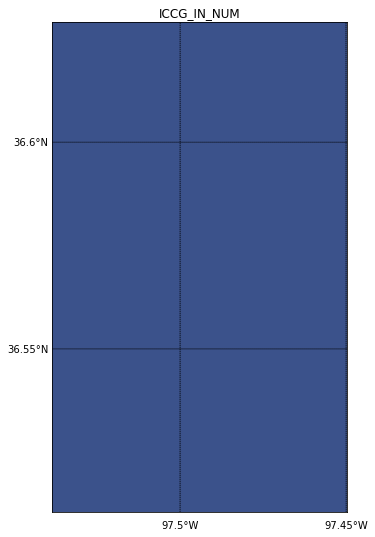

ICCG_IN_DEN


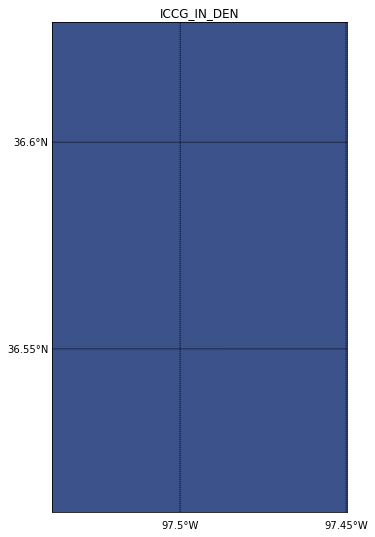

SP_AMP5


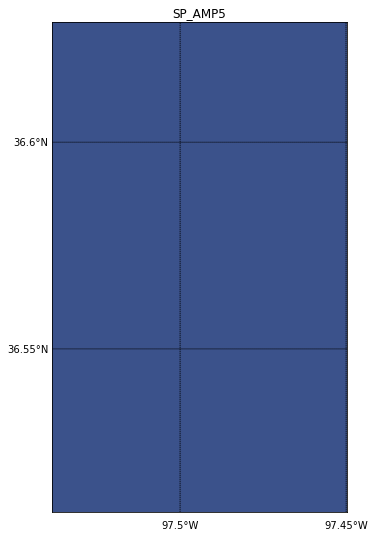

USTT


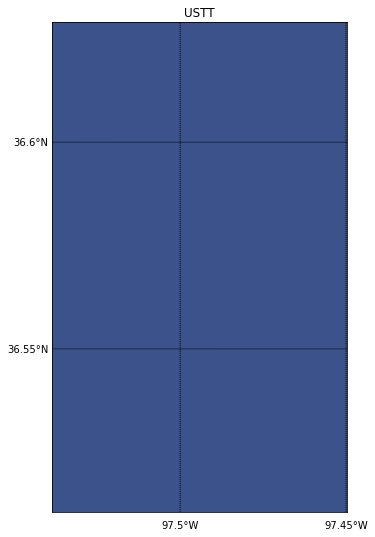

MOLT


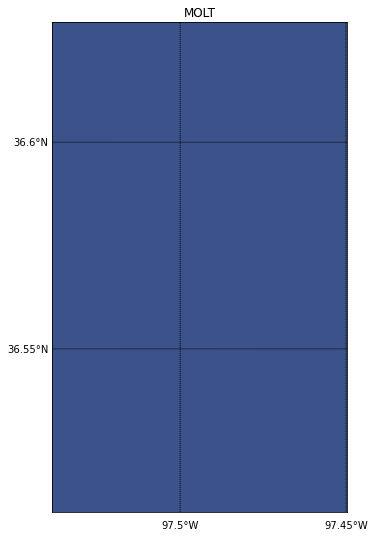

PSFC_DTM


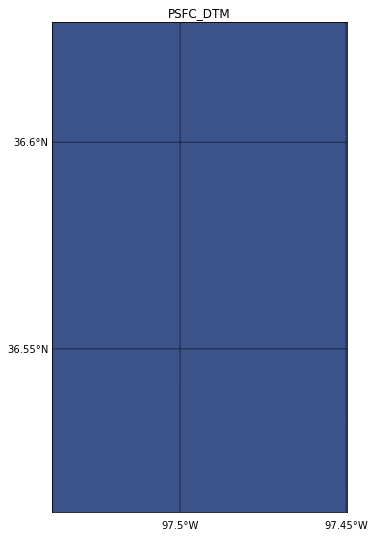

TSK_DTM


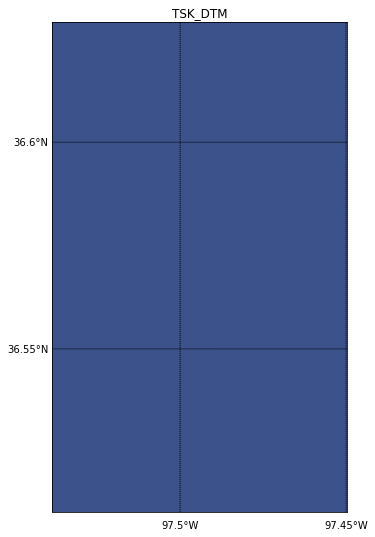

T2_DTM


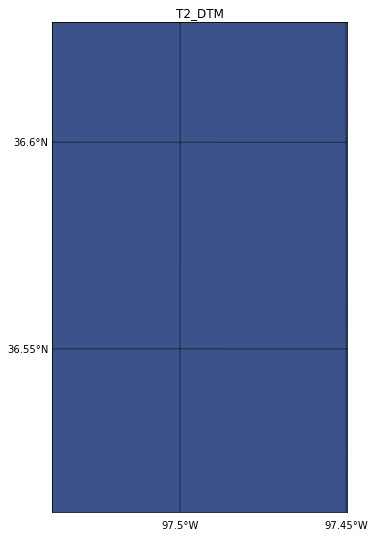

TH2_DTM


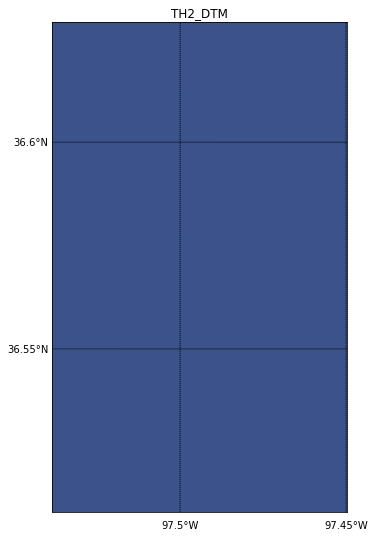

Q2_DTM


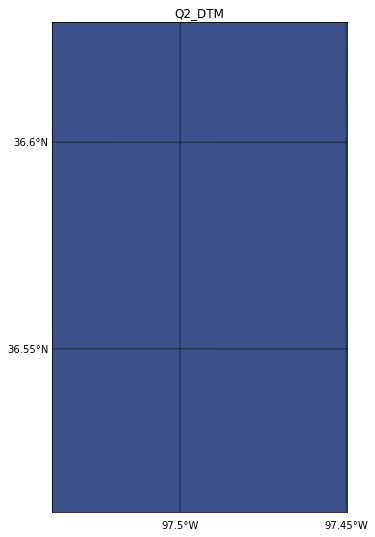

U10_DTM


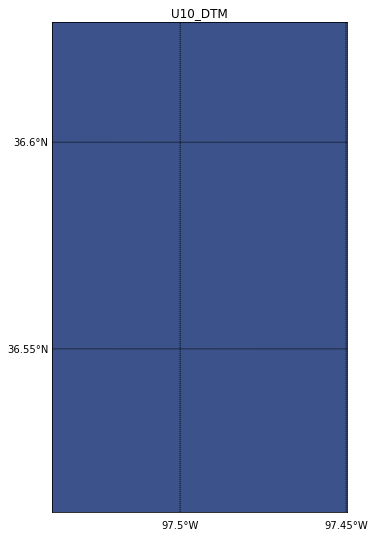

V10_DTM


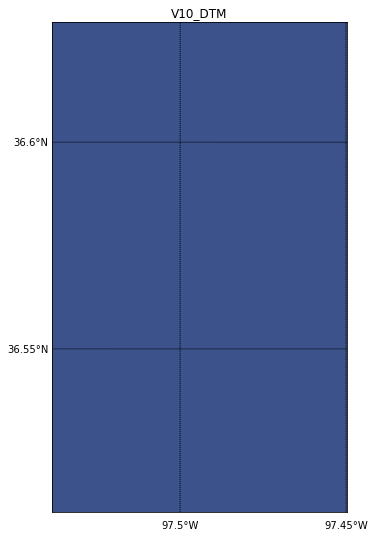

HFX_DTM


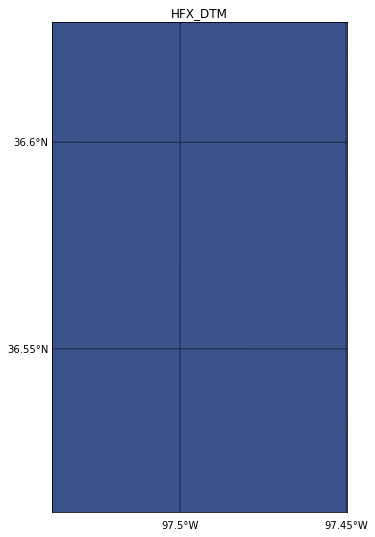

LH_DTM


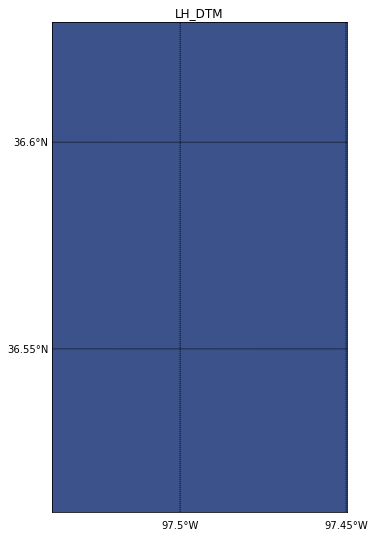

SWDNB_DTM


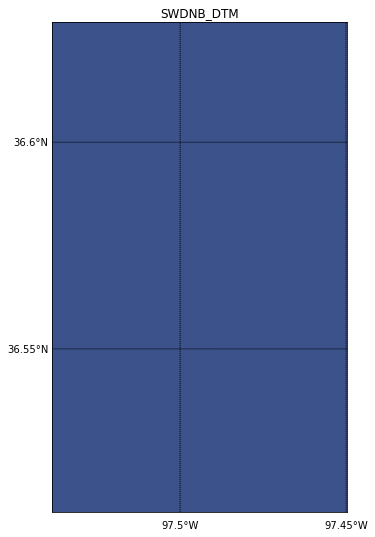

GLW_DTM


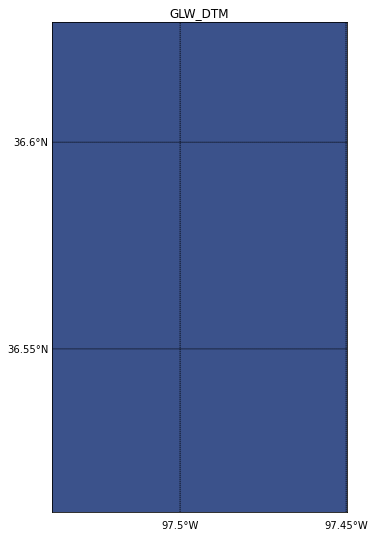

LWUPB_DTM


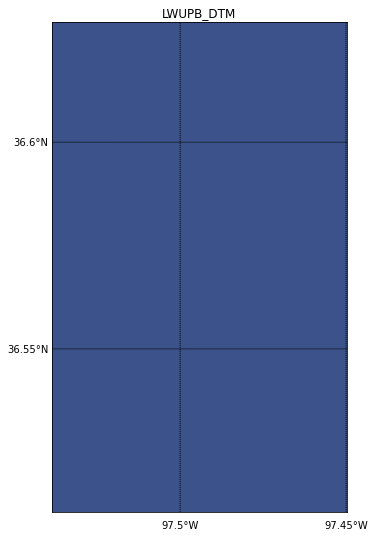

SWUPB_DTM


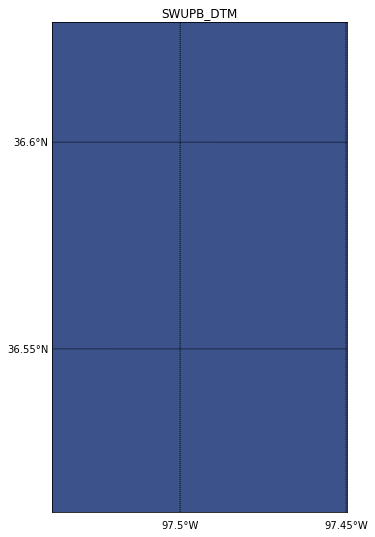

SWUPT_DTM


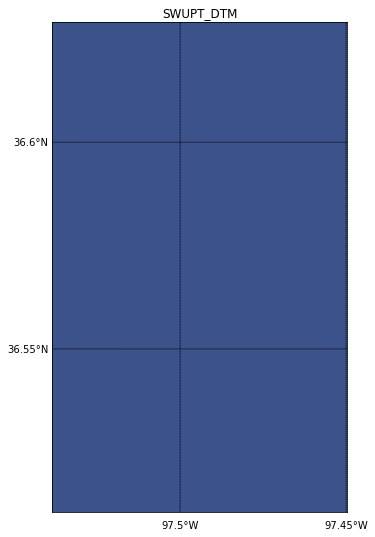

SWDNT_DTM


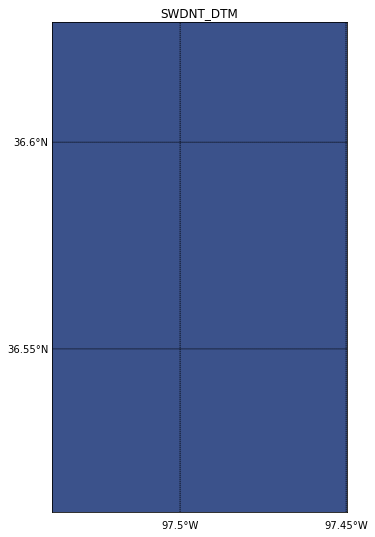

LWUPT_DTM


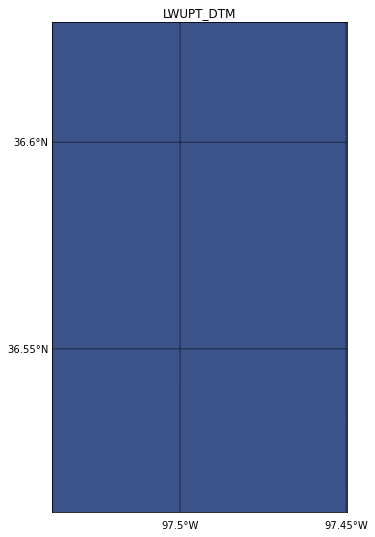

LWDNT_DTM


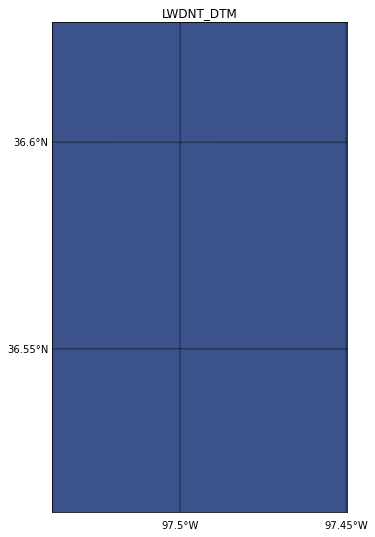

PCB


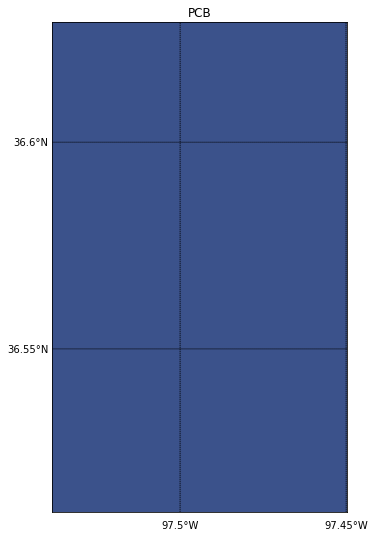

PC_1


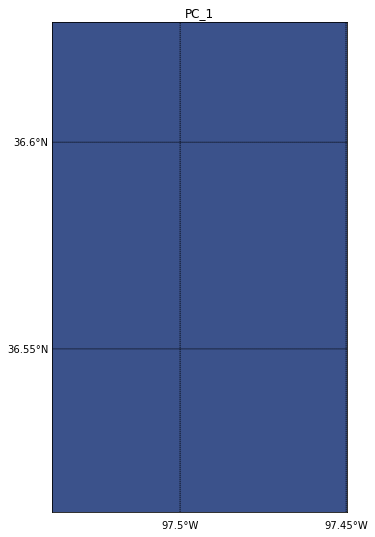

PC_2


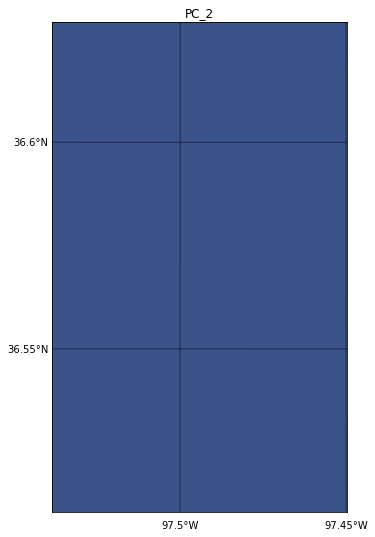

M_PBLH


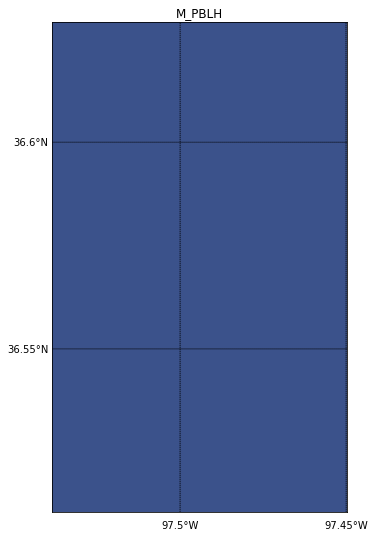

LANDMASK


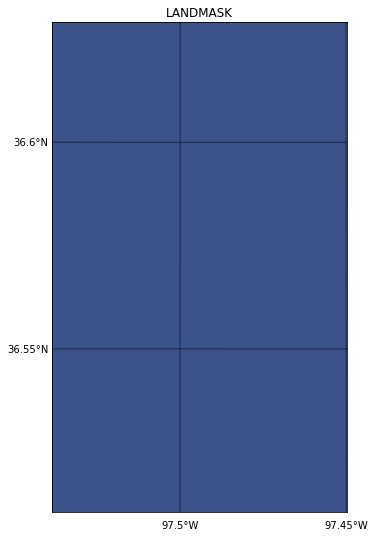

LAKEMASK


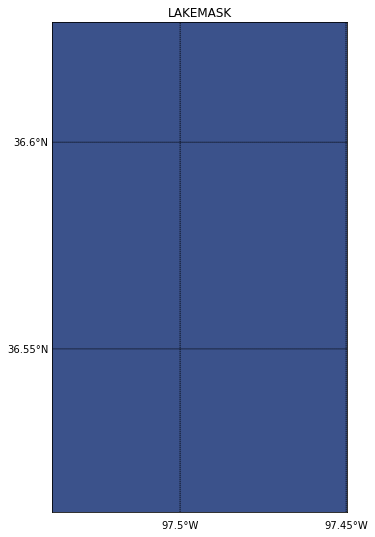

SST


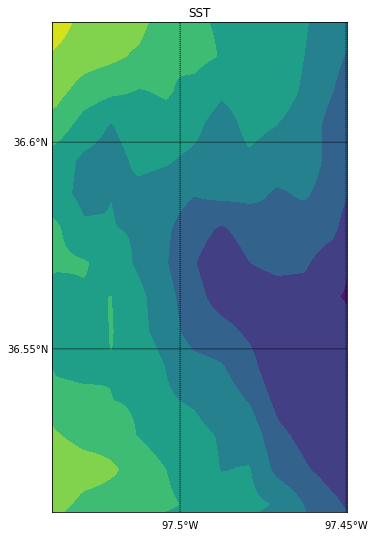

SST_INPUT


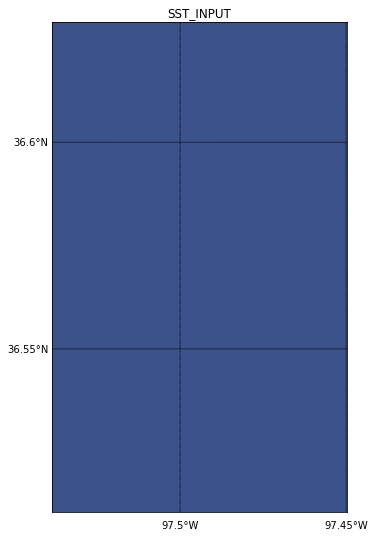

In [31]:
eval_date = '2018-08-05'
wrf_run = 'mynn'
date_col = data_dir_df[eval_date]
file = wrf_runs_dir+date_col[wrf_run]+'/wrfrst_d04_2018-08-05_16:00:00'

wrf_single = Dataset(file, 'r')

for wrf_var in wrf_single.variables.keys():

    var = wrf.getvar(wrf_single, wrf_var, timeidx=wrf.ALL_TIMES)

    if (len(var.dims) == 2) and ('south_north' in var.dims) and ('west_east' in var.dims):
        
        print(var.name)

        lats, lons = wrf.latlon_coords(var)

        bm = wrf.get_basemap(var)

        fig = plt.figure(figsize=(12, 9))

        # bm.drawcoastlines(linewidth=0.25)
        bm.drawstates(linewidth=0.25)
        bm.drawcountries(linewidth=0.25)

        bm.drawparallels(np.arange(36, 37, 0.05), labels=[1, 0, 0, 0])
        bm.drawmeridians(np.arange(-98, -97, 0.05), labels=[0, 0, 0, 1])

        x, y = bm(wrf.to_np(lons), wrf.to_np(lats))

        # bm.contour(x, y, wrf.to_np(var), 10, colors="black")
        bm.contourf(x, y, wrf.to_np(var))

        plt.title(var.name)
        plt.show()

In [8]:
wrf_single.variables.keys()

dict_keys(['Times', 'XLAT', 'XLONG', 'LU_INDEX', 'ZNU', 'ZNW', 'ZS', 'DZS', 'VAR_SSO', 'LAP_HGT', 'EROD', 'RU_TEND_ADV', 'RU_TEND_PGF', 'RU_TEND_COR', 'RU_TEND_CURV', 'RU_TEND_HDIFF', 'RU_TEND_PHYS', 'RV_TEND_ADV', 'RV_TEND_PGF', 'RV_TEND_COR', 'RV_TEND_CURV', 'RV_TEND_HDIFF', 'RV_TEND_PHYS', 'T_TEND_ADV', 'U_1', 'U_2', 'V_1', 'V_2', 'W_1', 'W_2', 'WW', 'WW_M', 'PH_1', 'PH_2', 'PHB', 'PH0', 'PHP', 'T', 'THM_1', 'THM_2', 'T_INIT', 'HFX_FORCE', 'LH_FORCE', 'TSK_FORCE', 'HFX_FORCE_TEND', 'LH_FORCE_TEND', 'TSK_FORCE_TEND', 'MU_1', 'MU_2', 'MUB', 'NEST_POS', 'NEST_MASK', 'HT_COARSE', 'TKE_1', 'TKE_2', 'P', 'AL', 'ALT', 'ALB', 'PB', 'RHO', 'FNM', 'FNP', 'RDNW', 'RDN', 'DNW', 'DN', 'T_BASE', 'CFN', 'CFN1', 'STEP_NUMBER', 'THIS_IS_AN_IDEAL_RUN', 'STEPPING_TO_TIME', 'LAST_STEP_UPDATED', 'ADAPT_STEP_USING_CHILD', 'LAST_DT_SEC', 'LAST_DT_SEC_NUM', 'LAST_DT_SEC_DEN', 'LAST_DT_YR', 'LAST_DT_MM', 'P_HYD', 'P_HYD_W', 'Q2', 'T2', 'TH2', 'PSFC', 'U10', 'V10', 'URATX', 'VRATX', 'TRATX', 'RDX', 'RDY', 'A

In [17]:
var = wrf.getvar(wrf_single, 'LU_INDEX', timeidx=wrf.ALL_TIMES)

In [21]:
var.dims

('south_north', 'west_east')

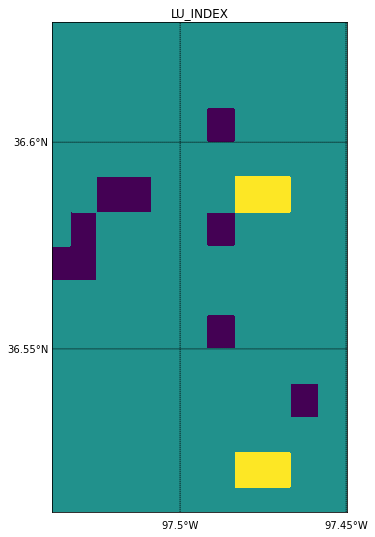

In [27]:
lats, lons = wrf.latlon_coords(var)

bm = wrf.get_basemap(var)

fig = plt.figure(figsize=(12, 9))

# bm.drawcoastlines(linewidth=0.25)
bm.drawstates(linewidth=0.25)
bm.drawcountries(linewidth=0.25)

bm.drawparallels(np.arange(36, 37, 0.05), labels=[1, 0, 0, 0])
bm.drawmeridians(np.arange(-98, -97, 0.05), labels=[0, 0, 0, 1])

x, y = bm(wrf.to_np(lons), wrf.to_np(lats))

# bm.contour(x, y, wrf.to_np(var), 10, colors="black")
bm.contourf(x, y, wrf.to_np(var), levels=len(np.unique(var.values)), 
            cmap=get_cmap('viridis', len(np.unique(var.values))))

plt.title(var.name)
plt.show()

In [25]:
var.name

'LU_INDEX'